# Predict Resale Price of Public Housing in Singapore

This project is based on Machine Learning and Neural Networks, focusing on Deep Learning on a Public Dataset. This project focuses on predicting resale prices of public housing units in Singapore using a comprehensive dataset and deep learning techniques. By leveraging machine learning and deep learning models, we aim to provide accurate property valuations, empowering homeowners, potential buyers, and urban planners to make informed decisions in a dynamic housing market. Our study explores the influence of proximity factors, such as schools and public transportation, on housing prices, contributing to a more transparent and equitable housing ecosystem.

## Introduction

The Housing & Development Board (HDB) manages Singapore's public housing market, a cornerstone of the nation's housing landscape, providing quality and affordable homes for a significant segment of its population <sup>[1]</sup>. In recent years, soaring resale prices of these public housing units have stirred concerns and generated questions among homeowners, prospective buyers, and policymakers alike <sup>[2]</sup>. These escalating prices have implications not only for affordability but also for broader equity and market dynamics, emphasizing the critical need for a comprehensive analysis and prediction of resale flat prices <sup>[3]</sup>. Our project, titled "Predicting Resale Prices of Public Housing in Singapore," is dedicated to addressing these pressing issues. By harnessing the power of deep learning models on a rich dataset, we delve into the intricate dynamics of the Singaporean housing market and explore the influence of proximity factors, such as school access and public transportation, with the ultimate goal of providing stakeholders with precise valuation insights.

### Dataset

The dataset, "Resale Flat Prices", available on [GovTech Singapore](https://data.gov.sg/dataset/resale-flat-prices) <sup>[4]</sup>, provides a comprehensive collection of resale flat prices over the last ten years in Singapore. It encompasses a variety of features, including property attributes, location details, and transaction information, offering rich data for analyzing and predicting public housing resale prices. This information has been pulled and compiled from Singapore's official data bureau <sup>[5]</sup>.

#### Import Libraries

In [1]:
import glob
import os
import numpy as np
import pandas as pd

#### Read Data

In [2]:
path = os.getcwd()
path

'C:\\Users\\auclr\\Documents\\CM3070_FYP'

In [3]:
csv_files = glob.glob(path + "\\data\\*.csv")
csv_files

['C:\\Users\\auclr\\Documents\\CM3070_FYP\\data\\resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv',
 'C:\\Users\\auclr\\Documents\\CM3070_FYP\\data\\resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv',
 'C:\\Users\\auclr\\Documents\\CM3070_FYP\\data\\resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv']

In [4]:
df = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)

In [5]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246546 entries, 0 to 246545
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                246546 non-null  object 
 1   town                 246546 non-null  object 
 2   flat_type            246546 non-null  object 
 3   block                246546 non-null  object 
 4   street_name          246546 non-null  object 
 5   storey_range         246546 non-null  object 
 6   floor_area_sqm       246546 non-null  float64
 7   flat_model           246546 non-null  object 
 8   lease_commence_date  246546 non-null  int64  
 9   remaining_lease      194343 non-null  object 
 10  resale_price         246546 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 20.7+ MB


The imported dataset consists of 246,546 rows and 11 columns. Here's a breakdown of the column names and their properties:

* month: The month of the resale transaction.
* town: The town where the resale flat is located.
* flat_type: The type of flat (e.g., 3 ROOM, 4 ROOM, 5 ROOM).
* block: The block number of the resale flat.
* street_name: The street name of the resale flat's location.
* storey_range: The range of storeys the resale flat is located on.
* floor_area_sqm: The floor area in square meters of the resale flat.
* flat_model: The model or design of the resale flat.
* lease_commence_date: The year the flat's lease commenced.
* remaining_lease: The remaining lease period in years.
* resale_price: The resale price of the flat.

## Aims and Objectives

The aim of this project is to predict the resale prices of public housing units in Singapore using machine learning and deep learning techniques. The objectives include extracting and analyzing a comprehensive dataset of historic sales records, exploring various regression methods with deep learning to develop accurate prediction models, and minimizing the Root Mean Squared Error (RMSE). Additionally, the project aims to understand the key proximity factors that influence housing prices, such as the distance to primary schools and MRT stations, through web scraping and feature engineering. By achieving these objectives, the project aims to provide valuable insights into the dynamics of the public housing resale market and empower homeowners, potential buyers, and policymakers with knowledge to make informed decisions.

## Data Cleaning

### Check for Missing Data

In [7]:
df.isnull().sum()

month                      0
town                       0
flat_type                  0
block                      0
street_name                0
storey_range               0
floor_area_sqm             0
flat_model                 0
lease_commence_date        0
remaining_lease        52203
resale_price               0
dtype: int64

The dataset contains missing data in the `remaining_lease` column, with 52,203 missing entries. These missing values represent cases where the remaining lease period information is not available for certain resale flats.

To resolve the missing data issue in the `remaining_lease` column, we will remove the column from the dataset as it contains a significant number of missing entries. Instead, we will calculate a new `remaining_lease` column by subtracting the `remaining_lease` from the latest year (2022). This approach ensures that we have accurate and up-to-date information on the remaining lease period for each resale flat, allowing us to proceed with our analysis and modeling.

In [8]:
del df['remaining_lease']

In [9]:
type(df['lease_commence_date'][0])

numpy.int64

In [10]:
remaining_lease = []

for i in range(0, len(df['lease_commence_date'])):
    remaining_lease.append((df['lease_commence_date'][i] + 99) - 2022)

df['remaining_lease'] = remaining_lease

In [11]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

### Check for Duplicate Data

In [12]:
duplicate_rows = df[df.duplicated()]
len(duplicate_rows)

611

In [13]:
df = df.drop_duplicates()

In [14]:
len(df)

245935

After checking for duplicate data in the dataset, it was found that there were 611 rows with duplicate information. To ensure the dataset's integrity and remove any redundant records, these duplicates were removed, resulting in a dataset with 245,935 unique rows, allowing for more accurate and efficient analysis and modeling.

## Data Integration

### Geocoding Coordinates

The `block` and `street_name` column names in the dataset provide information about the specific block number and street name associated with each resale HDB flat, allowing for spatial analysis and identification of the locations where the flats are situated. We can use this information to convert resale HDB addresses into coordinates through a geocoding API. OneMap API is an authoritative local map of Singapore developed by the Singapore Land Authority <sup>[6]</sup>. The API will query location information and allow me to obtain the nearest prominent locations from the street names of the HDB flats.

#### Import Packages

In [15]:
import requests

# force IPv4, browser calls the API directly

import socket
import requests.packages.urllib3.util.connection as urllib3_cn
 
def allowed_gai_family():
    family = socket.AF_INET 
    return family
 
urllib3_cn.allowed_gai_family = allowed_gai_family

In [16]:
df['address'] = df['block'] + ' ' + df['street_name']
df['address']

0          174 ANG MO KIO AVE 4
1         541 ANG MO KIO AVE 10
2          163 ANG MO KIO AVE 4
3         446 ANG MO KIO AVE 10
4         557 ANG MO KIO AVE 10
                  ...          
246541         816 YISHUN ST 81
246542          325 YISHUN CTRL
246543       618 YISHUN RING RD
246544         277 YISHUN ST 22
246545         277 YISHUN ST 22
Name: address, Length: 245935, dtype: object

We have consolidated the address information within our dataset to streamline the geocoding process and ensure a concise and optimized dataset for further analysis. To achieve this, we merged the `block` and `street_name` columns into a single `address` column, creating unique addresses for each resale HDB flat.

In [17]:
df['address'].nunique()

9549

By applying the `nunique()` method, we determined that there are a total of 9,549 unique addresses in our dataset, eliminating any redundancies. This deduplication process ensures that we geocode each unique address only once, optimizing the efficiency of our subsequent geocoding and proximity analysis.

In [18]:
# data deduplication

df_dedup = df.drop_duplicates(subset='address', keep='first')
address_list = df_dedup['address'].tolist()

The OneMap API, developed specifically for Singapore, serves as an effective approach for obtaining accurate location information <sup>[7]</sup>. The API provides comprehensive mapping and geocoding services, converting addresses into precise latitude and longitude coordinates.

We leverage the API to obtain precise latitude and longitude coordinates for resale HDB flats. The process involved querying each of the 9,549 unique addresses in our dataset individually to extract their coordinates. As the geocoding process advances, we monitor its progress with print statements. 

In [19]:
def geocode_coordinates(obj_list, new_list, lat, long, n):
    num = 0
    length = len(obj_list)
    
    print(f'extraction of coordinates has begun, {length} left to go:')

    for i in range(len(obj_list)):
        query_address = obj_list[i]
        res = requests.get('https://developers.onemap.sg/commonapi/search?searchVal=' + str(query_address) + \
                           '&returnGeom=Y&getAddrDetails=Y')
        res_dict = eval(res.text)

        if len(res_dict['results']) > 0:
            new_list.append(obj_list[i])
            lat.append(res_dict['results'][0]['LATITUDE'])
            long.append(res_dict['results'][0]['LONGITUDE'])

            num += 1
            if num % n == 0:
                print(f'extraction is ongoing... {num} iterations have passed...')
        else:
            pass

    print(f'\n{num} extractions are ready')

The `geocode_coordinates` function is designed to obtain precise latitude and longitude coordinates for a list of addresses using the OneMap API. It takes several parameters: `obj_list` is the list of addresses to be processed, `new_list` is an empty list where successfully geocoded addresses will be stored, `lat` and `long` are empty lists for latitude and longitude coordinates, and `n` is an integer parameter that determines when progress updates are printed. The function iterates through each address in the input list, queries the OneMap API for location information, and extracts the latitude and longitude if a valid result is returned. The extracted coordinates and addresses are then appended to their respective lists. The function keeps track of the number of successful extractions and prints progress updates as specified by the `n` parameter. Once all addresses have been processed, it provides a final count of successful extractions. This function essentially automates the geocoding process for a large number of addresses, making it efficient and convenient for our analysis.

In [20]:
# this may take awhile (estimation of 15 mins)

def_hdb, hdb_lat, hdb_long = ([] for _ in range(3))
geocode_coordinates(address_list, def_hdb, hdb_lat, hdb_long, 500)

extraction of coordinates has begun, 9549 left to go:
extraction is ongoing... 500 iterations have passed...
extraction is ongoing... 1000 iterations have passed...
extraction is ongoing... 1500 iterations have passed...
extraction is ongoing... 2000 iterations have passed...
extraction is ongoing... 2500 iterations have passed...
extraction is ongoing... 3000 iterations have passed...
extraction is ongoing... 3500 iterations have passed...
extraction is ongoing... 4000 iterations have passed...
extraction is ongoing... 4500 iterations have passed...
extraction is ongoing... 5000 iterations have passed...
extraction is ongoing... 5500 iterations have passed...
extraction is ongoing... 6000 iterations have passed...
extraction is ongoing... 6500 iterations have passed...
extraction is ongoing... 7000 iterations have passed...
extraction is ongoing... 7500 iterations have passed...
extraction is ongoing... 8000 iterations have passed...
extraction is ongoing... 8500 iterations have passe

After completing the extraction, we successfully obtained coordinates for 9,547 addresses. These coordinates will enable us to explore the relationships between proximity factors such as distance to MRT stations and primary schools and resale flat prices in Singapore.

In [21]:
# check if any address does not have assigned coordinates

undefined_coordinates = list(set(address_list) ^ set(def_hdb))
undefined_coordinates

['2A WOODLANDS CTR RD', '1A WOODLANDS CTR RD']

After applying the geocoding function to obtain coordinates for the addresses in our dataset, it was discovered that two addresses do not have assigned coordinates. This suggests that these addresses may not exist or have incomplete location information.

In [22]:
coordinates = pd.DataFrame({
    'address': def_hdb,
    'latitude': hdb_lat,
    'longitude': hdb_long
})

We created a new DataFrame named `coordinates` by merging the coordinate lists (latitude and longitude) with the `address_list`. This step allowed us to incorporate precise location information into the original dataset. As a result, each resale HDB flat entry now includes its respective latitude and longitude coordinates, which will serve as the foundation for deriving additional meaningful features, such as distance calculations and proximity assessments to specific locations. The merged DataFrame currently contains both housing transaction data and location coordinates, enabling us to explore spatial relationships and proximity factors in our analysis.

In [23]:
df = coordinates.merge(df, on='address', how='outer')
df.head()

,address,latitude,longitude,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,174 ANG MO KIO AVE 4,1.37509746867904,103.83761896123,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,63
1,174 ANG MO KIO AVE 4,1.37509746867904,103.83761896123,2015-12,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,10 TO 12,60.0,Improved,1986,275000.0,63
2,174 ANG MO KIO AVE 4,1.37509746867904,103.83761896123,2016-05,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,69.0,Improved,1986,310000.0,63
3,174 ANG MO KIO AVE 4,1.37509746867904,103.83761896123,2016-06,ANG MO KIO,2 ROOM,174,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,253000.0,63
4,174 ANG MO KIO AVE 4,1.37509746867904,103.83761896123,2016-11,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,290000.0,63


Addresses with unassigned coordinates will be removed from the dataset to ensure the accuracy of our subsequent deep learning and feature engineering processes.

In [24]:
df.isnull().sum()

address                0
latitude               4
longitude              4
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

In [25]:
df = df.dropna()

### Proximity Features

In this stage, we will focus on deriving proximity features by identifying the nearest primary schools and MRT stations associated with each flat address, as well as determining the counts of primary schools and MRT stations within a 2km radius of the flat locations.

#### Find Nearest Primary School

In [26]:
school_df = pd.read_html('https://en.wikipedia.org/wiki/List_of_primary_schools_in_Singapore')
school_df[1].head()

,Name,Funding,Type,Area[3],Notes,Website,School Code
0,Admiralty Primary School,Government,Mixed,Woodlands,NaN,[1],1744
1,Ahmad Ibrahim Primary School,Government,Mixed,Yishun,NaN,[2],1738
2,Ai Tong School,"Government-aided, SAP",Mixed,Bishan,Affiliated to Singapore Hokkien Huay Kuan[4],[3],5625
3,Alexandra Primary School,Government,Mixed,Bukit Merah,NaN,[4],1266
4,Anchor Green Primary School,Government,Mixed,Sengkang,NaN,[5],1254


The code provided uses the `pd.read_html()` function to extract a specific table (index 1) from the Wikipedia page listing primary schools in Singapore <sup>[8]</sup>. According to the information on the Wikipedia website, the table includes information about primary schools that have merged in recent years, as indicated in the '*Notes*' column. To preserve the historical context and accurately represent the relevant locations at the time of transactions, we choose to retain these entries. This approach ensures that the influence of these schools on resale prices is appropriately considered, maintaining the historical context and accurately representing the relevant locations at the time of transactions. This ensures that the impact of these schools on resale prices is properly accounted for, contributing to a comprehensive understanding of housing market dynamics.

In [27]:
school_df[1]['Name']

0          Admiralty Primary School
1      Ahmad Ibrahim Primary School
2                    Ai Tong School
3          Alexandra Primary School
4       Anchor Green Primary School
                   ...             
180            Yuhua Primary School
181            Yumin Primary School
182          Zhangde Primary School
183         Zhenghua Primary School
184         Zhonghua Primary School
Name: Name, Length: 185, dtype: object

The code extracts the "Name" column from the `school_df` dataframe, yielding a list of 185 unique primary schools in Singapore stored in the `school_list` variable. 

In [28]:
school_list = list(school_df[1]['Name'].unique())

In [29]:
def_sch, school_lat, school_long = ([] for _ in range(3))
geocode_coordinates(school_list, def_sch, school_lat, school_long, 50)

extraction of coordinates has begun, 185 left to go:
extraction is ongoing... 50 iterations have passed...
extraction is ongoing... 100 iterations have passed...
extraction is ongoing... 150 iterations have passed...

177 extractions are ready


The `geocode_coordinates()` function is applied to obtain latitude and longitude coordinates for each primary school in the list. These coordinates are collected in the `school_lat` and `school_long` lists, respectively, facilitating the integration of spatial data for primary schools into our analysis.

In [30]:
# check if any address does not have assigned coordinates

undefined_coordinates = list(set(school_list) ^ set(def_sch))
undefined_coordinates

['Juying Primary School',
 "CHIJ St. Nicholas Girls' School (Primary Section)",
 'Coral Primary School',
 'Jing Shan Primary School\xa0[zh]',
 'East View Primary School',
 'Maris Stella High School (Primary Section)',
 'Da Qiao Primary School',
 'East Coast Primary School']

The initial check for schools without assigned coordinates revealed eight school names with discrepancies.

In [31]:
import re

In [32]:
undefined_schools = []
for i in range(0, len(undefined_coordinates)):
    match = re.search(r'[\w+ \.\']* School', undefined_coordinates[i])
    undefined_schools.append(match[0])
    
undefined_schools

['Juying Primary School',
 "CHIJ St. Nicholas Girls' School",
 'Coral Primary School',
 'Jing Shan Primary School',
 'East View Primary School',
 'Maris Stella High School',
 'Da Qiao Primary School',
 'East Coast Primary School']

In [33]:
def_sch2, school_lat2, school_long2 = ([] for _ in range(3))
geocode_coordinates(undefined_schools, def_sch2, school_lat2, school_long2, len(undefined_schools))

extraction of coordinates has begun, 8 left to go:

3 extractions are ready


We performed data cleaning using regular expressions to refine the school names. This step helped to standardize school names and removed extraneous characters. Subsequently, we applied the geocoding function to this refined list, successfully obtaining coordinates for three of the schools.

After conducting further investigation, it was determined that the remaining schools no longer exist. While these schools will not be used in the analysis, their exclusion is not expected to significantly impact the project's outcomes, as they are no longer present and coordinates are available for the majority of primary schools in the dataset.

In [34]:
primary_school = pd.DataFrame({
    'school': def_sch + def_sch2,
    'sch_lat': school_lat + school_lat2,
    'sch_long': school_long + school_long2
})

In [35]:
primary_school.head()

,school,sch_lat,sch_long
0,Admiralty Primary School,1.4426347903311,103.800040119743
1,Ahmad Ibrahim Primary School,1.43315271543517,103.832942401086
2,Ai Tong School,1.3605834338904,103.833020333986
3,Alexandra Primary School,1.29133439161334,103.824424680531
4,Anchor Green Primary School,1.39036998654612,103.887165375933


The `primary_school` DataFrame has been created, containing information about the primary schools in Singapore, including their names, latitude (`sch_lat`), and longitude (`sch_long`) coordinates. This dataset will be used to calculate distances between HDB flats and primary schools, enabling the analysis of proximity features in the later stages of the project.

#### Geodesic Measure

Geodesic measure is a method for calculating the shortest distance between two points on the surface of a sphere <sup>[9]</sup>, and it is effective in determining the precise distances between HDB flats and the nearest prominent locations by accounting for real-world distances calculations. The measure considers the Earth's curvature, providing more precise results compared to simple straight-line distance calculations <sup>[10]</sup>.

Moving forward, we will import the `geodesic` module from GeoPy to calculate the distances between HDB flats and the nearest prominent locations. The `find_nearest` function is defined to calculate the distances, in kilometers, between each HDB flat's coordinates and the coordinates of the nearest primary school or MRT station. This function efficiently compares all HDB flat locations with each primary school or MRT station location, finding the nearest ones and storing the results.

The `find_nearest` function takes two data frames as input, one containing HDB flat coordinates and the other containing the coordinates of primary schools or MRT stations. It systematically compares the latitude and longitude values of each HDB flat with every primary school or MRT station's coordinates, calculating the distances using geodesic measurements. The function then identifies the nearest primary school or MRT station for each HDB flat and stores the results, enabling us to determine the distances between the flats and these important locations for further analysis.

In [36]:
from geopy.distance import geodesic

In [37]:
def find_nearest(loc_df, c=coordinates):
    results = {}
    
    num = 0
    measure = len(coordinates) * len(loc_df)
    print(f'Geodesic Measure has begun, {measure} left to go:')
    
    for index, flat in enumerate(c.iloc[:,0]):
        flat_loc = (c.iloc[index, 1], c.iloc[index, 2])
        nearest = ['', '', 10]
        
        for ind, loc in enumerate(loc_df.iloc[:,0]):
            location = (loc_df.iloc[ind, 1], loc_df.iloc[ind, 2])
            distance = geodesic(flat_loc, location).km
            
            num += 1
            if num % 100000 == 0:
                print(f'measurement is ongoing... {num} calculations have passed...')

            if distance < nearest[2]:
                nearest[0] = flat
                nearest[1] = loc
                nearest[2] = distance


        results[flat] = nearest
    
    print('\nGeodesic Measure has completed.')
    return results

In [38]:
pri = find_nearest(primary_school)

Geodesic Measure has begun, 1718460 left to go:
measurement is ongoing... 100000 calculations have passed...
measurement is ongoing... 200000 calculations have passed...
measurement is ongoing... 300000 calculations have passed...
measurement is ongoing... 400000 calculations have passed...
measurement is ongoing... 500000 calculations have passed...
measurement is ongoing... 600000 calculations have passed...
measurement is ongoing... 700000 calculations have passed...
measurement is ongoing... 800000 calculations have passed...
measurement is ongoing... 900000 calculations have passed...
measurement is ongoing... 1000000 calculations have passed...
measurement is ongoing... 1100000 calculations have passed...
measurement is ongoing... 1200000 calculations have passed...
measurement is ongoing... 1300000 calculations have passed...
measurement is ongoing... 1400000 calculations have passed...
measurement is ongoing... 1500000 calculations have passed...
measurement is ongoing... 16000

In [39]:
nearest_school = pd.DataFrame([pri]).transpose()
nearest_school.head()

,0
174 ANG MO KIO AVE 4,"[174 ANG MO KIO AVE 4, CHIJ St. Nicholas Girls..."
541 ANG MO KIO AVE 10,"[541 ANG MO KIO AVE 10, Jing Shan Primary Scho..."
163 ANG MO KIO AVE 4,"[163 ANG MO KIO AVE 4, CHIJ St. Nicholas Girls..."
446 ANG MO KIO AVE 10,"[446 ANG MO KIO AVE 10, Teck Ghee Primary Scho..."
557 ANG MO KIO AVE 10,"[557 ANG MO KIO AVE 10, Jing Shan Primary Scho..."


In [40]:
nearest_school.reset_index(inplace=True)
nearest_school.rename(columns={'index':'address', 0:'data'}, inplace=True)

nearest_school.head()

,address,data
0,174 ANG MO KIO AVE 4,"[174 ANG MO KIO AVE 4, CHIJ St. Nicholas Girls..."
1,541 ANG MO KIO AVE 10,"[541 ANG MO KIO AVE 10, Jing Shan Primary Scho..."
2,163 ANG MO KIO AVE 4,"[163 ANG MO KIO AVE 4, CHIJ St. Nicholas Girls..."
3,446 ANG MO KIO AVE 10,"[446 ANG MO KIO AVE 10, Teck Ghee Primary Scho..."
4,557 ANG MO KIO AVE 10,"[557 ANG MO KIO AVE 10, Jing Shan Primary Scho..."


The `find_nearest` function efficiently calculated the distances between each HDB flat and the nearest primary school. These distances were stored in a new dataframe, `nearest_school`, alongside the corresponding addresses and school names.

In [41]:
sch_loc = []
sch_dist = []

for i in range(0, len(nearest_school)):
    sch_loc.append(nearest_school['data'][i][1])
    sch_dist.append(round(nearest_school['data'][i][2], 2))

In [42]:
nearest_school = pd.DataFrame({
    'address': def_hdb,
    'school': sch_loc,
    'sch_dist': sch_dist
})

In [43]:
nearest_school = pd.merge(primary_school, nearest_school)
nearest_school.head()

,school,sch_lat,sch_long,address,sch_dist
0,Admiralty Primary School,1.4426347903311,103.800040119743,710 WOODLANDS DR 70,0.36
1,Admiralty Primary School,1.4426347903311,103.800040119743,723 WOODLANDS AVE 6,0.33
2,Admiralty Primary School,1.4426347903311,103.800040119743,738 WOODLANDS CIRCLE,0.32
3,Admiralty Primary School,1.4426347903311,103.800040119743,788D WOODLANDS CRES,0.31
4,Admiralty Primary School,1.4426347903311,103.800040119743,730 WOODLANDS CIRCLE,0.26


The dataframe `nearest_school` has been further refined to include the specific addresses of HDB flats, the names of their nearest primary schools, and the distances (in kilometers) between each HDB flat and its nearest primary school. We integrate the `nearest_school` dataframe into the original dataset, resulting in a merged dataset that now offers a detailed perspective on the proximity relationships between HDB flats and primary schools.

In [44]:
df = df.merge(nearest_school, on='address', how='outer')
df.head()

,address,latitude,longitude,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,school,sch_lat,sch_long,sch_dist
0,174 ANG MO KIO AVE 4,1.37509746867904,103.83761896123,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,63,CHIJ St. Nicholas Girls' School,1.37347687878916,103.834253269436,0.42
1,174 ANG MO KIO AVE 4,1.37509746867904,103.83761896123,2015-12,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,10 TO 12,60.0,Improved,1986,275000.0,63,CHIJ St. Nicholas Girls' School,1.37347687878916,103.834253269436,0.42
2,174 ANG MO KIO AVE 4,1.37509746867904,103.83761896123,2016-05,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,69.0,Improved,1986,310000.0,63,CHIJ St. Nicholas Girls' School,1.37347687878916,103.834253269436,0.42
3,174 ANG MO KIO AVE 4,1.37509746867904,103.83761896123,2016-06,ANG MO KIO,2 ROOM,174,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,253000.0,63,CHIJ St. Nicholas Girls' School,1.37347687878916,103.834253269436,0.42
4,174 ANG MO KIO AVE 4,1.37509746867904,103.83761896123,2016-11,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,290000.0,63,CHIJ St. Nicholas Girls' School,1.37347687878916,103.834253269436,0.42


#### Counts Within 2km Radius

In [45]:
from functools import reduce

In [46]:
addr_c = df.apply(lambda row: (row['latitude'], row['longitude']), axis=1).tolist()
df['addr_coords'] = addr_c

In [47]:
# calculate distance between flat and prominent features' coordinates

def calculate_distance(coord_1, coord_2):
    return geodesic(coord_1, coord_2).kilometers

In [48]:
# list of address coordinates [11]

addr_coords = df.apply(lambda row: (row['latitude'], row['longitude']), axis=1).tolist()
addr_coords = reduce(lambda re, x: re+[x] if x not in re else re, addr_coords, [])

The `counts_within_radius` function calculates the number of selected coordinates (e.g., primary schools or MRT stations) that are within a specified radius of each address in the dataset. It iterates through all the addresses and for each address, it counts how many of the selected coordinates fall within the given radius. To do this, it calculates the distance between the address and each selected coordinate using the Haversine formula, and if the distance is less than or equal to the specified radius (e.g., two kilometers), it increments the count. The Haversine formula precisely calculates distances between two points based on their latitude and longitude coordinates <sup>[12]</sup>. The function then returns a list containing the counts of selected coordinates within the radius for each address in the dataset, providing valuable information about proximity factors for further analysis.

In [49]:
def counts_within_radius(coordinates, addr_coordinates=addr_coords, radius_km=2.0):
    loc_count = []    
    num = 0
    measure = len(addr_coordinates) * len(coordinates)
    print(f'Geodesic Measure has begun, {measure} left to go:')
        
    # proximity factor counts within selected radius for each address
    for addr in addr_coordinates:
        count = 0  
        for c in coordinates:
            dist = calculate_distance(addr, c)
            if dist <= radius_km:
                count += 1
                
            num += 1
            if num % 100000 == 0:
                print(f'measurement is ongoing... {num} calculations have passed...')
                
        loc_count.append(count)
        
    print('\nGeodesic Measure has completed.')    
    return loc_count

In [50]:
school_coords = df.apply(lambda row: (row['sch_lat'], row['sch_long']), axis=1).tolist()
school_coords = reduce(lambda re, x: re+[x] if x not in re else re, school_coords, [])

In [51]:
c = counts_within_radius(school_coords)

Geodesic Measure has begun, 1632195 left to go:
measurement is ongoing... 100000 calculations have passed...
measurement is ongoing... 200000 calculations have passed...
measurement is ongoing... 300000 calculations have passed...
measurement is ongoing... 400000 calculations have passed...
measurement is ongoing... 500000 calculations have passed...
measurement is ongoing... 600000 calculations have passed...
measurement is ongoing... 700000 calculations have passed...
measurement is ongoing... 800000 calculations have passed...
measurement is ongoing... 900000 calculations have passed...
measurement is ongoing... 1000000 calculations have passed...
measurement is ongoing... 1100000 calculations have passed...
measurement is ongoing... 1200000 calculations have passed...
measurement is ongoing... 1300000 calculations have passed...
measurement is ongoing... 1400000 calculations have passed...
measurement is ongoing... 1500000 calculations have passed...
measurement is ongoing... 16000

The `counts_within_radius` function has been applied to calculate the number of prominent school locations within a 2-kilometer radius of each resale flat address in the dataset, providing valuable insights into the proximity of schools to the flats.

In [52]:
school_counts = pd.DataFrame({
    'addr_coords': addr_coords,
    'sch_counts': c
})

In [53]:
df = df.merge(school_counts, on='addr_coords', how='outer')
df.head()

,address,latitude,longitude,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,school,sch_lat,sch_long,sch_dist,addr_coords,sch_counts
0,174 ANG MO KIO AVE 4,1.37509746867904,103.83761896123,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,63,CHIJ St. Nicholas Girls' School,1.37347687878916,103.834253269436,0.42,"(1.37509746867904, 103.83761896123)",7
1,174 ANG MO KIO AVE 4,1.37509746867904,103.83761896123,2015-12,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,10 TO 12,60.0,Improved,1986,275000.0,63,CHIJ St. Nicholas Girls' School,1.37347687878916,103.834253269436,0.42,"(1.37509746867904, 103.83761896123)",7
2,174 ANG MO KIO AVE 4,1.37509746867904,103.83761896123,2016-05,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,69.0,Improved,1986,310000.0,63,CHIJ St. Nicholas Girls' School,1.37347687878916,103.834253269436,0.42,"(1.37509746867904, 103.83761896123)",7
3,174 ANG MO KIO AVE 4,1.37509746867904,103.83761896123,2016-06,ANG MO KIO,2 ROOM,174,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,253000.0,63,CHIJ St. Nicholas Girls' School,1.37347687878916,103.834253269436,0.42,"(1.37509746867904, 103.83761896123)",7
4,174 ANG MO KIO AVE 4,1.37509746867904,103.83761896123,2016-11,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,290000.0,63,CHIJ St. Nicholas Girls' School,1.37347687878916,103.834253269436,0.42,"(1.37509746867904, 103.83761896123)",7


The dataframe `school_counts` has been integrated into the original dataset, allowing us to see the count of nearby prominent school locations within a 2-kilometer radius for each resale flat.

#### Find Nearest MRT Station

The "Train Station Codes and Chinese Names" dataset is sourced from DataMall (Land Transport Authority) and contains essential information about train stations, including their station codes and Chinese names <sup>[13]</sup>. This dataset is part of a broader initiative to make land transport-related data accessible to the public, enabling collaboration, research, and the development of innovative transport solutions in Singapore's transportation system <sup>[14]</sup>.

In [54]:
mrt_df = pd.read_excel('data/Train Station Codes and Chinese Names.xls')

In [55]:
mrt_df.head()

,stn_code,mrt_station_english,mrt_station_chinese,mrt_line_english,mrt_line_chinese
0,NS1,Jurong East,裕廊东,North-South Line,南北线
1,NS2,Bukit Batok,武吉巴督,North-South Line,南北线
2,NS3,Bukit Gombak,武吉甘柏,North-South Line,南北线
3,NS4,Choa Chu Kang,蔡厝港,North-South Line,南北线
4,NS5,Yew Tee,油池,North-South Line,南北线


We load the dataset, which contains information about various MRT (Mass Rapid Transit) stations in Singapore, including their station codes, names in both English and Chinese, and the corresponding MRT lines.

In [56]:
mrt_list = mrt_df['mrt_station_english'].unique().tolist()

In [57]:
def_mrt, mrt_lat, mrt_long = ([] for _ in range(3))
geocode_coordinates(mrt_list, def_mrt, mrt_lat, mrt_long, 50)

extraction of coordinates has begun, 172 left to go:
extraction is ongoing... 50 iterations have passed...
extraction is ongoing... 100 iterations have passed...
extraction is ongoing... 150 iterations have passed...

172 extractions are ready


To enhance the dataset with geographical information, the code extracts the unique English station names and uses the `geocode_coordinates` function to obtain the latitude and longitude coordinates for each station. This allows for precise proximity calculations between resale flats and nearby MRT stations. After this process, the dataset is enriched with coordinates for 172 MRT stations.

In [58]:
# check if any address does not have assigned coordinates

undefined_coordinates = list(set(mrt_list) ^ set(def_mrt))
undefined_coordinates

[]

All MRT station names from the dataset have been successfully assigned coordinates, indicating that all stations are accounted for in the analysis.

In [59]:
mrt_transport = pd.DataFrame({
    'mrt': def_mrt,
    'mrt_lat': mrt_lat,
    'mrt_long': mrt_long
})

In [60]:
mrt_transport.head()

,mrt,mrt_lat,mrt_long
0,Jurong East,1.34394361727901,103.734931027328
1,Bukit Batok,1.34600823620384,103.747049734277
2,Bukit Gombak,1.36923536968527,103.760397157939
3,Choa Chu Kang,1.37633651417178,103.72530295941
4,Yew Tee,1.39767018280645,103.746170276385


A new dataframe named `mrt_transport` has been created, containing the names of MRT stations along with their corresponding latitude and longitude coordinates. These coordinates will be used to calculate the distances between HDB flats and the nearest MRT stations, providing valuable information about proximity to public transportation options in the analysis.

#### Geodesic Measure

In [61]:
stn = find_nearest(mrt_transport)

Geodesic Measure has begun, 1642084 left to go:
measurement is ongoing... 100000 calculations have passed...
measurement is ongoing... 200000 calculations have passed...
measurement is ongoing... 300000 calculations have passed...
measurement is ongoing... 400000 calculations have passed...
measurement is ongoing... 500000 calculations have passed...
measurement is ongoing... 600000 calculations have passed...
measurement is ongoing... 700000 calculations have passed...
measurement is ongoing... 800000 calculations have passed...
measurement is ongoing... 900000 calculations have passed...
measurement is ongoing... 1000000 calculations have passed...
measurement is ongoing... 1100000 calculations have passed...
measurement is ongoing... 1200000 calculations have passed...
measurement is ongoing... 1300000 calculations have passed...
measurement is ongoing... 1400000 calculations have passed...
measurement is ongoing... 1500000 calculations have passed...
measurement is ongoing... 16000

In [62]:
nearest_mrt = pd.DataFrame([stn]).transpose()
nearest_mrt.head()

,0
174 ANG MO KIO AVE 4,"[174 ANG MO KIO AVE 4, Mayflower, 0.3388733711..."
541 ANG MO KIO AVE 10,"[541 ANG MO KIO AVE 10, Ang Mo Kio, 1.06158394..."
163 ANG MO KIO AVE 4,"[163 ANG MO KIO AVE 4, Mayflower, 0.1784356088..."
446 ANG MO KIO AVE 10,"[446 ANG MO KIO AVE 10, Ang Mo Kio, 0.94397531..."
557 ANG MO KIO AVE 10,"[557 ANG MO KIO AVE 10, Ang Mo Kio, 1.20567565..."


In [63]:
nearest_mrt.reset_index(inplace=True)
nearest_mrt.rename(columns={'index':'address', 0:'data'}, inplace=True)

nearest_mrt.head()

,address,data
0,174 ANG MO KIO AVE 4,"[174 ANG MO KIO AVE 4, Mayflower, 0.3388733711..."
1,541 ANG MO KIO AVE 10,"[541 ANG MO KIO AVE 10, Ang Mo Kio, 1.06158394..."
2,163 ANG MO KIO AVE 4,"[163 ANG MO KIO AVE 4, Mayflower, 0.1784356088..."
3,446 ANG MO KIO AVE 10,"[446 ANG MO KIO AVE 10, Ang Mo Kio, 0.94397531..."
4,557 ANG MO KIO AVE 10,"[557 ANG MO KIO AVE 10, Ang Mo Kio, 1.20567565..."


In [64]:
mrt_loc = []
mrt_dist = []

for i in range(0, len(nearest_mrt)):
    mrt_loc.append(nearest_mrt['data'][i][1])
    mrt_dist.append(round(nearest_mrt['data'][i][2], 2))

The process of finding the nearest MRT stations to HDB flats was carried out similarly to the primary school proximity analysis. For each HDB flat address, the nearest MRT station's name and the distance (in kilometers) between the flat and the station were determined. These results are valuable for assessing the accessibility of public transportation from each HDB flat.

In [65]:
nearest_mrt = pd.DataFrame({
    'address': def_hdb,
    'mrt': mrt_loc,
    'mrt_dist': mrt_dist
})

In [66]:
nearest_mrt = pd.merge(mrt_transport, nearest_mrt)
nearest_mrt.head()

,mrt,mrt_lat,mrt_long,address,mrt_dist
0,Jurong East,1.34394361727901,103.734931027328,257 JURONG EAST ST 24,0.42
1,Jurong East,1.34394361727901,103.734931027328,302 JURONG EAST ST 32,0.10
2,Jurong East,1.34394361727901,103.734931027328,304 JURONG EAST ST 32,0.13
3,Jurong East,1.34394361727901,103.734931027328,321 JURONG EAST ST 31,0.73
4,Jurong East,1.34394361727901,103.734931027328,412 JURONG WEST ST 42,1.42


In [67]:
df = df.merge(nearest_mrt, on='address', how='outer')
df.head()

,address,latitude,longitude,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,...,school,sch_lat,sch_long,sch_dist,addr_coords,sch_counts,mrt,mrt_lat,mrt_long,mrt_dist
0,174 ANG MO KIO AVE 4,1.37509746867904,103.83761896123,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,...,CHIJ St. Nicholas Girls' School,1.37347687878916,103.834253269436,0.42,"(1.37509746867904, 103.83761896123)",7,Mayflower,1.3727240259156,103.839545318136,0.34
1,174 ANG MO KIO AVE 4,1.37509746867904,103.83761896123,2015-12,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,10 TO 12,60.0,...,CHIJ St. Nicholas Girls' School,1.37347687878916,103.834253269436,0.42,"(1.37509746867904, 103.83761896123)",7,Mayflower,1.3727240259156,103.839545318136,0.34
2,174 ANG MO KIO AVE 4,1.37509746867904,103.83761896123,2016-05,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,69.0,...,CHIJ St. Nicholas Girls' School,1.37347687878916,103.834253269436,0.42,"(1.37509746867904, 103.83761896123)",7,Mayflower,1.3727240259156,103.839545318136,0.34
3,174 ANG MO KIO AVE 4,1.37509746867904,103.83761896123,2016-06,ANG MO KIO,2 ROOM,174,ANG MO KIO AVE 4,07 TO 09,45.0,...,CHIJ St. Nicholas Girls' School,1.37347687878916,103.834253269436,0.42,"(1.37509746867904, 103.83761896123)",7,Mayflower,1.3727240259156,103.839545318136,0.34
4,174 ANG MO KIO AVE 4,1.37509746867904,103.83761896123,2016-11,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,...,CHIJ St. Nicholas Girls' School,1.37347687878916,103.834253269436,0.42,"(1.37509746867904, 103.83761896123)",7,Mayflower,1.3727240259156,103.839545318136,0.34


The `nearest_mrt` dataframe has been created to include specific addresses of HDB flats, the nearest MRT station's name, and the distance (in kilometers) between each HDB flat and its nearest MRT station. By merging this dataframe with the original dataset, we now have a comprehensive view of the proximity relationships between HDB flats and MRT stations, providing valuable insights into public transportation accessibility for each flat.

#### Counts Within 2km Radius

In [68]:
mrt_coords = df.apply(lambda row: (row['mrt_lat'], row['mrt_long']), axis=1).tolist()
mrt_coords = reduce(lambda re, x: re+[x] if x not in re else re, mrt_coords, [])

In [69]:
c = counts_within_radius(mrt_coords)

Geodesic Measure has begun, 1250395 left to go:
measurement is ongoing... 100000 calculations have passed...
measurement is ongoing... 200000 calculations have passed...
measurement is ongoing... 300000 calculations have passed...
measurement is ongoing... 400000 calculations have passed...
measurement is ongoing... 500000 calculations have passed...
measurement is ongoing... 600000 calculations have passed...
measurement is ongoing... 700000 calculations have passed...
measurement is ongoing... 800000 calculations have passed...
measurement is ongoing... 900000 calculations have passed...
measurement is ongoing... 1000000 calculations have passed...
measurement is ongoing... 1100000 calculations have passed...
measurement is ongoing... 1200000 calculations have passed...

Geodesic Measure has completed.


In [70]:
mrt_counts = pd.DataFrame({
    'addr_coords': addr_coords,
    'mrt_counts': c
})

The code calculates the number of MRT stations within a 2-kilometer radius of each HDB flat's coordinates. This information helps us understand how well-connected each flat is to the MRT network, which is crucial for assessing transportation convenience and property value. The results provide a count of nearby MRT stations for each HDB flat in the dataset.

In [71]:
df = df.merge(mrt_counts, on='addr_coords', how='outer')
df.head()

,address,latitude,longitude,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,...,sch_lat,sch_long,sch_dist,addr_coords,sch_counts,mrt,mrt_lat,mrt_long,mrt_dist,mrt_counts
0,174 ANG MO KIO AVE 4,1.37509746867904,103.83761896123,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,...,1.37347687878916,103.834253269436,0.42,"(1.37509746867904, 103.83761896123)",7,Mayflower,1.3727240259156,103.839545318136,0.34,5
1,174 ANG MO KIO AVE 4,1.37509746867904,103.83761896123,2015-12,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,10 TO 12,60.0,...,1.37347687878916,103.834253269436,0.42,"(1.37509746867904, 103.83761896123)",7,Mayflower,1.3727240259156,103.839545318136,0.34,5
2,174 ANG MO KIO AVE 4,1.37509746867904,103.83761896123,2016-05,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,69.0,...,1.37347687878916,103.834253269436,0.42,"(1.37509746867904, 103.83761896123)",7,Mayflower,1.3727240259156,103.839545318136,0.34,5
3,174 ANG MO KIO AVE 4,1.37509746867904,103.83761896123,2016-06,ANG MO KIO,2 ROOM,174,ANG MO KIO AVE 4,07 TO 09,45.0,...,1.37347687878916,103.834253269436,0.42,"(1.37509746867904, 103.83761896123)",7,Mayflower,1.3727240259156,103.839545318136,0.34,5
4,174 ANG MO KIO AVE 4,1.37509746867904,103.83761896123,2016-11,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,...,1.37347687878916,103.834253269436,0.42,"(1.37509746867904, 103.83761896123)",7,Mayflower,1.3727240259156,103.839545318136,0.34,5


The `mrt_counts` dataframe has been created, including the count of MRT stations within a 2-kilometer radius of each HDB flat. By merging this dataframe with the original dataset, we now have valuable information about the accessibility of MRT stations from each flat. This data can help us understand the convenience of public transportation options for residents living in different HDB flats and inform various analyses related to transportation accessibility and property valuation.

Here's a breakdown of the new column names added to our dataframe and their properties:

* school: The name of the nearest primary school.
* sch_lat: Latitude of the primary school.
* sch_long: Longitude of the primary school.
* sch_dist: The distance in kilometers between the flat and the primary school.
* sch_counts: The count of primary schools within a 2-kilometer radius of each HDB flat.
* mrt: The name of the nearest MRT (Mass Rapid Transit) station to each HDB flat.
* mrt_lat: Latitude of the Mrt station.
* mrt_long: Longitude of the Mrt station.
* mrt_dist: The distance (in kilometers) between each HDB flat and its nearest MRT station.
* mrt_counts: The count of MRT stations within a 2-kilometer radius of each HDB flat.

## Feature Engineering

In the context of our project, we will use feature engineering to create new variables or transform existing ones to improve the predictive power of our model or to extract more meaningful information from the data.

**Import Libraries**

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 7)

### Temporal Features

#### Transaction Month

To extract meaningful information from the `month` column, we can split it into two separate columns, `year` and `month`, representing the year and month components of the dates, respectively. This allows us to capture the temporal aspect of the data in a more granular form and potentially uncover patterns and trends related to the resale prices.

In [73]:
year, month = ([] for _ in range(2))
for i in range(0, len(df['month'])):
    year.append(int(df['month'][i][:4]))
    month.append(int(df['month'][i][-2:]))

In [74]:
df['month'] = month

In [75]:
df['year'] = year

#### Transaction Season

We will also add a new `quarter` column, and it represents the quarter of the year in which each transaction occurred. This transformation allows us to categorize transactions into four distinct quarters, providing a clearer view of how resale prices might vary seasonally throughout the year and aiding in the analysis of any quarterly trends.

In [76]:
# calculate quarter transaction

def quarter_transaction(month):
    quarters = {1: 1, 2: 1, 3: 1, 4: 2, 5: 2, 6: 2, 7: 3, 8: 3, 9: 3, 10: 4, 11: 4, 12: 4}
    return quarters[month]

In [77]:
df['quarter'] = df['month'].apply(quarter_transaction)

#### Time-related Variables Influencing Resale Price

In [78]:
df['year_remaining_lease'] = df['year'] * df['remaining_lease']

A new variable called `year_remaining_lease` has been created in the dataset. It is calculated by multiplying the year of the transaction by the remaining lease of the HDB flat. This variable reflects the total number of years left on the lease at the time of the transaction, providing valuable information about the remaining lease duration's potential influence on resale prices.

### Housing Characteristics

#### Storey Range

In [79]:
print(df['storey_range'][:5])

0    07 TO 09
1    10 TO 12
2    04 TO 06
3    07 TO 09
4    04 TO 06
Name: storey_range, dtype: object


In [80]:
# get a median storey level

median_ = []
for i in range(0, len(df['storey_range'])):
    low, high = df['storey_range'][i].split(' TO ')
    median = (int(low) + int(high)) / 2
    median_.append(int(median))
    
df['storey_range'] = median_

The `storey_range` values, which originally represented the range of storey levels for each HDB flat, have been transformed into a more informative numerical feature. Instead of ranges, we now have the approximate median storey level for each flat. This numerical representation allows our deep learning model to better understand and analyze the vertical positioning of the flats, which can be a significant factor in influencing resale prices.

#### Price per Square Meter

In [81]:
df['price_per_sqm'] = df['resale_price'] / df['floor_area_sqm']

The `price_per_sqm` feature represents the price per square meter of each HDB flat. It is calculated by dividing the resale price of the flat by its floor area in square meters. This metric provides valuable insights into the cost efficiency of each flat, helping us understand how much buyers are paying for each unit of living space.

#### Floor Area and Lease Relationship

In [82]:
df['floor_area_lease'] = df['floor_area_sqm'] * df['remaining_lease']

The `floor_area_lease` feature is a derived variable that represents the product of two important factors, the floor area of the HDB flat in square meters and the remaining lease duration in years. This combination helps us understand how the available living space in a flat relates to its remaining lease period. It can be a crucial factor for buyers as it indicates the potential value they are getting in terms of both space and lease duration.

#### Storey and Lease Relationship

In [83]:
df['storey_lease'] = df['storey_range'] * df['remaining_lease']

The `storey_lease` feature is a calculated variable that reflects the product of two key factors, the approximate storey level of an HDB flat and its remaining lease duration in years. This feature helps us explore the relationship between the vertical positioning of the flat within a building and the remaining time on the lease. It can provide valuable insights into how the flat's elevation may affect its price and desirability.

### Price Volatility by Town

In [84]:
volatility_by_town = df.groupby('town')['resale_price'].std().reset_index()
volatility_by_town.columns = ['town', 'price_volatility']
volatility_by_town = volatility_by_town.sort_values(by='price_volatility', ascending=False)

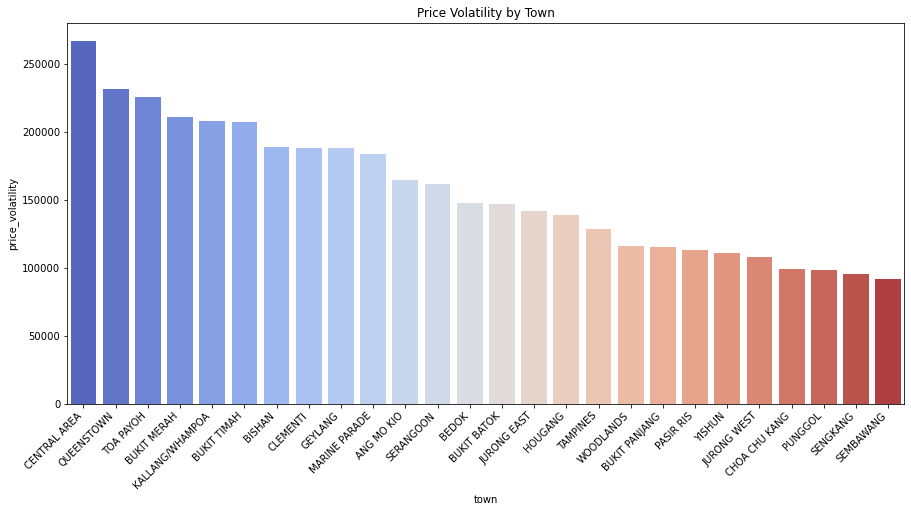

In [85]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.title('Price Volatility by Town')
sns.barplot(data=volatility_by_town, x='town', y='price_volatility', palette='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

The data presented represents the standard deviation of resale prices for each town, which enables us to measure the price volatility or variance in resale prices for each town. High standard deviation indicates higher price volatility, while lower standard deviation suggests more stable prices. In this case, Central Area stands out with the highest price volatility. This indicate that property prices in this area have experienced significant fluctuations over the last 12 years. This could be due to various factors, such as the presence of prime real estate and demand from both investors and residents.

There is also considerable variation in price volatility across different towns. For example, towns like Queenstown, Toa Payoh, and Bukit Merah also have relatively high price volatility, while Sembawang, Sengkang, and Punggol have lower price volatility. This variation may be driven by factors like urban development, accessibility, and demand.

In general, high price volatility can present both opportunities and risks for property investors. Investors in towns with high price volatility should be prepared for greater uncertainty in property prices <sup>[15]</sup>. On the other hand, towns with lower price volatility may offer more stable long-term investments.

### Price Change Percentage

We will calculate the percentage change in resale prices compared over the period of 12 years and 5 years respectively. These information will help us identify towns where prices have increased or decreased significantly over the years. Data from 2012 (starting year) will be used as a reference point, providing us with a longer historical perspective. This can be useful for us to understand long-term trends in resale prices. We will also use data from 2019 (last five years) to capture more recent trends, which can be more relevant for understanding the current market dynamics.

In [86]:
len(df[df['year'] == 2023])

13785

Given that we have a substantial number of transactions this year (2023), we will use data from this year to calculate the percentage change. This can provide us with real-time insights into the market's current state, which proves to be valuable as our analysis aims to assess current market conditions and trends. 

In [87]:
# calculate percentage change

def percentage_change(historical_year, current_year=2023):
    historical_prices = df[df['year'] == historical_year].groupby('town')['resale_price'].mean()
    recent_prices = df[df['year'] == current_year].groupby('town')['resale_price'].mean()
    
    pct_change = ((recent_prices - historical_prices) / historical_prices) * 100
    price_change_df = pd.DataFrame({'town': pct_change.index, 'price_change_pct': pct_change.values})

    return price_change_df

In [88]:
# long-term percentage change

long_t_pctC = percentage_change(2012)
long_t_pctC = long_t_pctC.sort_values(by='price_change_pct', ascending=False)

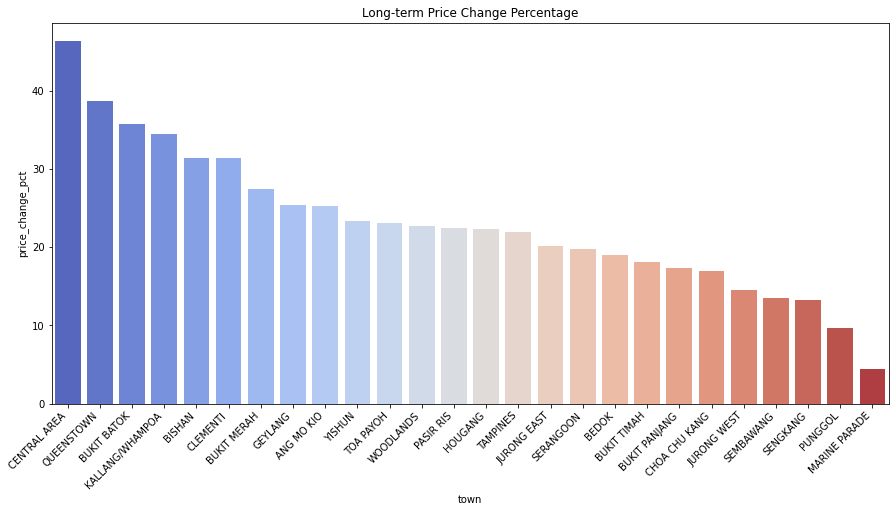

In [89]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.title('Long-term Price Change Percentage')
sns.barplot(data=long_t_pctC, x='town', y='price_change_pct', palette='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Over the last decade (and more), resale price changes vary significantly across different towns. The data suggests that the Singaporean property market has demonstrated resilience and growth over the past 12 years, despite economic fluctuations and external factors. Some towns have seen substantial price increases, while others have experienced more modest growth or even price decreases. The Central Area of Singapore stands out with a notably high percentage price change of approximately 45%. Other towns, including Bishan, Bukit Batok, Bukit Merah, and Queenstown, have experienced considerable price growth, with percentage changes ranging from 30% to 40%. These towns may be considered attractive for property investment. Towns like Yishun, Woodlands, and Tampines have seen relatively steady price growth in the range of 20% to 25%. This suggests a stable and possibly resilient housing market in these areas. However, there are also some towns with a lower growth, such as Sengkang, Sembawang, and Punggol, with percentage changes below 15%. These areas might be characterized by slower appreciation or lower demand. Overall, the variations in price changes highlight the diversity of Singapore's property market.

In [90]:
# short-term percentage change 

short_t_pctC = percentage_change(2019)
short_t_pctC = short_t_pctC.sort_values(by='price_change_pct', ascending=False)

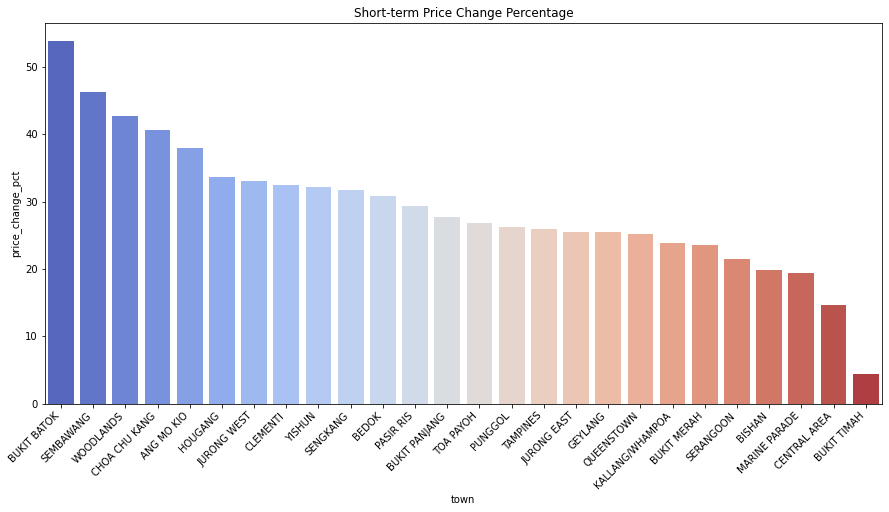

In [91]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.title('Short-term Price Change Percentage')
sns.barplot(data=short_t_pctC, x='town', y='price_change_pct', palette='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Over the last five years, Bukit Batok, Sembawang, Woodlands, and Choa Chu Kang have experienced significant price growth, with percentage changes ranging from approximately 40% to nearly 55%. This suggests that these areas may have become more attractive to homebuyers and investors over this period. Established towns, including Ang Mo Kio, Hougang, and Clementi, have shown consistent price growth, with percentage changes ranging from 30% to 40%. These towns continue to be desirable places to live and invest in real estate. Even in areas like Geylang, Queenstown, and Bukit Merah, where space is limited, there has been healthy price growth, with changes ranging between 20% and 30%. These urban areas remain sought-after due to their amenities and accessibility.

In general, the comparison of percentage changes from the historical data (`long_t_pctC`) show that the Singaporean property market experienced significant appreciation in most towns. This suggests that property values increased substantially during this period. Central Area, which encompasses the central business district, displayed consistent but not extreme growth during this period. It has seen a moderate price increase of approximately 15% within the past five years, suggesting the area to be constantly desirable with a steady price growth despite the already high property values. This indicates that property values in the heart of Singapore remained stable and appreciated at a steady pace.

### Price Index

The price index allows us to analyze and monitor trends in the housing market over time, where we can identify areas where property values are increasing or decreasing. Investors can use price indices to assess the potential for capital appreciation in different towns. A rising price index indicates the potential for property value growth, making it an attractive option for real estate investment. Homebuyers and lenders can use price indices to assess the risk associated with property purchases and mortgage lending. A declining price index may signal a higher risk of property depreciation. Generally, Price indices provide historical data that can be used to forecast future property price trends. This can be valuable for long-term planning and investment strategies. Furthermore, they enhance transparency in the housing market by providing standardized measures of price changes.

In [92]:
def price_index(historical_year):
    price_index_df = pd.DataFrame()
    
    town_groups = df.groupby('town')
    for town, group in town_groups:
        avg_prices = group.groupby('year')['resale_price'].mean()
        price_index = (avg_prices / avg_prices.loc[historical_year]) * 100
        price_index_df[town] = price_index
        
    return price_index_df

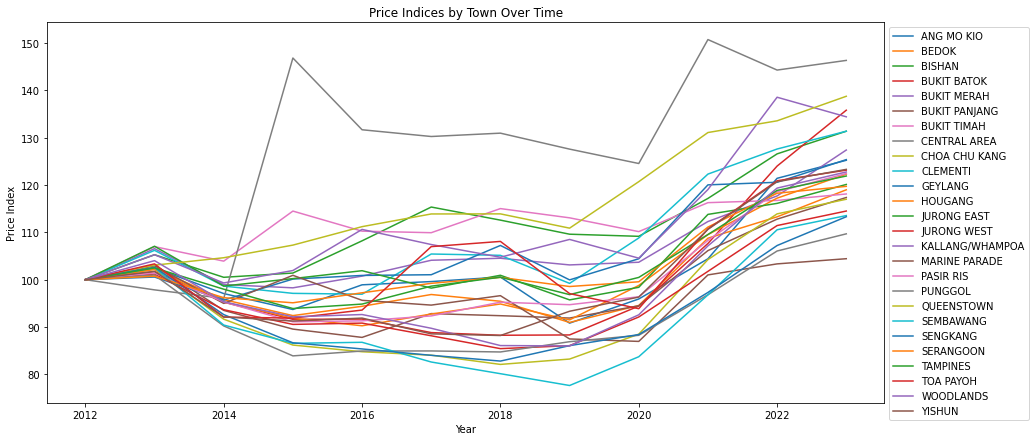

In [93]:
price_index_df = price_index(2012)

plt.figure(figsize=(15, 7))

for town in price_index_df.columns:
    sns.lineplot(data=price_index_df, x=price_index_df.index, y=town, label=town)

plt.xlabel("Year")
plt.ylabel("Price Index")
plt.title("Price Indices by Town Over Time")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

In the context of historical data, we can identify broader market trends in property prices. The data reflects broader market trends, such as the period of strong price growth from 2012 to 2013, followed by fluctuations and stabilization in subsequent years. It is notable that the COVID-19 pandemic in 2020 had varying impacts on different towns. Some towns experienced a slowdown in price growth, while others remained relatively stable. In the most recent years (2022-2023), there appears to be a trend of overall price growth across most towns, indicating recovery and potential increased demand.

Most towns have shown an overall trend of price growth from 2012 to 2023. This suggests a general appreciation in property values across Singapore during this period. Bedok and Bukit Merah have experienced relatively stable and consistent price growth, while others have shown more fluctuation. Bishan, Bukit Timah, and Central Area consistently stand out as towns with high price indices throughout the period. They can be considered high-performing towns, where we can associate them with higher-end properties and prime locations. Otherwise, towns like Yishun and Woodlands have performed relatively over the past decade. These towns started with lower price indices in 2012 but showed significant growth over the years. This could indicate increased demand in these areas.

### Amentities and Facilities

#### Availability of Educational Facilities

In [94]:
df['sch_interaction'] = df['sch_dist'] * df['sch_counts']

The `sch_interaction` feature is a calculated variable that represents the interaction between the distance from each HDB flat to its nearest primary school (`sch_dist`) and the count of primary schools within a certain radius of each flat (`sch_counts`). By multiplying these two values, we provide a numerical representation of how school proximity and the number of nearby schools collectively influence the desirability or price of the flat. This interaction feature helps us better understand how educational facilities influence HDB resale prices, considering both distance and availability.

#### Accessibility to Public Transport

In [95]:
df['mrt_interaction'] = df['mrt_dist'] * df['mrt_counts']

The `mrt_interaction` feature is a calculated variable that represents the interaction between the distance from each HDB flat to its nearest MRT station (`mrt_dist`) and the count of MRT stations within a certain radius of each flat (`mrt_counts`). By multiplying these two values, we create a composite metric that reflects the combined impact of proximity to public transportation and the accessibility of multiple MRT stations. It helps us understand how public transport accessibility influences HDB resale prices, considering both distance and the availability of MRT stations.

### Removing Unnecessary Columns

We will remove columns that are related to the specific location and coordinates of the flat, schools and MRT stations. These include latitude- and longitude-related features and parts of an address (e.g., `block`, `street_name`, etc.). 

In [96]:
df = df.drop(['latitude', 'longitude', 'block', 'street_name', 'sch_lat', 'sch_long', 'addr_coords', 'mrt_lat', 'mrt_long'], axis=1)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245931 entries, 0 to 245930
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   address               245931 non-null  object 
 1   month                 245931 non-null  int64  
 2   town                  245931 non-null  object 
 3   flat_type             245931 non-null  object 
 4   storey_range          245931 non-null  int64  
 5   floor_area_sqm        245931 non-null  float64
 6   flat_model            245931 non-null  object 
 7   lease_commence_date   245931 non-null  int64  
 8   resale_price          245931 non-null  float64
 9   remaining_lease       245931 non-null  int64  
 10  school                245931 non-null  object 
 11  sch_dist              245931 non-null  float64
 12  sch_counts            245931 non-null  int64  
 13  mrt                   245931 non-null  object 
 14  mrt_dist              245931 non-null  float64
 15  

## Exploratory Data Analysis (EDA)

We will delve into analysis questions in different aspects of our dataset to gain insights related to our research goals in the context of housing characteristics and factors affecting resale prices. These will help us understand the real estate market dynamics in our dataset.

### Summary Statistics

In [98]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
month,245931.0,6.565781,3.337526,1.000000,4.000000,7.000000,9.000000,1.200000e+01
storey_range,245931.0,8.440876,5.675390,2.000000,5.000000,8.000000,11.000000,5.000000e+01
floor_area_sqm,245931.0,97.149276,24.278751,31.000000,76.000000,94.000000,112.000000,2.800000e+02
lease_commence_date,245931.0,1993.659636,12.995330,1966.000000,1984.000000,1993.000000,2003.000000,2.019000e+03
resale_price,245931.0,472419.798885,155488.824268,140000.000000,360000.000000,440888.000000,550000.000000,1.500000e+06
remaining_lease,245931.0,70.659636,12.995330,43.000000,61.000000,70.000000,80.000000,9.600000e+01
sch_dist,245931.0,0.412578,0.247239,0.040000,0.240000,0.370000,0.530000,3.310000e+00
sch_counts,245931.0,8.352509,3.421610,0.000000,6.000000,8.000000,10.000000,1.900000e+01
mrt_dist,245931.0,0.678347,0.388094,0.000000,0.370000,0.630000,0.940000,3.680000e+00
mrt_counts,245931.0,5.608557,4.223821,0.000000,3.000000,4.000000,7.000000,2.000000e+01


Based on the summary statistics, the data appears to follow a relatively normal distribution, with a broad range of floor areas and healthy remaining leases between 61 and 80 years, as observed from the 25th to the 75th percentiles. The dataset spans a substantial period, reflecting various housing developments over the years. The remaining lease period spans from 43 to 96 years, indicating that most flats have a significant remaining lease duration. Based on the 25th to the 75th percentiles, the majority of transactions took place between 2015 and 2021.

The median storey range is 8, indicating that a significant number of flats fall within this range. The storey range varies from 2 to 50, suggesting a diverse set of flats in terms of their vertical positioning. The floor area of the flats ranges from 31 sqm to 280 sqm, with a median of 94 sqm. This indicates a wide variation in flat sizes.

The distance to the nearest school varies from 0.04 km to 5.3 km, with an average distance of approximately 0.41 km. The number of schools in proximity to flats ranges from 0 to 19, with an average of around 8 schools. In contrast, the distance to the nearest MRT station spans from 0 km to 3.68 km, with an average distance of approximately 0.68 km. The number of MRT stations near the flats varies from 0 to 20, with an average of approximately 5 stations.

The table reveals resale prices ranging from a minimum of \\$140,000 to a maximum of \\$1,500,000. The mean resale price is approximately \\$472,419.80, with a standard deviation of around \\$155,488.82. Resale prices exhibit significant variability, with the majority falling within the range of \\$360,000 to \\$550,000 (25th to 75th percentiles). There appear to be some potential outliers on the higher end, as indicated by the substantial difference between the 75th percentile and the maximum value. Further investigation is warranted to determine whether these high resale prices are valid or should be treated as outliers.

### Price Distribution Analysis

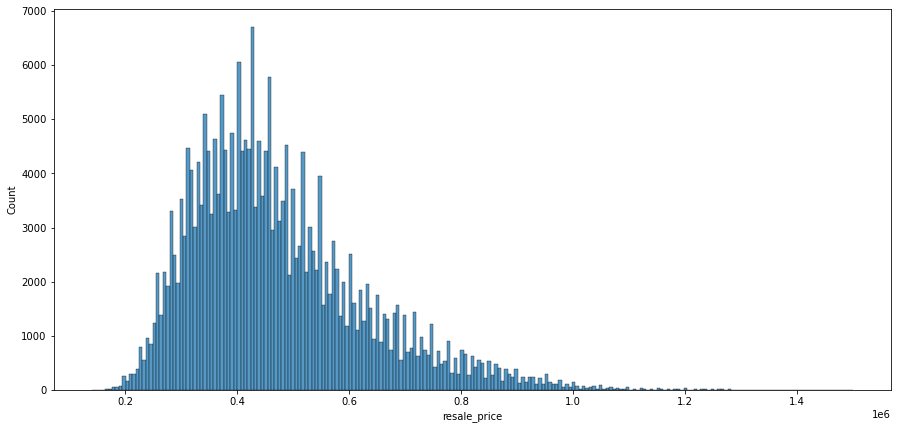

In [99]:
sns.histplot(df['resale_price'])
plt.show()

The histogram presented above illustrates the distribution of resale prices for housing transactions within our dataset. It reveals a right-skewed distribution, indicating that the majority of resale transactions involve lower-priced properties, while fewer transactions pertain to higher-priced ones. This skewness suggests that the housing market primarily offers more affordable housing options. We observe that the most common price range for resale transactions falls within the range of 350,000 SGD to 500,000 SGD. The taller bars within this range signify a higher frequency of transactions, suggesting that many buyers and sellers are active within these price brackets.

As observed in the summary statistics, the maximum resale price reaches 1,500,000 SGD, significantly exceeding the upper quartile (75th percentile) value of 550,000 SGD. This indicates the presence of upper outliers. Correspondingly, these outliers manifest in the right tail of the histogram, likely representing unique real estate deals that deviate from the common pricing trends. Given that these outliers are valid data points, they will be retained in our analysis.

### Demand of Resale Flats

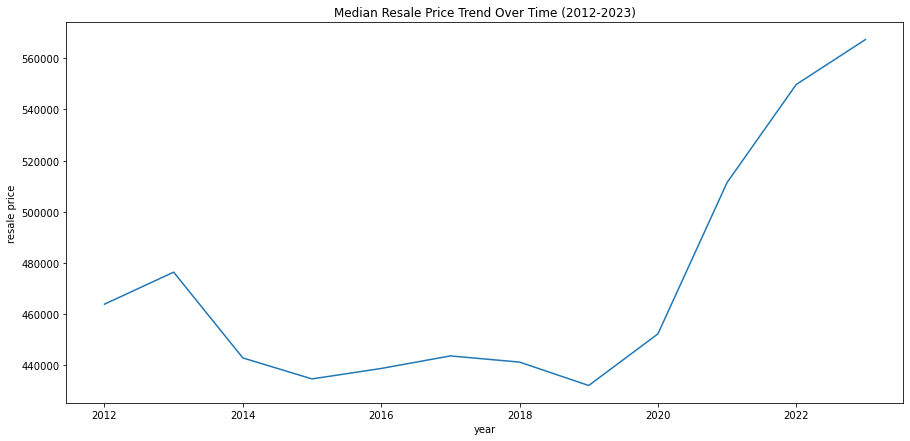

In [100]:
resale_per_year = df.groupby('year')['resale_price'].mean().reset_index()

sns.lineplot(x='year', y='resale_price', data=resale_per_year)
plt.title('Median Resale Price Trend Over Time (2012-2023)')
plt.ylabel('resale price')
plt.show()

The line plot reveals a general upward trend in median resale prices over the years. From 2012 to 2023, median resale prices have consistently increased, indicating a positive trend in the real estate market during this period. However, there are some fluctuations from year to year. Notable increases and decreases in median resale prices can be observed, suggesting that the market experiences variations in demand and supply annually. Despite fluctuations, the real estate market appears to have demonstrated resilience and continued to appreciate in value, which could be influenced by factors like economic growth and urban development. The plot shows a few inflection points where the direction of the trend changes. For example, there was a significant increase in median resale prices starting in 2019, and this trend continued into subsequent years. These inflection points may be associated with market events or policy changes. The long-term trend of increasing resale prices suggests that real estate properties in the dataset have appreciated in value over the years. This information may be valuable for long-term investment considerations.

### Town-wise Price Analysis

#### Distribution of Towns

In [101]:
from collections import Counter

In [102]:
# value count of each town 

town_ = []

for i in range(0, len(df['town'])):
    town_.append(df['town'][i])
    
count = Counter(town_)

In [103]:
towns = list(count.keys())
count = list(count.values())

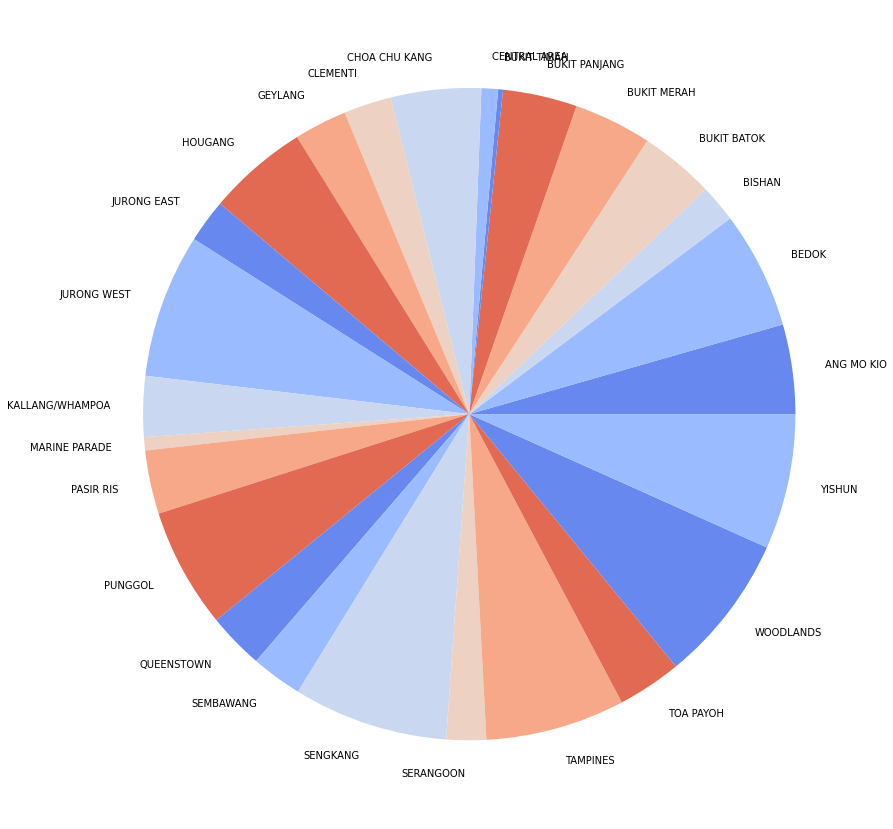

In [104]:
# plotting data on pie chart

plt.figure(figsize=(15, 15)) 
palette_color = sns.color_palette('coolwarm')
plt.pie(count, labels=towns, colors=palette_color)
plt.show()

The pie chart visually represents the distribution of flats among different towns in our dataset. Each segment of the pie represents a specific town, and the size of each segment corresponds to the number of flats located in that town. The chart clearly highlights that some towns have a notably higher number of flats compared to others. These highly populated towns include Sengkang, Woodlands, Jurong West, Tampines, and Yishun, as indicated by their larger pie segments. As observed, the distribution is not uniform, indicating that certain towns are more densely populated with flats than others. In general, this distribution can be useful for assessing the market potential of different towns. Areas with a higher number of flats might indicate higher market activity and demand, which could affect property prices.

#### Average Resale Price by Town

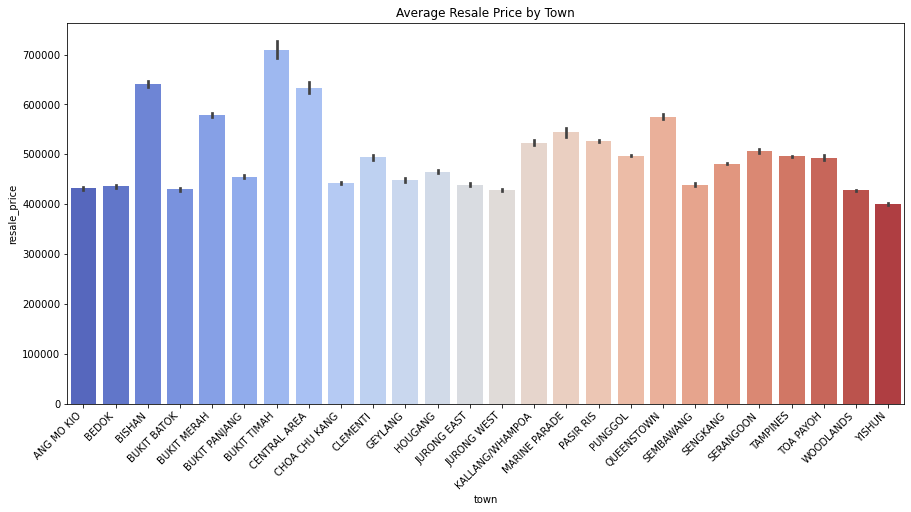

In [105]:
# rotate x-axis tick labels [16]

fig, ax = plt.subplots(figsize=(15, 7))
plt.title('Average Resale Price by Town')
sns.barplot(data=df, x='town', y='resale_price', palette='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Different towns have significant average resale price differences. Such price variation exists where Bukit Timah has one of the highest average resale prices, while Yishun has one of the lowest. We can identify the trend that indicates that towns with higher average resale prices are generally considered more expensive (e.g., Bukit Timah, Bukit Merah). Likewise, towns with the lowest average resale prices are generally considered more affordable (e.g., Yishun, Woodlands). Another observation that we can make is Central Area has a relatively high average resale price, which is expected given its close proximity to Central Business District (CBD) and prominent landmarks and town area (e.g., Orchard, Marina Bay) in Singapore.

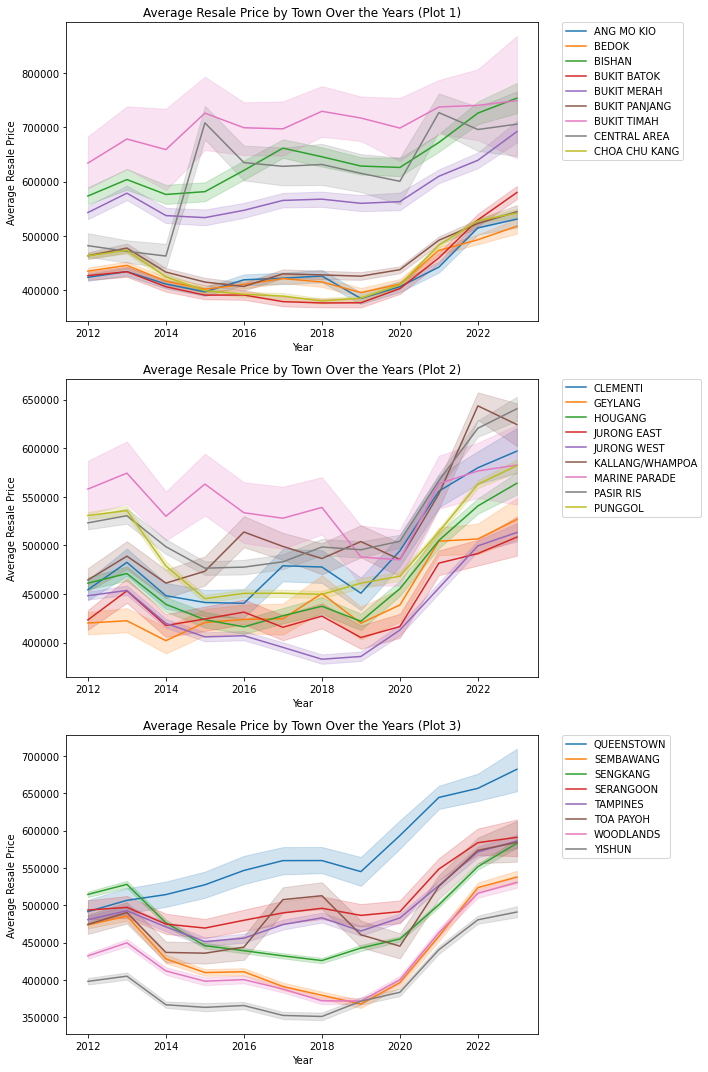

In [106]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# split the towns into 3 roughly equal parts
towns = df['town'].unique()
num_towns = len(towns)
towns_per_subplot = int(np.ceil(num_towns / 3))

for i, ax in enumerate(axes):
    start_idx = i * towns_per_subplot
    end_idx = (i + 1) * towns_per_subplot
    towns_subset = towns[start_idx:end_idx]
    
    # filter the data for the towns in the current subplot
    town_data = df[df['town'].isin(towns_subset)]
    sns.lineplot(data=town_data, x='year', y='resale_price', hue='town', ax=ax)
    ax.set_title(f'Average Resale Price by Town Over the Years (Plot {i+1})')
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Resale Price')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.tight_layout()
plt.show()

All towns have seen an increase in average resale prices over the years. This could be due to factors like inflation, increased demand for housing, or improvements in infrastructure and amenities. 

There is significant variation in average resale prices between different towns. For example, Bishan consistently has higher average prices compared to most other towns, while Bukit Batok generally has lower prices. Bishan, Bukit Timah, and Central Area consistently have some of the highest average resale prices, which may be attributed to their prime locations and desirability. Pasir Ris has exhibited consistent growth in average resale prices from 2012 to 2023. This suggests a stable and potentially attractive real estate market in this town. Punggol has shown an upward trend in average resale prices, although there was a dip in 2015. The consistent growth since then might be influenced by developments and improved amenities in the area. Queenstown has experienced significant growth in average resale prices over the years. It is one of the towns with the highest average resale prices in the dataset, indicating its desirability as a residential area. Sembawang's average resale prices remained relatively stable until a noticeable increase in 2022 and 2023. 

Sengkang has shown a gradual increase in average resale prices. This could be due to the gradual improvement in public transport accessibility via the development of LRT in recent years <sup>[17]</sup>. Serangoon demonstrates steady growth in average resale prices. This could be due to its strategic location and access to various facilities. Tampines has experienced consistent growth in average resale prices over the years. It is known for its well-developed infrastructure and amenities.

Bukit Batok and Choa Chu Kang tend to have lower average resale prices, possibly due to their location further from the city center. Hougang, in particular, has exhibited relatively steady growth in average resale prices from 2012 to 2023. Toa Payoh has shown fluctuating average resale prices over the years, with notable peaks in 2017 and 2022. Woodlands experienced a gradual decline in average resale prices from 2013 to 2019. However, there has been a recovery in prices since 2020. Yishun's average resale prices have remained relatively stable, with a slight increase in recent years.

This may indicate stable demand for housing in this town. Jurong East shows some fluctuations in average resale prices, especially in 2013 and 2015. On the other side, Jurong West has maintained relatively stable resale prices from 2012 to 2023, with only modest increases. This could be due to a balance between supply and demand in this town. Marine Parade has had some fluctuations in average resale prices. While there has been growth overall, these fluctuations may indicate sensitivity to market dynamics or local factors.

In recent years (2021 onwards), many towns, including Ang Mo Kio, Bedok, and Geylang, have seen significant increases in average resale prices. Similarly, Kallang/Whampoa has experienced a significant increase in average resale prices over the years, with a noticeable spike in 2022.

### Time Trends

#### Quarterly Trends Across the Years

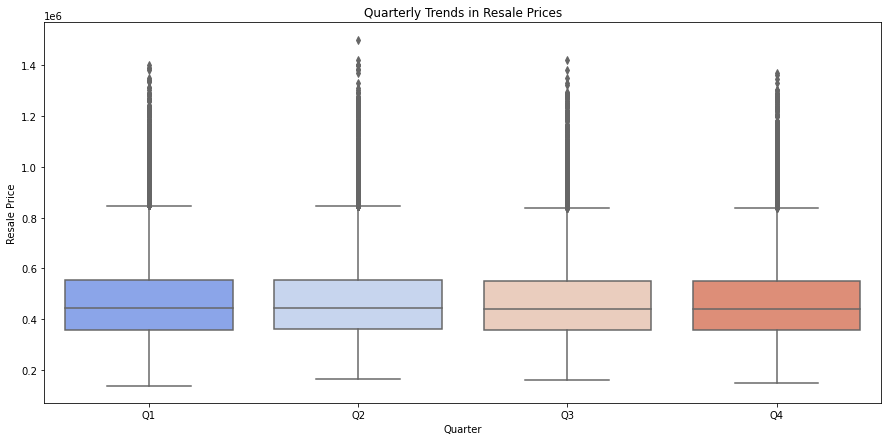

In [107]:
sns.boxplot(x='quarter', y='resale_price', data=df, palette='coolwarm')

plt.title('Quarterly Trends in Resale Prices')
plt.xlabel('Quarter')
plt.ylabel('Resale Price')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Q1', 'Q2', 'Q3', 'Q4'])

plt.show()

The box plot above illustrates the distribution of resale prices across different quarters of the year (Q1, Q2, Q3, and Q4). Each box represents one quarter, and the whiskers show the range of resale prices within each quarter. One noticeable observation is that the box plots for all four quarters look quite similar. This similarity suggests that the distribution of resale prices does not vary drastically from one quarter to another. While the middle line within each box shows slight differences, the median resale prices remain relatively consistent across quarters. The width of each box indicates the spread or variability of resale prices within a quarter. Interestingly, the boxes are fairly consistent in width across all quarters, suggesting similar price spreads.

There are fewer transactions typically occurring at the beginning of the year (Q1), but transaction volumes increase as the year progresses, with the highest number of transactions in the later quarters (Q2, Q3, and Q4). This suggests that there is a seasonality effect in the real estate market, with more people buying and selling homes in the middle and end of the year. Overall, the distribution of resale prices remains relatively stable throughout the year. This suggests that, on average, the real estate market in our dataset does not experience significant seasonal fluctuations in resale prices.

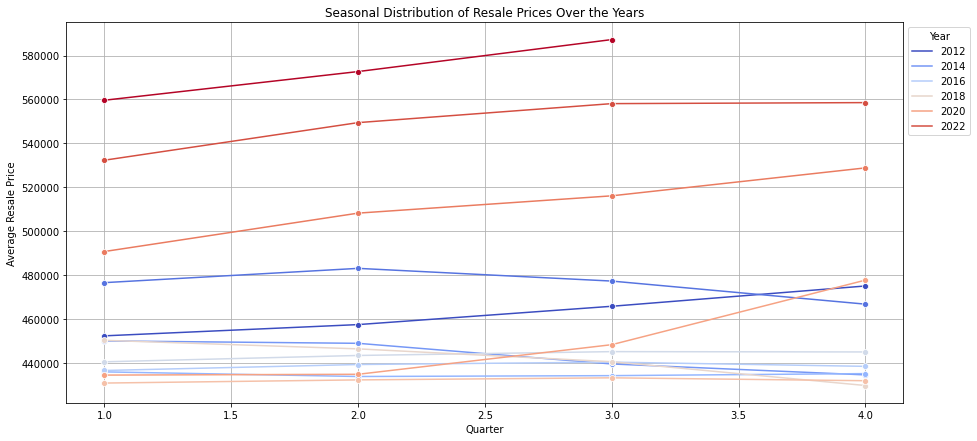

In [108]:
resale_per_quarter = df.groupby(['year', 'quarter'])['resale_price'].mean().reset_index()

sns.lineplot(x='quarter', y='resale_price', hue='year', data=resale_per_quarter, marker='o', palette='coolwarm')
plt.title('Seasonal Distribution of Resale Prices Over the Years')
plt.xlabel('Quarter')
plt.ylabel('Average Resale Price')
plt.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)

plt.show()

The plot shows a general upward trend in average resale prices over the years from 2012 to 2023. This indicates that, on average, property prices have been increasing over this period. While there is an overall upward trend, there are noticeable seasonal variations within each year. 

In the line plot, each `o` represents a data point where the average resale price was calculated for a specific quarter and year combination. Typically, Q1 starts with lower average resale prices at the beginning of the year. However, there's an increasing trend in Q1 prices over the years, particularly in recent years (2020 to 2023). Q2 generally sees a gradual increase in average resale prices across all years. In most years, Q3 shows relatively stable or slightly decreasing average resale prices. Q4 often exhibits fluctuations but tends to end the year with higher average resale prices.

While there is a consistent trend of price appreciation, some years stand out with more significant increases. For example, 2022 and 2023 have notably higher average resale prices compared to previous years, indicating a potential surge in demand or other market factors during those years. These quarterly trends may be influenced by various market dynamics, including economic conditions, government policies, and seasonal buyer and seller behaviors.

#### Comprehensive Analysis of Yearly Resale Price Trends

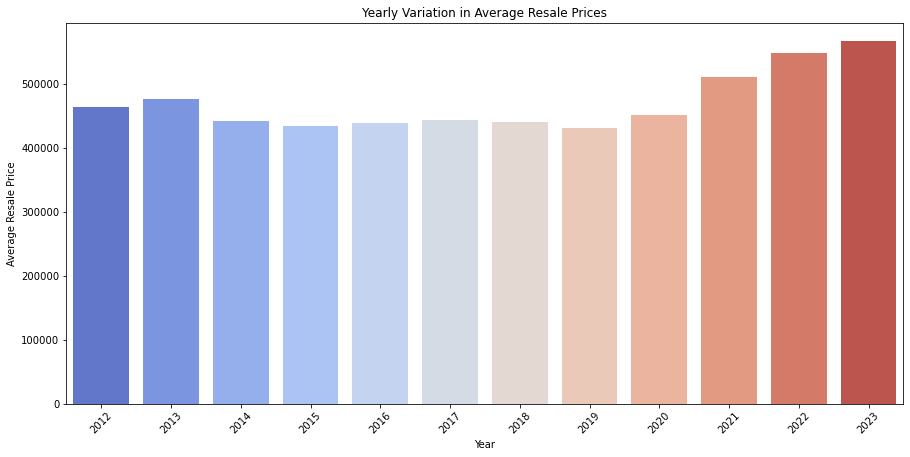

In [109]:
yearly_avg_prices = df.groupby('year')['resale_price'].mean().reset_index()

sns.barplot(x='year', y='resale_price', data=yearly_avg_prices, palette='coolwarm')
plt.title('Yearly Variation in Average Resale Prices')
plt.xlabel('Year')
plt.ylabel('Average Resale Price')
plt.xticks(rotation=45)

plt.show()

From the yearly average resale prices, there is a consistent upward trend in average resale prices from 2012 to 2023. This indicates that, on average, property prices have been increasing over this period, suggesting overall market growth and appreciation in property values. While there is an overall upward trend, there are fluctuations in average resale prices from year to year. For example, there is a significant increase in average resale prices starting in 2019, and this trend continues into subsequent years (2020, 2021, 2022, and 2023). These inflection points may be associated with changes in demand and supply dynamics. The most recent years, 2022 and 2023, have the highest average resale prices in the dataset. This suggests that these years have experienced particularly strong demand or other market factors driving up property prices.

We can also observe how the rate of increase varies throughout the years. For instance, the increase from 2018 to 2019 is relatively modest compared to the more substantial increases seen in the years that follow. Individuals looking to invest in the Singaporean real estate market may use this information to assess whether it is a favorable time to enter the market. The data suggests that, historically, the market has demonstrated appreciation in property values, but investors should consider both short-term fluctuations and long-term trends.

#### Monthly Variation in Average Resale Prices

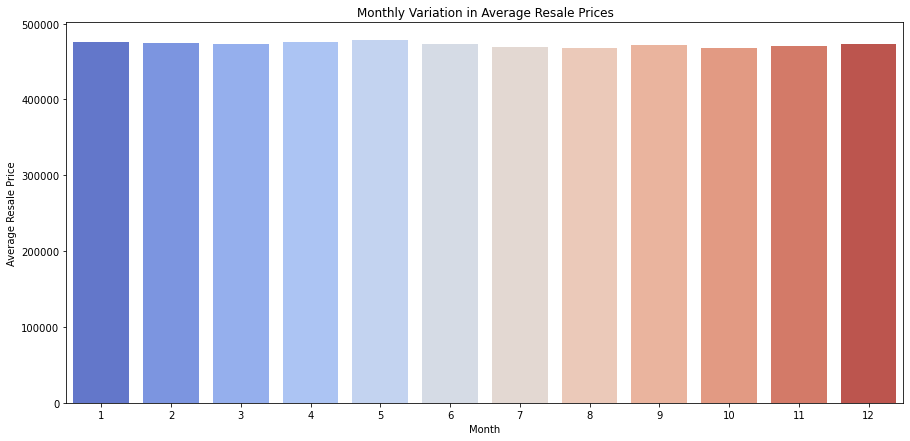

In [110]:
monthly_avg_prices = df.groupby('month')['resale_price'].mean().reset_index()

sns.barplot(x='month', y='resale_price', data=monthly_avg_prices, palette='coolwarm')
plt.title('Monthly Variation in Average Resale Prices')
plt.xlabel('Month')
plt.ylabel('Average Resale Price')

plt.show()

The differences between the monthly average resale prices did not appear very pronounced due to the relatively subtle variations in average prices. This suggests that monthly fluctuations can be relatively small compared to the overall trends.

#### Monthly Flats Sold Over the Years

In [111]:
flats = df[['month', 'year']].value_counts().reset_index(name='sold').copy()
flats = flats.sort_values(['month', 'year'], ascending=[True, True])
monthly_flats = flats.pivot_table(index='month', columns='year', values='sold')

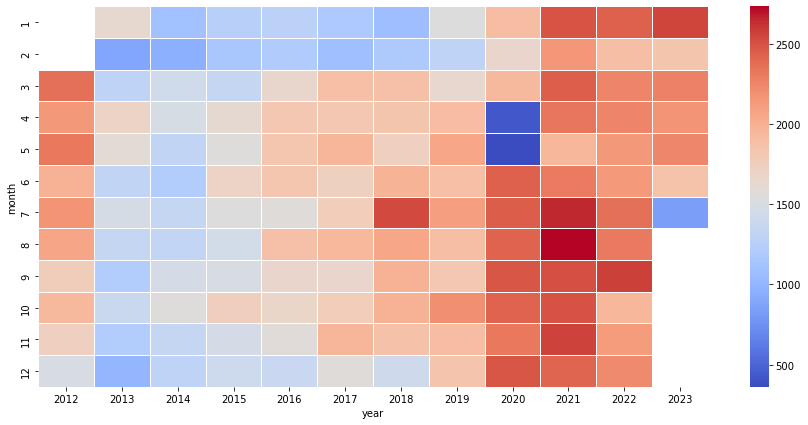

In [112]:
sns.heatmap(data=monthly_flats, cmap='coolwarm', linecolor='white', linewidths=1)

plt.show()

From the presented heatmap, there appears to be a recurring pattern of peaks and troughs throughout the years. This suggests the presence of seasonal trends in the real estate market, where certain months experience higher sales compared to others. For example, there are noticeable peaks around the middle of the year (May to July) and a drop in sales towards the end of the year (November to December). There is also an obvious variation in the number of flats sold from year to year. Some years show an increase in sales (e.g., 2020), while others have a decrease (e.g., 2021). Additionally, it makes sense that gradually as the years go forward, there will be more sales of flats. That may be since property valuation increase with the increasing population. Focusing on the colour gradient, we can observe that the resales of flats are more frequent from June 2020 onwards. In other words, historical housing price data suggests ongoing demand for apartments. It is also notable to mention that the sudden drop in sales of apartments shown in July 2023 is due to unfinalised data collected (data collected at the beginning of July 2023).

This data can be useful for forecasting and planning purposes. Understanding seasonal variations can help real estate professionals anticipate periods of high demand and adjust marketing and pricing strategies accordingly. Overall, the heatmap allows us to gain insights into the overall health of the real estate market. Sustained increases in sales might indicate a thriving market, while prolonged decreases could signal a slowdown.

### Accessibility Factors

#### Relationship Between School Interaction and Resale Prices

In [113]:
df['sch_interaction'].corr(df['resale_price'])

0.005394640068170568

The correlation coefficient between `sch_interaction` and `resale_price` is approximately 0.0054. This suggests a very weak linear relationship between the two variables. There is almost no linear association between the school interaction score and resale prices. The low correlation indicates that changes in school interaction score do not provide much predictive power for explaining variations in resale prices.

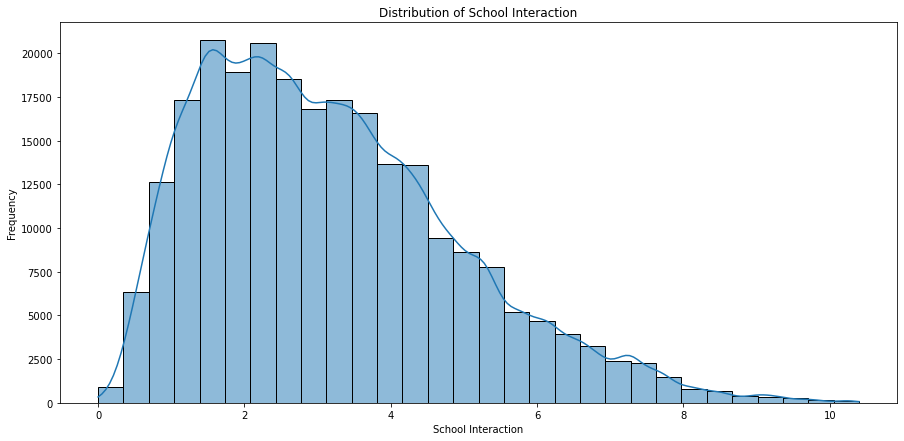

In [114]:
sns.histplot(df['sch_interaction'], bins=30, kde=True)
plt.title('Distribution of School Interaction')
plt.xlabel('School Interaction')
plt.ylabel('Frequency')
plt.show()

The value of `sch_interaction` represents a calculated variable that likely quantifies the interaction or proximity between schools and properties in the dataset. A higher value suggests that a property is located closer to schools. This can be indicative of properties in neighborhoods with better access to educational institutions. This can be an important factor for families with school-going children. According to the histogram, the distribution appears to be right-skewed. This suggests that there are relatively more data points with lower values. The range of values, ranging from a minimum of 0 to a maximum of over 10, suggests that some properties are more closely associated with schools, while others are farther away. This variability can reflect the diversity of locations and neighborhoods within the dataset. 

In [115]:
df['sch_dist'].corr(df['resale_price'])

-0.0009535202964656912

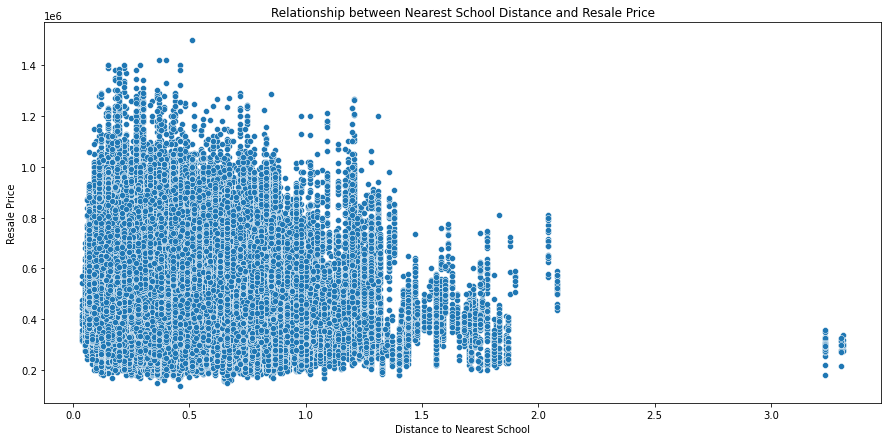

In [116]:
sns.scatterplot(x='sch_dist', y='resale_price', data=df)
plt.title('Relationship between Nearest School Distance and Resale Price')
plt.xlabel('Distance to Nearest School')
plt.ylabel('Resale Price')
plt.show()

The correlation coefficient between `sch_dist` (distance to the nearest school) and `resale_price` is approximately -0.001, indicating a very weak linear relationship between these two variables. There is almost no linear relationship between the distance to the nearest school and resale prices of properties. Changes in the distance to the nearest school is unlikely to associate with significant changes in resale prices on a linear scale.

When looking at the scatterplot of the two variables, we observe points scattered randomly without any clear upward or downward trend. This lack of a pronounced pattern in the scatterplot further supports the weak correlation observed.

In [117]:
df['sch_counts'].corr(df['resale_price'])

-0.017780774349590536

The negative correlation coefficient indicates a weak negative correlation between the number of schools within a 2km radius and resale prices. This means that as the number of schools increases, resale prices tend to slightly decrease, but the relationship is not strong. The correlation coefficient being close to zero suggests that the number of schools within a 2km radius has a limited impact on resale prices.

#### Town-wise Patterns in Accessibility to Primary Schools

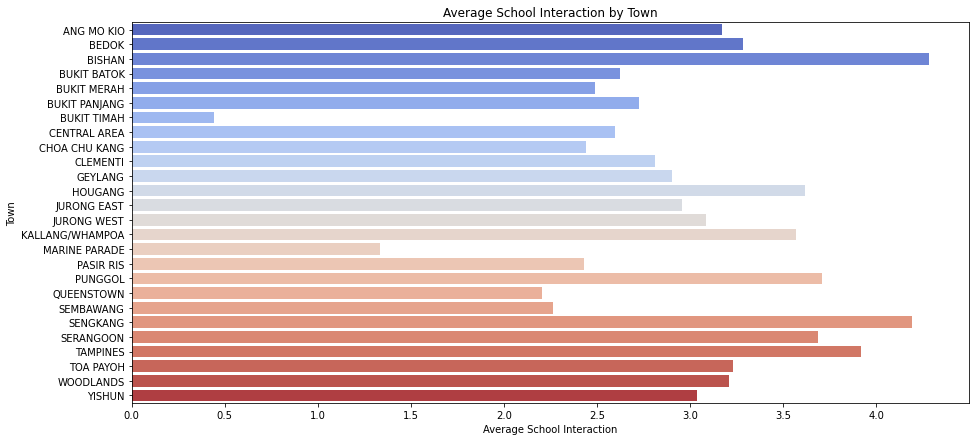

In [118]:
sch_interaction_by_town = df.groupby('town')['sch_interaction'].mean().reset_index()

sns.barplot(x='sch_interaction', y='town', data=sch_interaction_by_town, palette='coolwarm')
plt.title('Average School Interaction by Town')
plt.xlabel('Average School Interaction')
plt.ylabel('Town')
plt.show()

The height of each bar represents the average school interaction score for a specific town. Towns with longer bars have higher average school interaction scores, indicating better accessibility to schools within those areas. Sengkang, Punggol, Tampines and Woodlands have notably high average school interaction scores. This suggests that these towns have good accessibility to schools, which may be appealing to families with school-going children. On the other hand, Bukit Timah, Queenstown and Central Area have lower average school interaction scores, indicating relatively lower accessibility to schools. 

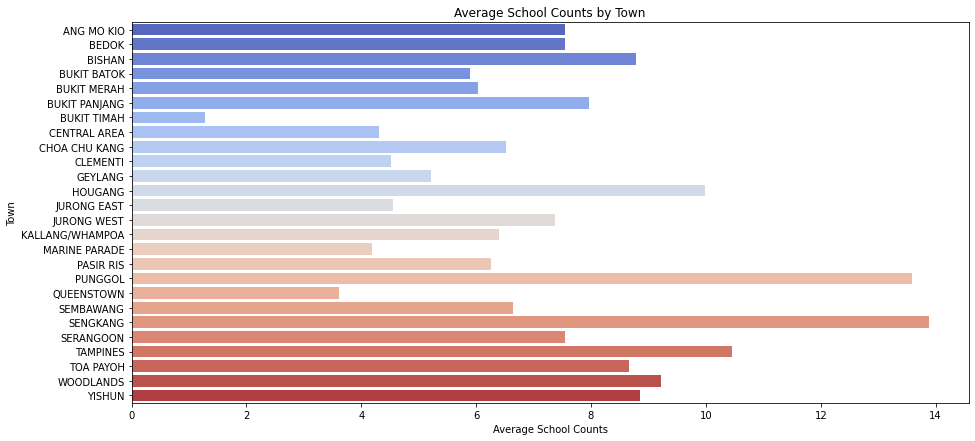

In [119]:
sch_counts_by_town = df.groupby('town')['sch_counts'].mean().reset_index()

sns.barplot(x='sch_counts', y='town', data=sch_counts_by_town, palette='coolwarm')
plt.title('Average School Counts by Town')
plt.xlabel('Average School Counts')
plt.ylabel('Town')
plt.show()

From the bar plot showing the average number of schools within a 2km radius, the length of each bar represents the average number of schools within a 2km radius for a specific town. Towns with longer bars have a higher average number of nearby schools, indicating a greater density of educational facilities within those areas. Punggol, Sengkang, Tampines and Hougang have notably high average school counts. This suggests that these towns have a greater concentration of schools within close proximity, providing residents with various educational options. Conversely, Central Area, Queenstown and Bukit Timah have lower average school counts, indicating fewer nearby schools. Residents in these areas may have relatively fewer school choices nearby. The data can be valuable for families with school-age children who may prioritize living in areas with a higher density of schools. It also highlights areas where there may be potential for new school developments to meet the educational needs of the population.

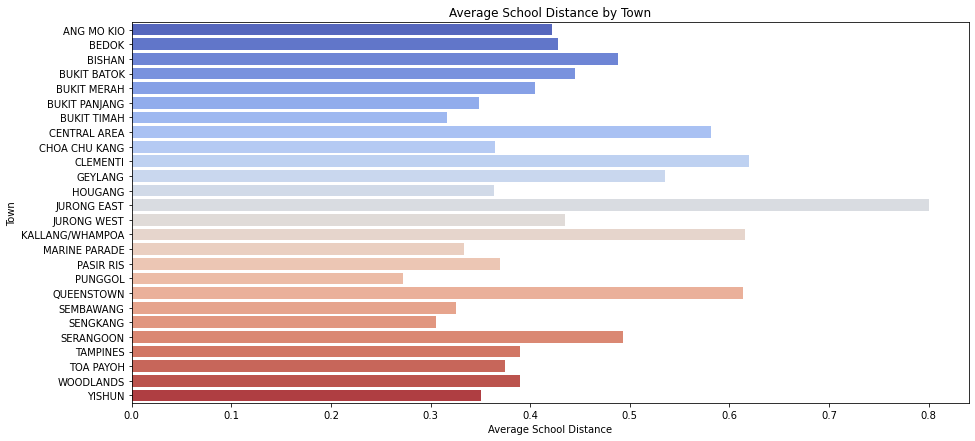

In [120]:
sch_dist_by_town = df.groupby('town')['sch_dist'].mean().reset_index()

sns.barplot(x='sch_dist', y='town', data=sch_dist_by_town, palette='coolwarm')
plt.title('Average School Distance by Town')
plt.xlabel('Average School Distance')
plt.ylabel('Town')
plt.show()

The bar plot shows the average distance to the nearest school by town, where the length of each bar represents the average distance to the nearest school for a specific town. Towns with shorter bars have schools that are, on average, closer to residential areas, indicating better school proximity. Punggol, Sengkang and Bukit Panjang have notably short bars, suggesting that schools in these areas are relatively close to residential properties. This could be an attractive feature for families with school-age children. On the other hand, Jurong East, Clementi and Geylang have longer bars, indicating a greater average distance to the nearest school. Residents in these areas may need to travel a bit farther to access educational facilities. The data highlights the accessibility of schools in different towns. Shorter average distances to schools generally imply easier access for residents. This information can be valuable for families considering proximity to schools when choosing a place to live. Urban planners and policymakers may use this information to assess the distribution of schools and consider strategies for improving school accessibility in areas with longer average distances.

#### Relationship Between Public Transport Interaction and Resale Prices

In [121]:
df['mrt_interaction'].corr(df['resale_price'])

0.038495652239076764

The positive correlation coefficient suggests that there is a weak positive linear relationship between `mrt_interaction` (public transport accessibility) and `resale_price`. This means that, on average, as the MRT interaction score increases, there is a slight tendency for resale prices to increase. However, the correlation is quite weak, indicating that other factors likely have a more significant impact on resale prices. While public transport accessibility may have some influence on resale prices, it is not the primary driver, and other factors such as location, property size, condition, and market demand likely play more significant roles.

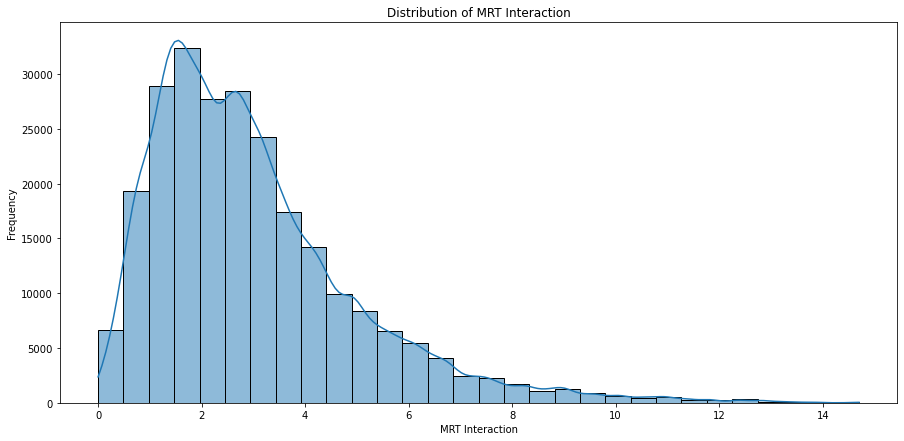

In [122]:
sns.histplot(df['mrt_interaction'], bins=30, kde=True)
plt.title('Distribution of MRT Interaction')
plt.xlabel('MRT Interaction')
plt.ylabel('Frequency')
plt.show()

In [123]:
df['mrt_counts'].unique()

array([ 5,  2,  6,  3,  1,  4,  7, 12, 11, 10, 13, 14,  9,  8,  0, 15, 16,
       18, 17, 19, 20], dtype=int64)

The histogram above exhibits a positive skewness, evident from its elongated tail on the right-hand side. This suggests that the majority of properties tend to have relatively low MRT interaction values, while a minority of properties exhibit exceptionally high values. The distribution lacks symmetry. There appears to be outliers on the right side of the distribution, as indicated by the long tail in the histogram. These outliers represent properties with exceptionally high MRT interaction scores, which could be due to factors like proximity to multiple MRT stations. This observation is supported by the fact that the range of MRT counts within a 2km radius of the flats can extend up to 20.

In [124]:
df['mrt_dist'].corr(df['resale_price'])

-0.05574897696980198

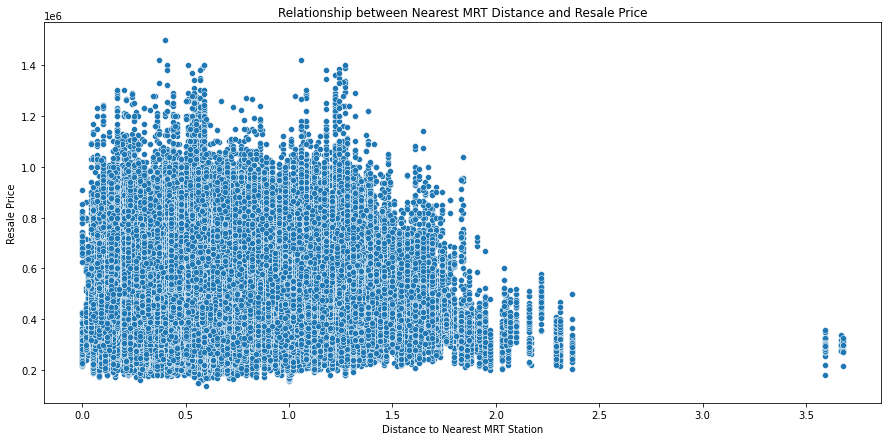

In [125]:
sns.scatterplot(x='mrt_dist', y='resale_price', data=df)
plt.title('Relationship between Nearest MRT Distance and Resale Price')
plt.xlabel('Distance to Nearest MRT Station')
plt.ylabel('Resale Price')
plt.show()

The negative sign of the correlation coefficient indicates a weak negative correlation between MRT distance and resale price. In other words, as the distance to the nearest MRT station increases, there is a slight tendency for resale prices to decrease. However, the strength of this relationship is relatively low. While there is a negative correlation, it is important to note that the correlation coefficient is close to zero. This suggests that the distance to the nearest MRT station alone does not have a strong influence on resale prices. The scatterplot shows a scattered distribution of data points, but there is not a clear-cut relationship. There is a significant amount of variability in resale prices for properties at various distances from the nearest MRT station. Some properties located farther from the MRT station have higher resale prices, while others closer to the station have lower prices. This reinforces the idea that MRT distance alone does not determine resale prices.

In [126]:
df['mrt_counts'].corr(df['resale_price'])

0.06633930241849206

The positive correlation coefficient suggests a weak positive relationship between the number of MRT stations within a 2km radius and resale prices. As the count of nearby MRT stations increases, there is a slight tendency for resale prices to be higher. The strength of the relationship between MRT station count and resale price may vary depending on the specific location and town. In some areas, having multiple nearby MRT stations might be a more significant selling point, leading to higher prices, while in other areas, it may be less influential.

#### Town-wise Patterns in Accessibility to Primary Schools

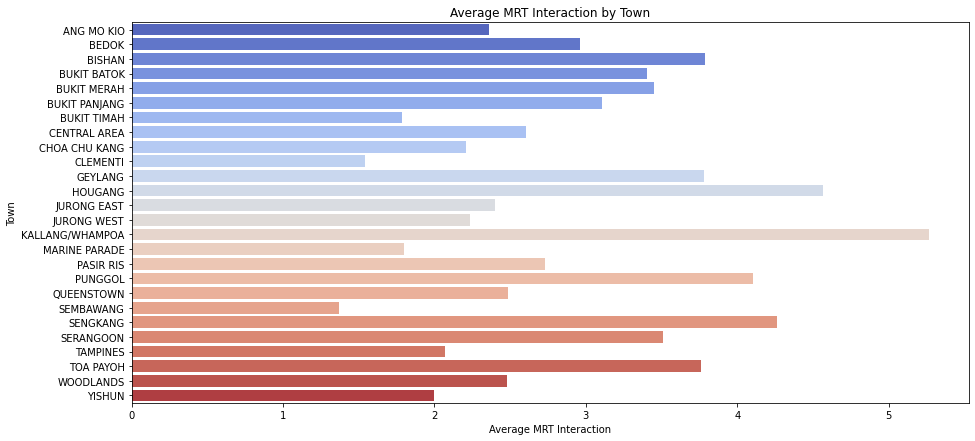

In [127]:
mrt_interaction_by_town = df.groupby('town')['mrt_interaction'].mean().reset_index()

sns.barplot(x='mrt_interaction', y='town', data=mrt_interaction_by_town, palette='coolwarm')
plt.title('Average MRT Interaction by Town')
plt.xlabel('Average MRT Interaction')
plt.ylabel('Town')
plt.show()

The chart displays the average MRT interaction score for each town, represented by the horizontal bars. MRT interaction represents the accessibility or proximity of MRT stations to properties in each town. Towns like Kallang/Whampoa, Hougang, and Punggol have relatively high average MRT interaction scores. This suggests that properties in these towns are generally more accessible to MRT stations, which can be attractive to residents who rely on public transportation. Conversely, Sembawang and Clementi have lower average MRT interaction scores, indicating that properties in these areas may be less accessible to MRT stations. Homebuyers looking for properties may consider the MRT interaction score of a town when assessing their transportation needs. Those who rely heavily on public transportation may prioritize towns with higher MRT interaction.

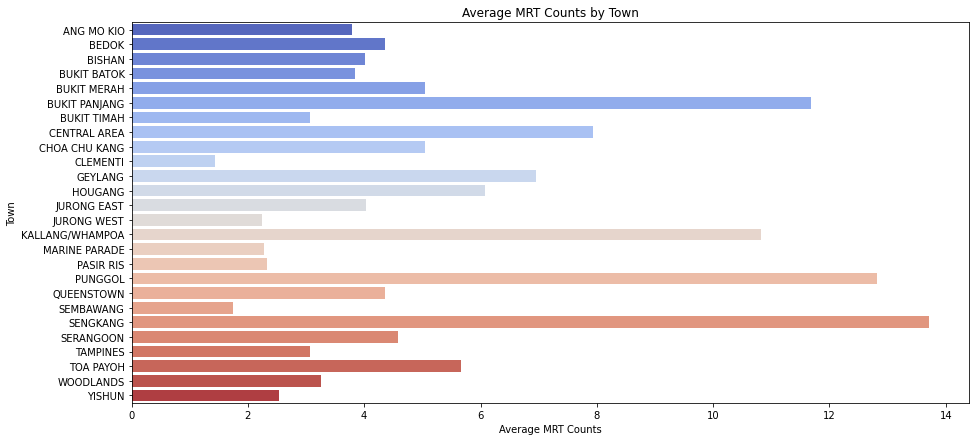

In [128]:
mrt_counts_by_town = df.groupby('town')['mrt_counts'].mean().reset_index()

sns.barplot(x='mrt_counts', y='town', data=mrt_counts_by_town, palette='coolwarm')
plt.title('Average MRT Counts by Town')
plt.xlabel('Average MRT Counts')
plt.ylabel('Town')
plt.show()

From the data on "Average MRT Counts by Town", the data shows the average number of MRT stations within a 2km radius of properties in each town. This metric represents the availability and density of MRT stations in different areas. Towns are listed along with their corresponding average MRT counts. Some towns have a higher average number of MRT stations nearby, while others have fewer stations. Sengkang, Punggol, and Kallang/Whampoa have relatively high average MRT counts. This suggests that these towns are well-served by a dense network of MRT stations, providing residents with convenient access to public transportation. Clementi and Sembawang have lower average MRT counts, indicating a less dense distribution of MRT stations in these areas. Higher MRT station density can enhance the accessibility of a town, making it easier for residents to commute and access public transportation. The availability of nearby MRT stations can influence property prices and desirability. Towns with better MRT station coverage may attract more demand, potentially affecting property values.

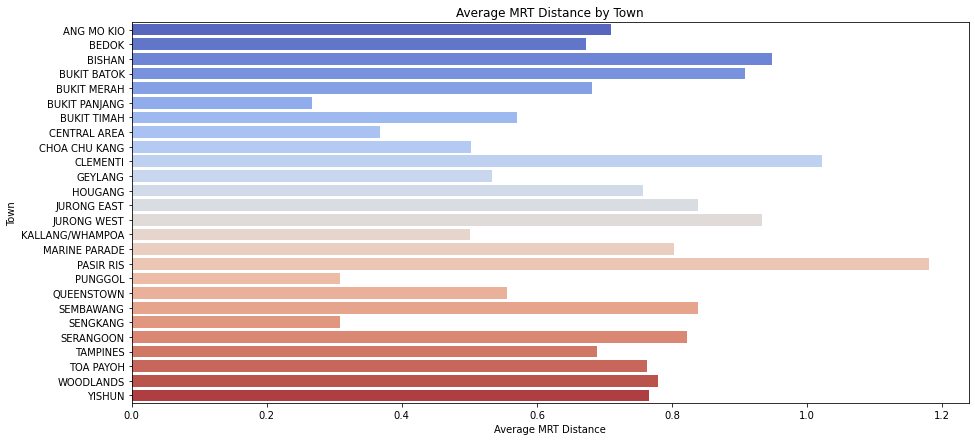

In [129]:
mrt_dist_by_town = df.groupby('town')['mrt_dist'].mean().reset_index()

sns.barplot(x='mrt_dist', y='town', data=mrt_dist_by_town, palette='coolwarm')
plt.title('Average MRT Distance by Town')
plt.xlabel('Average MRT Distance')
plt.ylabel('Town')
plt.show()

From the data on "Average MRT Distance by Town", the data displays the average distance from properties in each town to the nearest MRT station. This metric provides insights into how far residents in different towns typically need to travel to access MRT services. Bukit Panjang, Punggol, and Sengkang have relatively shorter average distances to the nearest MRT station. This suggests that these towns are closer to MRT stations, making public transportation more easily accessible to residents. In contrast, towns like Clementi and Jurong West have longer average distances to the nearest MRT station, indicating that residents in these areas may need to travel a bit farther to reach an MRT station. Shorter MRT distances generally imply better accessibility to public transportation, which can be a key factor for individuals who rely on MRT services for their daily commute. The proximity to MRT stations can influence property prices and demand. Towns with shorter MRT distances may attract more buyers and potentially have higher property values. Urban planners and transportation authorities can use this data to assess the distribution of MRT stations and identify areas with longer distances to stations, potentially indicating opportunities for improved public transportation access.

### Space-related Features

#### Relationship between Floor Area and Resale Price

In [130]:
df['floor_area_sqm'].corr(df['resale_price'])

0.6291323846902239

A correlation coefficient of 0.629 suggests a moderately strong positive correlation between the floor area (`floor_area_sqm`) and resale prices. As the floor area of flats increases, their resale prices tend to increase as well. In other words, larger flats with more floor area are generally associated with higher resale prices. This means that changes in floor area are reasonably predictive of changes in resale prices. 

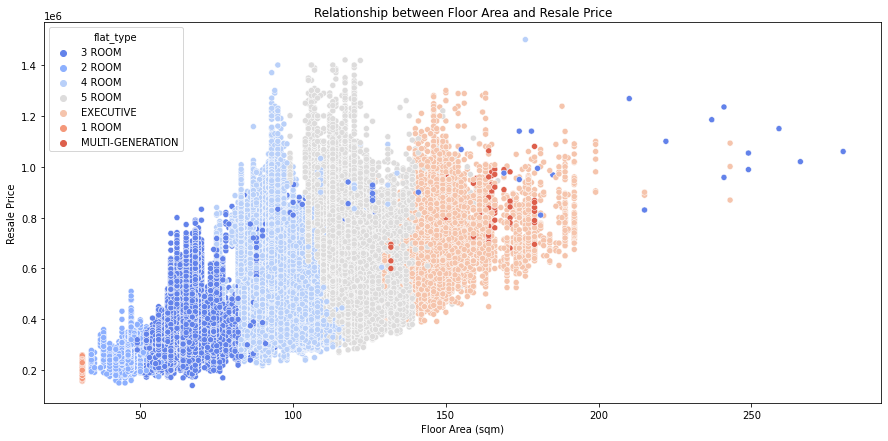

In [131]:
sns.scatterplot(data=df, x='floor_area_sqm', y='resale_price', hue='flat_type', palette='coolwarm')
plt.title('Relationship between Floor Area and Resale Price')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price')
plt.show()

This scatterplot provides a visual representation of the relationship between the floor area (in square meters) of flats and their resale prices. Each point on the plot represents an individual flat from our dataset. The scatterplot shows a clear upward trend, with points generally sloping upwards from left to right. This indicates that, in most cases, larger flats (greater floor area) have higher resale prices. In general, the floor area proves to be an essential consideration in real estate transactions and investment decisions in Singapore.

#### Interaction of Floor Area with Remaining Lease

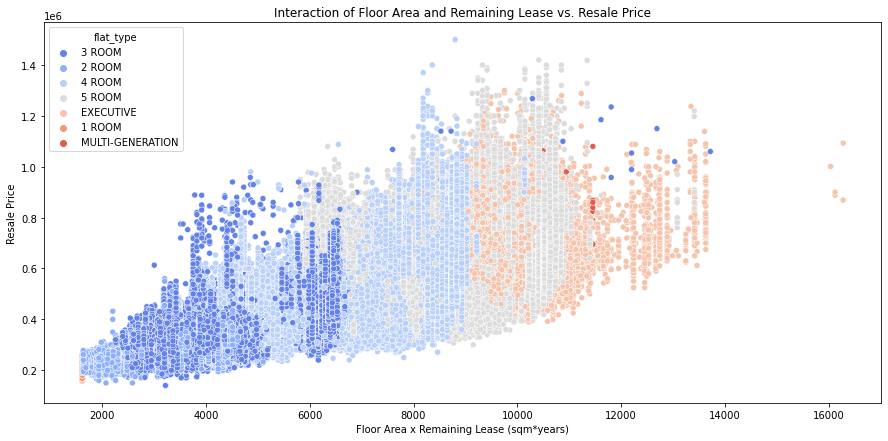

In [132]:
sns.scatterplot(x='floor_area_lease', y='resale_price', data=df, hue='flat_type', palette='coolwarm')
plt.title('Interaction of Floor Area and Remaining Lease vs. Resale Price')
plt.xlabel('Floor Area x Remaining Lease (sqm*years)')
plt.ylabel('Resale Price')
plt.show()

In [133]:
df['floor_area_lease'].corr(df['resale_price'])

0.6636524031524929

The similarity between the scatterplot of the interaction between floor area and remaining lease (`floor_area_lease`) and the scatterplot of floor area alone (`floor_area_sqm`) suggests that both floor area and remaining lease duration independently contribute to higher resale prices. This scatterplot exhibits a clear upward trend, suggesting that, on average, as the combined effect of floor area and remaining lease duration increases, resale prices tend to increase as well. Buyers appear to be willing to pay more for properties with larger floor areas and longer remaining lease durations. This could be due to increased living space and the potential for longer-term ownership and rental income. Overall, this trend may reflect the preferences and demands of buyers in the real estate market. Buyers may be seeking properties that offer more space and longer-term investment potential. 

To quantify the strength of this relationship, the correlation coefficient of 0.6637 further suggests a moderately strong positive linear relationship between `floor_area_lease` and `resale_price`. This confirms the positive direction of the relationship. We can interpret this correlation as the combined effect of floor area and remaining lease duration increases by one unit, `resale_price` is expected to increase by approximately 0.6637 units.

#### Relationship between Flat Types and Floor Area

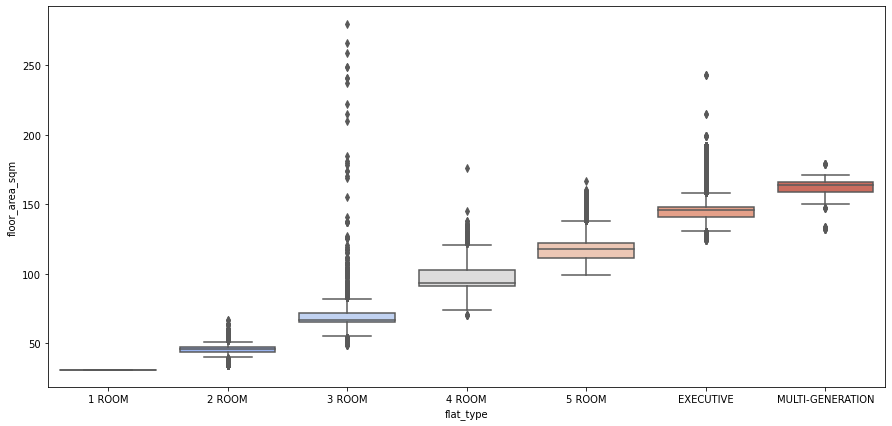

In [134]:
# manually order box plot [18]

sns.boxplot(data=df, x='flat_type', y='floor_area_sqm', palette='coolwarm',
           order=['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION'])

plt.show()

The "1 Room" flat type has no visible box or whiskers because it has a constant floor area for all units. This indicates that there is no variability in floor area for this category. The floor area increases as we move from "2 Room" to "Multi-Generation" flats, with each category having a higher average floor area than the previous one. This is consistent with the general expectation that larger flat types offer more space. "Multi-Generation" flats have the largest average floor area, indicating that they are the most spacious among the flat types considered.

There is some variability in floor area within each flat type, as indicated by the standard deviation. "2 Room" flats have a relatively small range of floor areas with few outliers. "3 Room" flats have a wider range of floor areas, with some units having significantly larger sizes. This can be reflected in the presence of outliers present from the difference between the maximum and 75th percentile values. Similarly, other than being larger on average, "Executive" flats have extended outliers indicating some very spacious units. 

#### Relationship between Flat Types and Resale Prices

In [135]:
# summary statistics for each quarter
quarterly_stats = df.groupby('flat_type')['resale_price'].describe().reset_index()
quarterly_stats.columns = ['flat_type', 'Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']
quarterly_stats['flat_type'] = ['1 room', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']
quarterly_stats.set_index('flat_type', inplace=True)
print(quarterly_stats)

                     Count           Mean            Std       Min       25%  \
flat_type                                                                      
1 room               114.0  210203.122807   25423.870892  157000.0  190000.0   
2 ROOM              3441.0  261939.638768   44790.787029  150000.0  230000.0   
3 ROOM             62168.0  339936.094161   77278.634074  140000.0  290000.0   
4 ROOM            101029.0  470411.516143  123520.946819  218000.0  388000.0   
5 ROOM             60074.0  564611.343601  145117.160480  270000.0  460000.0   
EXECUTIVE          19006.0  662972.706345  124860.043910  390000.0  572000.0   
MULTI-GENERATION      99.0  809119.474747  100251.650305  600000.0  730000.0   

                       50%       75%        Max  
flat_type                                        
1 room            211500.0  232875.0   260000.0  
2 ROOM            256888.0  285000.0   560000.0  
3 ROOM            328000.0  370000.0  1268000.0  
4 ROOM            440000.0  5

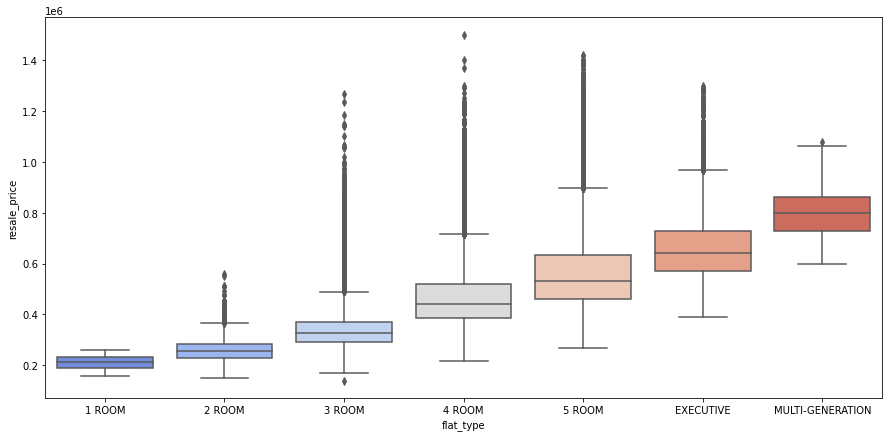

In [136]:
sns.boxplot(data=df, x='flat_type', y='resale_price', palette='coolwarm',
           order=['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION'])

plt.show()

The box plot shows the distribution of resale prices for different flat types. Different types of flats have significantly different average resale prices. Multi-Generation flats have the highest average resale price, while 1-Room flats have the lowest. There is an incremental increase in average resale prices as we move from smaller flat types (1 Room and 2 Room) to larger ones (4 Room, 5 Room, Executive, and Multi-Generation). This is expected because larger flats typically have more space and amenities, which tend to command higher prices. Outliers exist in each flat type, as indicated by the maximum values, suggesting that there are some exceptionally high-priced units in various categories.

### Storey and Lease

#### Impact of Storey Level on Resale Prices

In [137]:
df['storey_range'].corr(df['resale_price'])

0.3590675421765727

The moderate positive correlation coefficient indicates that as the floor level of the HDB flat increases, the resale price tends to increase as well. As a whole, properties on higher floors generally have higher resale prices. Although the correlation is not very strong, it is suggestive of a linear relationship. In this case, the correlation may provide valuable market insights. For example, in some real estate markets, properties on higher floors may have better views, more natural light, and quieter surroundings, which can justify higher prices. 

#### Relationship between Floor Level and Remaining Lease vs. Resale Prices

In [138]:
df['storey_lease'].corr(df['resale_price'])

0.41492816861326964

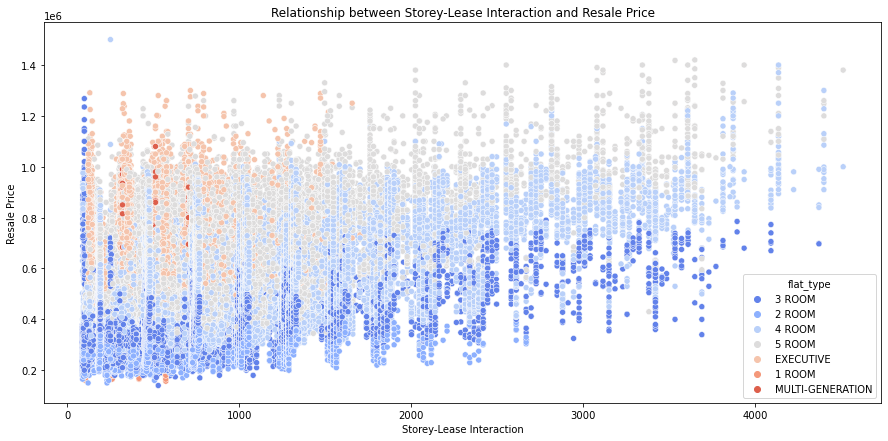

In [139]:
sns.scatterplot(x='storey_lease', y='resale_price', data=df, hue='flat_type', palette='coolwarm')
plt.title('Relationship between Storey-Lease Interaction and Resale Price')
plt.xlabel('Storey-Lease Interaction')
plt.ylabel('Resale Price')
plt.show()

The positive correlation coefficient of 0.4149 indicates that as the combination of floor level and remaining lease increases, the resale price tends to increase as well. Properties on higher floors with longer remaining leases generally have higher resale prices. The slight upward trend in the scatterplot suggests a linear relationship between `storey_lease` and `resale_price`, meaning that the increase in resale price tends to be relatively steady as we move up to higher floors with longer remaining leases. This is an indication that buyers are willing to pay more for properties with higher floors and longer remaining leases due to factors like better views and longer ownership periods.

#### Remaining Lease Analysis

In [140]:
df['remaining_lease'].corr(df['resale_price'])

0.38177432551462387

There exists a positive linear relationship between the remaining lease and resale prices. As the remaining lease duration increases, resale prices tend to increase as well. The positive correlation between remaining lease and resale prices suggests that properties with longer remaining leases tend to command higher resale prices. While it is not a very strong correlation, it still signifies a meaningful association between the two variables. This information can be valuable for potential buyers in the HDB resale market. Buyers may need to factor in the remaining lease duration when making purchasing decisions. Properties with longer remaining leases may be more appealing to some buyers due to the potential for longer-term occupancy and future resale value. The correlation also suggests that the real estate market may place value on properties with longer remaining leases, which could be influenced by factors like scarcity of such properties and perceived long-term investment potential.

#### Correlation Analyses between Remaining Lease and Other Features over Different Time Periods

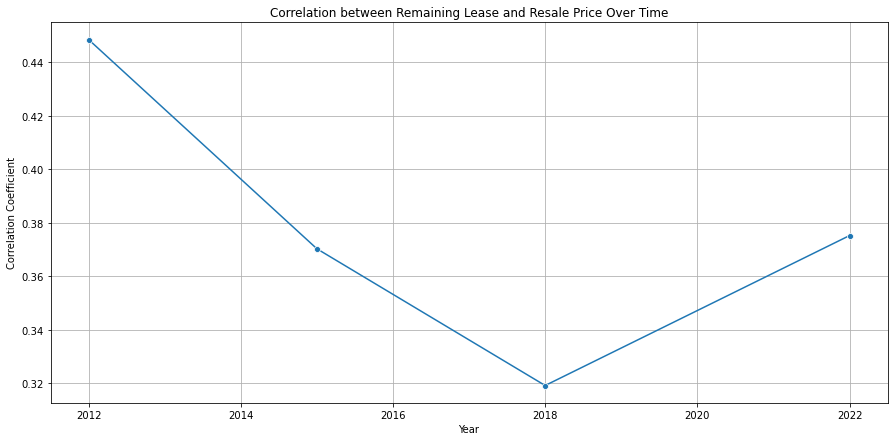

In [141]:
time_periods = [2012, 2015, 2018, 2022] 

correlation_results = []
for year in time_periods:
    subset = df[df['year'] == year]
    correlation = subset['remaining_lease'].corr(subset['resale_price'])
    correlation_results.append({'year': year, 'correlation': correlation})
correlation_df = pd.DataFrame(correlation_results)

sns.lineplot(x='year', y='correlation', data=correlation_df, marker='o')
plt.title('Correlation between Remaining Lease and Resale Price Over Time')
plt.xlabel('Year')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.show()

In each of the specified years, there is a positive correlation between remaining lease and resale price. This finding suggests that properties with longer remaining lease durations tend to have higher resale prices. While there is a positive correlation in each year, the strength of the correlation varies over time. In 2012, the correlation coefficient is relatively strong, indicating a more pronounced relationship between remaining lease and resale price. However, the correlation coefficients started declining over the years till 2018. Since 2018, it has been increasing linearly again. The positive correlation suggests that properties with longer remaining lease periods are generally more attractive to buyers and may command higher prices. This could be due to the perceived value and security associated with longer lease durations.

#### Differences in Price Trends for Older vs Newer Properties

In [142]:
# define the criteria for older and newer properties (e.g., lease commence year)
# separate the data into older and newer properties

cutoff_year = 2000

older_properties = df[df['lease_commence_date'] < cutoff_year]
older_prices = older_properties.groupby('year')['resale_price'].mean()

newer_properties = df[df['lease_commence_date'] >= cutoff_year]
newer_prices = newer_properties.groupby('year')['resale_price'].mean()

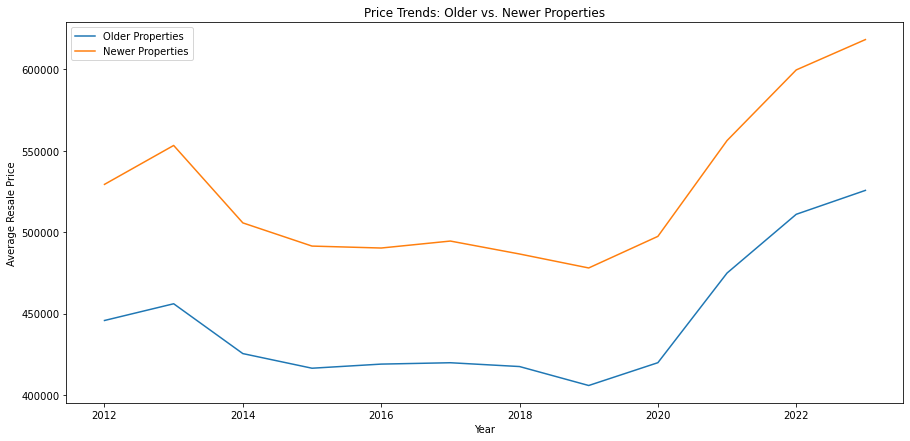

In [143]:
sns.lineplot(x=older_prices.index, y=older_prices.values, label='Older Properties')
sns.lineplot(x=newer_prices.index, y=newer_prices.values, label='Newer Properties')
plt.title('Price Trends: Older vs. Newer Properties')
plt.xlabel('Year')
plt.ylabel('Average Resale Price')
plt.legend()
plt.show()

The plot shows the trend in average resale prices for older properties (constructed before 2000) and newer properties (constructed in or after 2000). Before the year 2020, older properties generally had lower average resale prices compared to newer properties. This suggests that newer properties were commanding higher prices in the resale market, possibly due to factors like modern amenities, better condition, and remaining lease duration. Starting from around 2020, there is a noticeable convergence in the average resale prices of older and newer properties. This convergence could be attributed to various market dynamics. It might indicate increased demand for older properties, possibly due to factors like their relatively lower prices or unique attributes. Conversely, newer properties may have seen some stabilization or slower price growth. Despite the price dynamics of older properties catching up to newer properties in recent years, the years 2022 and 2023 show significant increases in average resale prices for both older and newer properties in general.

### Transaction Volume

In [144]:
transactions_2019_onwards = df[df['year'] >= 2019]
transaction_counts = transactions_2019_onwards['town'].value_counts().reset_index()
transaction_counts.columns = ['town', 'transaction_count']
transaction_counts = transaction_counts.sort_values(by='transaction_count', ascending=False)

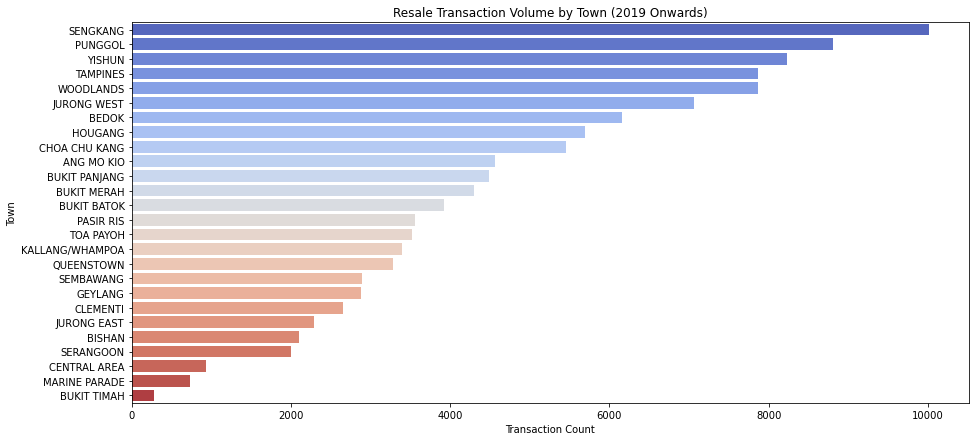

In [145]:
sns.barplot(x='transaction_count', y='town', data=transaction_counts, orient='h', palette='coolwarm')
plt.title('Resale Transaction Volume by Town (2019 Onwards)')
plt.xlabel('Transaction Count')
plt.ylabel('Town')
plt.show()

In general, transaction volumes can indicate the balance between housing supply and demand in each town. High transaction volumes might suggest a competitive market with sufficient demand, while low volumes may indicate oversupply or less demand. By examining the transaction counts for different towns, we can compare and contrast the market activity levels. Towns with higher transaction counts are considered to have higher market activity levels, while towns with lower counts have lower activity levels.

Our barplot ranks towns based on their transaction counts, with towns having the highest counts at the top and towns with lower counts further down the list. This ranking allows for a clear distinction between towns with varying levels of market activity. From the provided data on transaction volume in each town from the last five years, towns with the highest transaction volumes are Sengkang, Punggol, Yishun, Tampines, and Woodlands. These towns consistently have a high number of resale transactions, indicating strong market activity. This may be due to factors such as newer developments, more available housing, and potentially lower property prices compared to central areas. An increase in transaction volume in specific towns may indicate growing demand or attractive investment opportunities in those areas. On the other hand, Bukit Timah and Marine Parade have relatively lower transaction volumes and activity levels. This could be attributed to the limited availability of properties in these areas and potentially higher property prices.

### Correlation Analysis

Correlation analysis provide insights into which features are strongly related to our target variable (dependent variable) and each other. We can use the correlation coefficient to identify which features have a strong linear relationship with the target variable. Features with high positive or negative correlations are more likely to be important predictors.

In [146]:
corr_df = df[[
    'month', 'storey_range', 'floor_area_sqm', 'lease_commence_date', 'resale_price', 'remaining_lease', 'sch_dist',
    'sch_counts', 'mrt_dist', 'mrt_counts', 'year', 'quarter', 'year_remaining_lease', 'price_per_sqm', 'floor_area_lease',
    'storey_lease', 'sch_interaction', 'mrt_interaction'
]].copy()

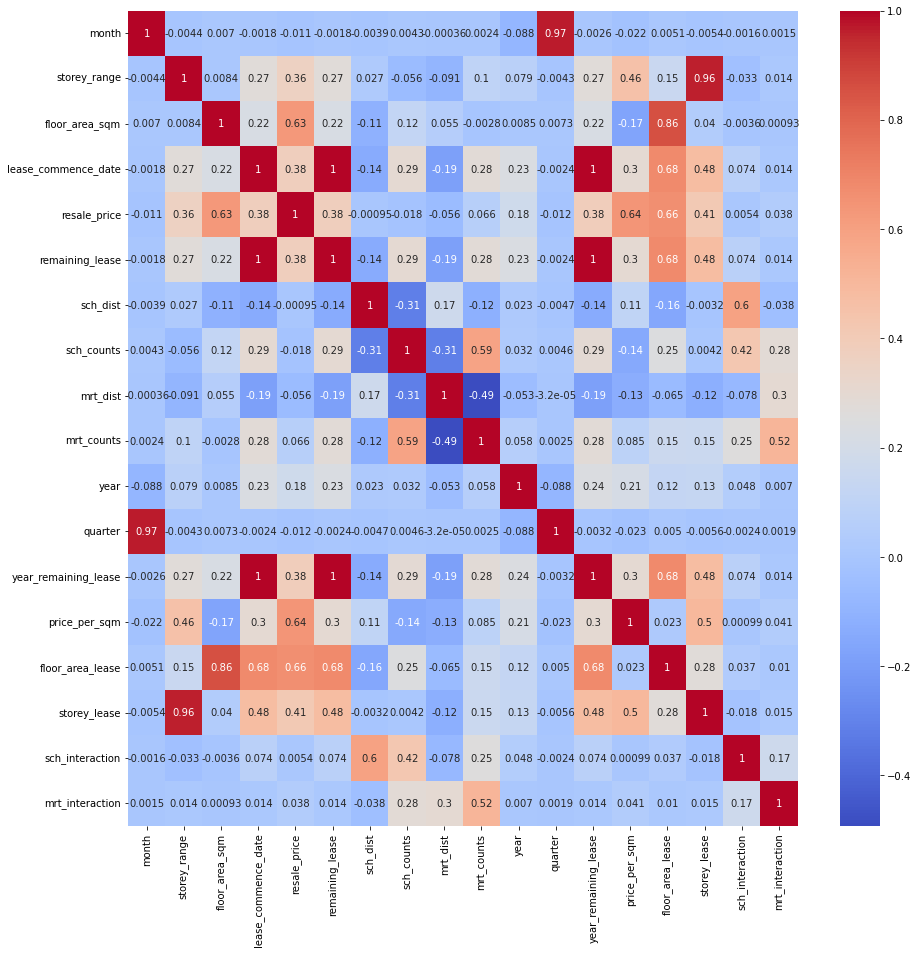

In [147]:
plt.figure(figsize=(15, 15)) 
corr_matrix = corr_df.corr()
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, cmap='coolwarm', annot=True)

plt.show()

The correlation matrix presented as a heatmap above highlights the correlation coefficients between numerical features in our current dataset. Our target variable `resale_price` has a strong positive correlation with:
- `floor_area_sqm` (0.63): This indicates that as the floor area of a flat increases, the resale price tends to increase as well, which is expected. 
- `price_per_sqm` (0.64): Higher price per square meter is correlated with higher resale prices.
- `year_remaining_lease` (0.38): Flats with a longer remaining lease tend to have higher resale prices.
- `storey_range` (0.41): There is a moderate positive correlation with the storey range, indicating that higher storey flats may have higher resale prices.

On the contrary, features such as `month`, `sch_dist`, `sch_counts`, `mrt_dist`, and `mrt_counts` prove to have weak or negligible correlations with resale price. In other words, they do not appear to be strongly linearly related to resale price. There are also no feature with a strong negative correlations with resale price. This suggests that none of the features have a strong negative linear relationship with resale price.

However, there are high positive correlations between `lease_commence_date`, `remaining_lease`, and `year_remaining_lease`. This is expected since they are related to the lease duration. This reminds us to be cautious about multicollinearity when using these features in our deep learning regression models later. Likewise, `quarter` and `month` have a strong positive correlation (0.97) because they are closely related. This high correlation is expected.

Lastly, it is notable that features like `sch_interaction` and `mrt_interaction` have some moderate positive correlations with other variables. These interactions may be useful in modeling, capturing combined effects.

### Feature Selection and Data Reduction

Feature selection and data reduction are crucial steps in preparing our data for deep learning regression models. Feature selection involves identifying and selecting the most relevant and informative features from the dataset while discarding irrelevant or redundant ones. This process helps simplify our model, reduce overfitting, and improve its interpretability. Data reduction is the process of reducing the volume but preserving meaningful information within a dataset. Techniques such as removing unnecessary data improves the model's efficiency and performance. By reducing noise and irrelevant information, data reduction simplifies the learning process for the neural network, making it faster to train and potentially enhancing its ability to generalize and make accurate predictions.

Based on the correlation coefficients of our correlation analysis, we select the most relevant features with the highest positive or negative correlations. These features are likely to have a stronger impact on our model. Fatures that have very high correlations (close to 1.0) with other features will be removed to prevent introducing of multicollinearity into our model. This may make it difficult to interpret and potentially leading to unstable coefficient estimates. Additionally, we will also remove features with very low or close to zero correlations with the target variable (`resale_price`). These features can be considered theoretically unimportant, in which it may not provide much predictive power. We will also take domain knowledge into consideration, retaining features believed to be inherently important for predicting resale prices. 

In [148]:
df.drop(['lease_commence_date', 'year_remaining_lease', 'month', 'floor_area_lease', 'storey_lease',
         'sch_counts', 'sch_dist', 'mrt_counts', 'mrt_dist'], axis=1, inplace=True)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245931 entries, 0 to 245930
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   address          245931 non-null  object 
 1   town             245931 non-null  object 
 2   flat_type        245931 non-null  object 
 3   storey_range     245931 non-null  int64  
 4   floor_area_sqm   245931 non-null  float64
 5   flat_model       245931 non-null  object 
 6   resale_price     245931 non-null  float64
 7   remaining_lease  245931 non-null  int64  
 8   school           245931 non-null  object 
 9   mrt              245931 non-null  object 
 10  year             245931 non-null  int64  
 11  quarter          245931 non-null  int64  
 12  price_per_sqm    245931 non-null  float64
 13  sch_interaction  245931 non-null  float64
 14  mrt_interaction  245931 non-null  float64
dtypes: float64(5), int64(4), object(6)
memory usage: 38.1+ MB


We further refine our dataset by removing columns that are unlikely to be directly useful for our predictive modeling. Specifically, we drop the column representing the specific address of each property. Likewise, `school` and `mrt` will also be excluded as information about schools and MRT stations has already been incorporated into the `sch_interaction` and `mrt_interaction` columns.

Features like `town`, `sch_interaction` and `mrt_interaction` capture location and accessibility information more effectively. These interaction scores provide a summarized representation of the proximity and counts of educational facilities and public transport accessibility, making them more suitable features for our predictive model.

In [150]:
df.drop(['address', 'school', 'mrt'], axis=1, inplace=True)

In [151]:
df.head()

,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,remaining_lease,year,quarter,price_per_sqm,sch_interaction,mrt_interaction
0,ANG MO KIO,3 ROOM,8,60.0,Improved,255000.0,63,2015,1,4250.000000,2.94,1.7
1,ANG MO KIO,3 ROOM,11,60.0,Improved,275000.0,63,2015,4,4583.333333,2.94,1.7
2,ANG MO KIO,3 ROOM,5,69.0,Improved,310000.0,63,2016,2,4492.753623,2.94,1.7
3,ANG MO KIO,2 ROOM,8,45.0,Improved,253000.0,63,2016,2,5622.222222,2.94,1.7
4,ANG MO KIO,3 ROOM,5,61.0,Improved,290000.0,63,2016,4,4754.098361,2.94,1.7


## Baseline Model

### Feedforward Neural Network (FNN)

A Feedforward Neural Network (FNN) is a type of artificial neural network commonly used in machine learning and deep learning. FNN are designed for supervised learning tasks, including but not limited to regression, where the data to be learned is not sequential <sup>[19]</sup>. These networks are characterized by their multiple layers of interconnected artificial neurons, comprising an input layer, one or more hidden layers, and an output layer. In a feedforward model, data flows in one direction, from the input layer through the hidden layers to the output layer <sup>[20]</sup>.

In the context of predicting resale flat prices, our baseline model utilizes FNN to capture intricate and non-linear relationships among input features, such as floor area, location, accessibility, and remaining lease, and the target variable, which is the resale price. By training the FNN on historical resale data, the network can effectively learn to recognize complex patterns and correlations within the real estate market. Moreover, FNN are known for their adaptability and continuous improvement through training, making them a valuable tool for modeling dynamic markets.

In [152]:
df_copy = df.copy()

We have created a duplicate of our original dataset and named it `df_copy`. This duplicate dataset allows us to perform various data manipulations and modeling experiments without altering the integrity of our original data. It acts as a safeguard, ensuring that our original dataset remains intact and unchanged, which is crucial for maintaining data consistency and facilitating reproducible analyses.

### Handling Categorical Variables

One hot encoding is a technique used to represent categorical variables as numerical values, which can be easily understood by mathematical models like deep learning regression models. Categorical variables are variables that represent categories, such as `town`, `flat_type`, and `flat_model` in our dataset, rather than continuous numerical values. The technique is especially useful when dealing with categorical variables without inherent order or hierarchy <sup>[21]</sup>. Additionally, each category is represented as a distinct and independent feature.

For each unique category within a categorical variable, a new binary (0 or 1) column is created. A 1 is assigned if the original data point belongs to the corresponding category, and a 0 is assigned if it does not. This transformation allows the model to treat each category independently, avoiding the assumption of a meaningful numerical relationship among them. We are performing one-hot encoding to prevent our model from misinterpreting the categorical data as ordinal or continuous.

**Town Column**

In [153]:
df_copy['town'].value_counts()

SENGKANG           18854
WOODLANDS          18131
JURONG WEST        17551
TAMPINES           16991
YISHUN             16491
PUNGGOL            14613
BEDOK              14292
HOUGANG            12261
CHOA CHU KANG      10990
ANG MO KIO         10894
BUKIT MERAH         9489
BUKIT BATOK         9127
BUKIT PANJANG       9049
TOA PAYOH           7805
PASIR RIS           7756
KALLANG/WHAMPOA     7378
QUEENSTOWN          6859
GEYLANG             6431
SEMBAWANG           6230
CLEMENTI            5812
JURONG EAST         5288
SERANGOON           4849
BISHAN              4565
CENTRAL AREA        2016
MARINE PARADE       1620
BUKIT TIMAH          589
Name: town, dtype: int64

The `town` column contains the names of different towns where resale flats are located. These town names are categorical and do not have a natural order or numerical relationship.

In [154]:
town_d = pd.get_dummies(data=df_copy['town'], drop_first=True)

In [155]:
df_copy = pd.concat([df_copy.drop('town', axis=1), town_d], axis=1)

By applying one-hot encoding, we created binary columns for each town. Each binary column represents a specific town, and it is assigned a value of 1 if the resale flat is located in that town and 0 if it is not. This transformation allows our model to consider the impact of each town individually when predicting resale prices. We do not assume any numerical relationships between the towns.

**Flat Type Column**

In [156]:
df_copy['flat_type'].value_counts()

4 ROOM              101029
3 ROOM               62168
5 ROOM               60074
EXECUTIVE            19006
2 ROOM                3441
1 ROOM                 114
MULTI-GENERATION        99
Name: flat_type, dtype: int64

The `flat_type` column represents various categories of flat types. We will apply one-hot encoding to consider the impact of each flat type individually when predicting resale prices. In this way, our model effectively capture the influence of flat type as a categorical feature in the prediction process. 

In [157]:
flat_type_d = pd.get_dummies(data=df_copy['flat_type'], drop_first=True)

In [158]:
df_copy = pd.concat([df_copy.drop('flat_type', axis=1), flat_type_d], axis=1)

**Flat Model Column**

In [159]:
df_copy['flat_model'].value_counts()

Model A                   78808
Improved                  62124
New Generation            35523
Premium Apartment         25976
Simplified                11048
Apartment                  9585
Standard                   7695
Maisonette                 7031
Model A2                   3166
DBSS                       3044
Model A-Maisonette          434
Type S1                     415
Adjoined flat               411
Type S2                     207
Terrace                     147
Premium Apartment Loft      100
Multi Generation             99
2-room                       53
Improved-Maisonette          32
Premium Maisonette           20
3Gen                         13
Name: flat_model, dtype: int64

The `flat_model` column provides information about the architectural or structural characteristics of the residential flats in our dataset. The flat models can provide insights into the diversity of housing options within the dataset. Different flat models may appeal to different demographic groups or offer varying amenities and layouts. Since these characteristics are categorical, we apply one-hot encoding to account for the influence of each architectural style independently.

In [160]:
flat_model_d = pd.get_dummies(data=df_copy['flat_model'], drop_first=True)

In [161]:
df_copy = pd.concat([df_copy.drop('flat_model', axis=1), flat_model_d], axis=1)

In [162]:
df_copy.head()

,storey_range,floor_area_sqm,resale_price,remaining_lease,year,quarter,price_per_sqm,sch_interaction,mrt_interaction,BEDOK,...,Multi Generation,New Generation,Premium Apartment,Premium Apartment Loft,Premium Maisonette,Simplified,Standard,Terrace,Type S1,Type S2
0,8,60.0,255000.0,63,2015,1,4250.000000,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0
1,11,60.0,275000.0,63,2015,4,4583.333333,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0
2,5,69.0,310000.0,63,2016,2,4492.753623,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0
3,8,45.0,253000.0,63,2016,2,5622.222222,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0
4,5,61.0,290000.0,63,2016,4,4754.098361,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0


### Train-Test Split

In machine learning, it is crucial to evaluate how well our model performs on data it has not seen before. To do this, we divide our dataset into distinct training set and the testing set. The training set is the portion of the dataset (in this case, 80% of the data) that we use to teach our deep learning model <sup>[22]</sup>. The model learns patterns, relationships, and features from this data. The remaining portion of the dataset (20% of the data), also known as the testing set, is then used to evaluate its performance. This step is crucial because it helps us determine if our model has learned the underlying patterns and can generalize to make reliable predictions on flats it has not encountered before. We will use the testing set to assess how well our model can make accurate predictions on new, unseen data.

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
X = df_copy.drop('resale_price', axis=1).values
y = df_copy['resale_price'].values

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

### Normalising the Data

Normalization is a technique that helps bring all features to a common scale, without distorting differences in the ranges of values or losing information <sup>[23]</sup>. It enhances the performance and convergence of deep learning models, where each feature contributes proportionally to the learning process. We will use the Min-Max Scaler to scale and transform  our numerical features <sup>[24]</sup>.

In [166]:
from sklearn.preprocessing import MinMaxScaler

In [167]:
scaler = MinMaxScaler()

In [168]:
X_train = scaler.fit_transform(X_train)

In [169]:
X_test = scaler.transform(X_test)

### Build and Train Model

In [170]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.constraints import max_norm

In building our neural network regression model, we will begin by defining the architecture of the neural network. We initialize a sequential model, which is a series of neural layers, one after the other. The data flows sequentially from input to output. Within the model, we add an input layer, a hidden layer and an outer layer. The input layer receives the input data. The hidden layers perform non-linear transformations of the inputs entered into the network, allowing the model to learn complex patterns and relationships within the data <sup>[24][25]</sup>. The outer layer, with a single neuron and a linear activation function, will produce continuous numerical predictions. Additionally, we will incorporate dropout layers to prevent overfitting, which can occur when the model excessively adapts to the training data and performs poorly on new, unseen data. 

In [171]:
# initialise a sequential model
model = Sequential()

# add input layer and first hidden layer
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.2))

# add hidden layers
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(rate=0.2))

# add output layer
model.add(Dense(units=1, activation='linear'))

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

In [172]:
model.fit(
    x=X_train, y=y_train, 
    epochs=25,
    batch_size=256,
    validation_data=(X_test, y_test)
)

Epoch 1/25
769/769 [==============================] - 6s 6ms/step - loss: 241677991936.0000 - mean_absolute_error: 466436.2812 - val_loss: 225589362688.0000 - val_mean_absolute_error: 449036.8750
Epoch 2/25
769/769 [==============================] - 4s 5ms/step - loss: 180154580992.0000 - mean_absolute_error: 394416.0000 - val_loss: 124940566528.0000 - val_mean_absolute_error: 320337.2188
Epoch 3/25
769/769 [==============================] - 4s 5ms/step - loss: 74970087424.0000 - mean_absolute_error: 226092.6406 - val_loss: 35950546944.0000 - val_mean_absolute_error: 139231.0625
Epoch 4/25
769/769 [==============================] - 4s 5ms/step - loss: 26901395456.0000 - mean_absolute_error: 120440.5234 - val_loss: 18013618176.0000 - val_mean_absolute_error: 98163.4609
Epoch 5/25
769/769 [==============================] - 4s 5ms/step - loss: 20318683136.0000 - mean_absolute_error: 107941.2734 - val_loss: 14937835520.0000 - val_mean_absolute_error: 90809.6562
Epoch 6/25
769/769 [========

In [173]:
# store information about the training process (loss and accuracy)

losses = pd.DataFrame(model.history.history)

In [176]:
y_pred = (model.predict(x=X_test))

1538/1538 [==============================] - 3s 2ms/step


At a glance, we can observe that the loss (mean squared error) and mean absolute error (MAE) are provided. These metrics indicate how well the model is fitting the training data. Both of them started at a very high value and progressively decreased as the epochs progress. This is a positive sign, indicating that the model is learning from the data.

In addition to training metrics, we have validation loss and validation MAE for each epoch. These metrics measure how well the model performs on data it has not seen during training (the validation data). They followed a similar trend, generalizing well to unseen data.

### Evaluate Model Performance

We will use key evaluation metrics such as mean squared error (MSE), mean absolute error (MAE), root mean squared error (RMSE), and R-squared (R²) to evaluate the performance of our baseline model. These metrics help measure the accuracy and goodness-of-fit of our regression model. By comparing the predicted and actual values, we can assess how well our model performs in predicting resale flat prices. 

As an overview, MSE and RMSE focus on the accuracy of individual predictions, penalizing larger errors more <sup>[25]</sup>. MAE measures the average absolute difference between predicted and actual values. R-squared (R²) assesses how well the model fits the data by quantifying the proportion of variance explained <sup>[26]</sup>. It provides an overall measure of model goodness-of-fit.

In [174]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

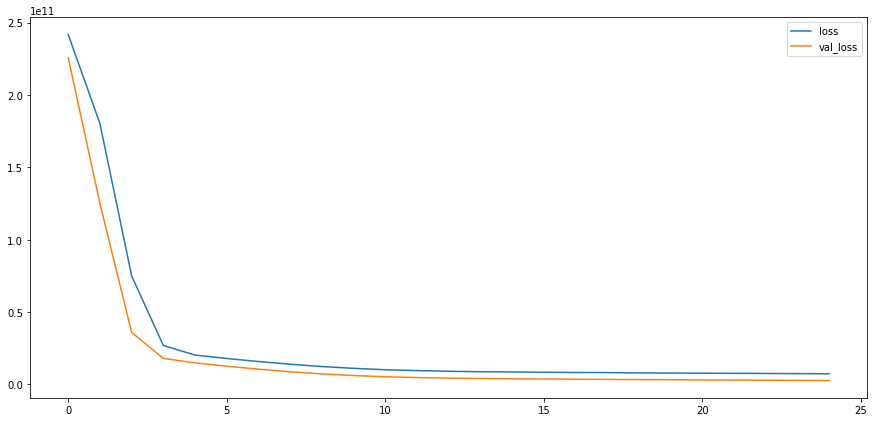

In [175]:
losses[['loss', 'val_loss']].plot()
plt.show()

Both the training and validation loss decrease consistently as the number of epochs increases, indicating that the model is learning and improving its ability to predict resale flat prices over time. Based on the plot, the training loss and validation loss appear to be converging as the epochs progress. This suggests that the model is converging to a point where it has learned the underlying patterns in the data. The decreasing trend indicates that the model is improving its fit to the data <sup>[27]</sup>. It is worth noting that the validation loss is consistently lower than the training loss. Based on my research, it may be attributed to the utilization of dropout layers in our neural network <sup>[28]</sup>. Dropout layers help regularize the model by reducing overfitting and adding noise to the training process. This regularization improves the model's generalization power and can result in a lower validation loss.

In [177]:
pred_df = pd.DataFrame(data=y_test, columns=['y_test'])
pred_df['y_pred'] = y_pred
pred_df['error'] = pred_df['y_test'] - pred_df['y_pred']

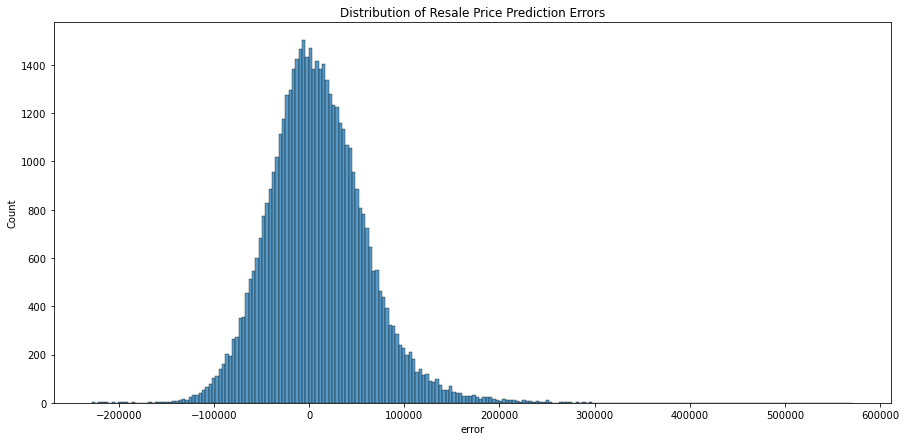

In [178]:
sns.histplot(pred_df['error'])
plt.title('Distribution of Resale Price Prediction Errors')
plt.show()

The histogram above shows the distribution of errors in our model's predictions. Specifically, it visualizes how the differences between the actual resale prices (`y_test`) and the predicted prices (`y_pred`) are distributed across the test dataset. Based on the plot, the histogram is centered around zero. This is indicative that on average, our model's predictions are quite accurate because the errors are close to zero. The symmetric, bell-shaped distribution suggests that the model's errors are normally distributed, which is a desirable property for a regression model. It means the model is equally likely to overestimate and underestimate resale prices, with errors close to zero being the most common. The range on the x-axis, from -150,000 to 150,000, represents the error or the difference between the predicted resale prices (`y_pred`) and the actual resale prices (`y_test`). This range shows that most errors fall within this interval, which means that the majority of our predictions are within approximately ±$150,000 of the actual prices. The width of the histogram is quite wide, indicating that that prediction errors vary across a broader range of values.

In [179]:
loss, mae = model.evaluate(X_test, y_test)

1538/1538 [==============================] - 3s 2ms/step - loss: 2754848000.0000 - mean_absolute_error: 39996.3359


The mean absolute error (MAE) measures how close our model's predictions are from the actual resale prices. The mean absolute error on the test dataset is approximately 39,996.34. This suggests that the model can make reasonably accurate predictions of resale flat prices, with an average error of approximately \\$39,996.34. In general, lower MAE values are desirable because they represent smaller prediction errors. While there is room for improvement, these results provide a baseline for our model's performance.

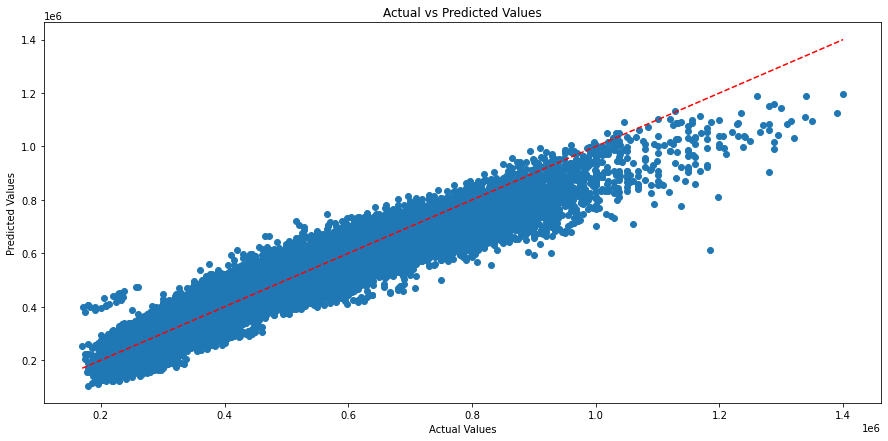

In [180]:
# plotting the actual vs predicted values
plt.scatter(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.show()

The scatter plot above compares the actual resale prices (x-axis) to the predicted resale prices (y-axis) generated by our model. Each point on the plot represents an individual resale flat from the test dataset. The diagonal red dashed line serves as a reference for perfect predictions. The majority of data points are clustered around the diagonal line. This means that the model's predictions are relatively close to the actual resale prices. This alignment with the diagonal line suggests that the model's predictions are accurate for a significant portion of the data. However, there are also points that deviate from the diagonal line, both above and below. These deviations represent prediction errors where the model overestimates or underestimates resale prices. The points are distributed fairly symmetrically around the diagonal line, indicating that the model's errors are roughly balanced between overestimation and underestimation.

#### Mean Squared Error (MSE)

MSE measures the amount of error in a statistical model, and is useful for ensuring that our trained model has no outlier predictions with huge errors. In general, a lower MSE indicates better model performance. It means that the model's predictions are closer to the actual values on average <sup>[29]</sup>.

In [181]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 2754847248.06463


The Mean Squared Error (MSE) of approximately 2,754,847,248.06 measures how closely our deep learning model's predictions align with the actual resale prices of housing units. In practical terms, while our model provides reasonably accurate predictions, there is room for improvement to form closer alignment between our predictions and the actual resale prices.

#### Root Mean Squared Error (RMSE)

The root mean squared error (`rmse`) is a widely used metric for evaluating the performance of regression models. It calculates the average deviation between the predicted values and the actual values <sup>[30]</sup>. A lower RMSE signifies better accuracy, indicating a closer match between the model's predictions and the true values.

In [182]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 52486.63875754124


The Root Mean Squared Error (RMSE) of approximately 52,486.64 provides an easily interpretable measure of the average prediction error made by our deep learning model when estimating resale housing prices. Essentially, it quantifies the typical gap between the predicted prices and the actual prices, with a lower RMSE indicating that our model's predictions are, on average, closer to the true prices. In this context, an RMSE of 52,486.64 suggests that our model's price predictions typically deviate from the actual prices by around $52,486.64. Though reasonably close to the actual prices, our model's predictions still have room for improvement. Further model refinement or the incorporation of additional features may help improve prediction accuracy.

#### R-squared (R²)

R-squared, also known as the coefficient of determination, measures the percentage of variance in the target variable (`y_test`) that is explained by the model <sup>[31]</sup>. It measures the strength of the relationship between our model and the dependent variable on a 0 to 1 scale, accessing how well the model captures the variation in the data. A higher R² indicates a better fit of the model to the data. An R² of 1 means that the model explains all the variance, while an R² of 0 means that the model does not explain any variance.

In [183]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.886571740121508


Upon analyzing our output, an R-squared value of (R²) approximately 0.887 indicates that our model accounts for about 88.7% of the variance in the resale prices. This is a strong R-squared value, suggesting that our model performs well in capturing and explaining the underlying patterns and trends in the data. It means that the majority of the variability in resale prices is effectively captured by our model, making it a highly reliable tool for estimating housing values.

As an overview, our baseline model shows promising results with reasonably accurate predictions, as indicated by the MAE and R-squared values. Our model is capable of providing transparent and precise property valuations. There is room for improvement, particularly in reducing prediction errors, as indicated by the MSE and RMSE values. We will further refine the model by stacking machine regression methods to improve prediction accuracy. 

## Hybrid Deep Learning Models

A hybrid deep learning model is an fusion approach that combines the power of traditional machine learning techniques with deep neural networks. By stacking these methods, we can generate a more robust and accurate predictive model. This combination allows us to capture complex patterns and relationships within the data, enhancing our ability to predict resale housing prices effectively.

### Gradient Boosting with FNN

Light Gradient Boosted Machine, or LightGBM for short, is a gradient boosting framework in machine learning. LightGBM is an open-source, distributed, high-performance implementation of gradient boosting that is specifically designed for speed and efficiency <sup>[32]</sup>. It is designed to handle large datasets and deliver fast training times while maintaining high prediction accuracy <sup>[33]</sup>.

According to my research, Light Gradient Boosted Machine (LightGBM) has a unique feature (`categorical_feature`) that handles categorical features directly without the need for one-hot encoding <sup>[34]</sup>. This approach saves memory and computation time while preventing overfitting. We will make a separate copy of our dataset, applying this feature-specific processing to categorical variables while keeping our original dataset intact. This approach allows us to efficiently utilize LightGBM's capabilities for improved predictive modeling while preserving the integrity of our data for further analysis or use in other models.

In [184]:
import lightgbm as lgb

### Data Preprocessing

In [286]:
df_lgb = df.copy()

In [287]:
df_lgb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245931 entries, 0 to 245930
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   town             245931 non-null  object 
 1   flat_type        245931 non-null  object 
 2   storey_range     245931 non-null  int64  
 3   floor_area_sqm   245931 non-null  float64
 4   flat_model       245931 non-null  object 
 5   resale_price     245931 non-null  float64
 6   remaining_lease  245931 non-null  int64  
 7   year             245931 non-null  int64  
 8   quarter          245931 non-null  int64  
 9   price_per_sqm    245931 non-null  float64
 10  sch_interaction  245931 non-null  float64
 11  mrt_interaction  245931 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 32.5+ MB


In [288]:
categorical_columns = ['town', 'flat_type', 'flat_model']
for col in categorical_columns:
    df_lgb[col] = df_lgb[col].astype('category')

In [289]:
df_lgb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245931 entries, 0 to 245930
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   town             245931 non-null  category
 1   flat_type        245931 non-null  category
 2   storey_range     245931 non-null  int64   
 3   floor_area_sqm   245931 non-null  float64 
 4   flat_model       245931 non-null  category
 5   resale_price     245931 non-null  float64 
 6   remaining_lease  245931 non-null  int64   
 7   year             245931 non-null  int64   
 8   quarter          245931 non-null  int64   
 9   price_per_sqm    245931 non-null  float64 
 10  sch_interaction  245931 non-null  float64 
 11  mrt_interaction  245931 non-null  float64 
dtypes: category(3), float64(5), int64(4)
memory usage: 27.5 MB


By converting non-numerical columns into a categorical data type, we prepare them for efficient handling by our LightGBM model, which can work directly with categorical data without the need for additional encoding steps like one-hot encoding.

### Train-Test Split

In [290]:
X = df_lgb.drop('resale_price', axis=1)
y = df_lgb['resale_price']

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

In [292]:
# configure dataset to specify the categorical columns

train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_columns, free_raw_data=False)
test_data = lgb.Dataset(X_test, label=y_test, categorical_feature=categorical_columns, free_raw_data=False)

We prepared our data for training and testing by splitting it into appropriate subsets and configuring the dataset to handle categorical features efficiently.

### Build and Train Model

In [293]:
# set model parameters

params = {
    'objective': 'regression',
    'metric': 'mse',
    'boosting_type': 'gbdt',
    'num_leaves': 28,
    'learning_rate': 0.05,
    'feature_fraction': 0.8 # reduced to prevent overfitting
}

In [294]:
lgb_model = lgb.train(params, train_data, num_boost_round=100, valid_sets=[test_data])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014324 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1075
[LightGBM] [Info] Number of data points in the train set: 172151, number of used features: 11
[LightGBM] [Info] Start training from score 472342.757131


We defined a set of parameters for our LightGBM model before training the model using the specified parameters and our training data. LightGBM will optimize the model's parameters to minimize the MSE. During training, the model provided informative messages, such as enabling multi-threading for faster computation and details about the dataset's size and features used. The model is now capable of predicting resale housing prices based on the features we provide.

In [295]:
lgb_pred = lgb_model.predict(X_test)

### Evaluate Model Performance

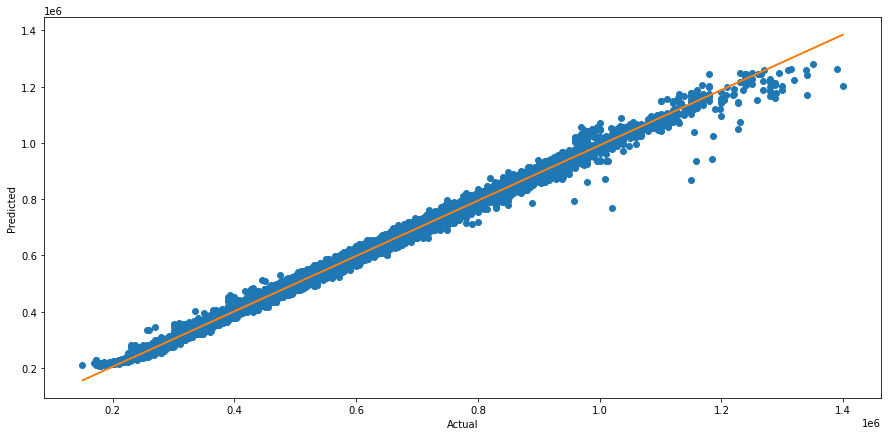

In [296]:
plt.plot(y_test, lgb_pred, 'o')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# obtain m (slope) and b (intercept) of linear regression line
m, b = np.polyfit(y_test, lgb_pred, 1)
plt.plot(y_test, m * y_test + b)

plt.show()

The scatter plot shows that data points are closely clustered together and form a straight line. This alignment indicates that our model's predictions are highly accurate, as they closely match the true prices. This also suggests that the model is consistent in predicting prices that are very close to the actual values. The regression line is positioned in the center of the data points. This highlights that our model neither overestimates nor underestimates the resale prices, providing balanced and highly accurate predictions.

In [297]:
mae = mean_absolute_error(y_test, lgb_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 5497.304378472426


In [298]:
mse = mean_squared_error(y_test, lgb_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 72971130.93199499


In [299]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 8542.314143836844


In [300]:
r2 = r2_score(y_test, lgb_pred)
print(f'R-squared: {r2}')

R-squared: 0.9969961352674557


On average, our model's predictions deviate from the actual resale prices by only about \\$5497.30 (based on MAE). This signifies a high level of accuracy. The MSE of approximately 72,971,130.93 quantifies the average squared prediction error. As compared to the MSE of our baseline model, this dramatic reduction signifies that the LightGBM model's predictions are closer to the actual prices and exhibits far smaller prediction errors overall. The RMSE of approximately 8,542.31 also proves that the LightGBM model deviate from the actual prices by a much smaller amount. The R-squared value of approximately 0.9969 indicates that our model accounts for about 99.69% of the variance in the resale prices, showcasing a remarkable ability to capture and explain the underlying patterns in the data. 

### Meta-Model

Meta-modeling is a technique used to improve predictive accuracy by combining the predictions of multiple base models, each of which may excel in different aspects of the prediction task, to create a more powerful and reliable final model <sup>[35][36]</sup>. We will take the predictions made by our baseline model and regression model to train a meta-model that learns how to best combine their predictions. This can lead to improved accuracy because the meta-model can "learn" which model to trust more for different types of predictions or under different conditions.

#### Prepare Data

As our meta-model combines predictions from different base models and datasets, we need to ensure that the input features are consistent across all models. In this case, we will use the dataset implemented in the FNN baseline model, which includes one-hot encoding for categorical features. This will ensure consistency in the input features with our FNN model.

In [301]:
df_copy.head()

,storey_range,floor_area_sqm,resale_price,remaining_lease,year,quarter,price_per_sqm,sch_interaction,mrt_interaction,BEDOK,...,Multi Generation,New Generation,Premium Apartment,Premium Apartment Loft,Premium Maisonette,Simplified,Standard,Terrace,Type S1,Type S2
0,8,60.0,255000.0,63,2015,1,4250.000000,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0
1,11,60.0,275000.0,63,2015,4,4583.333333,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0
2,5,69.0,310000.0,63,2016,2,4492.753623,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0
3,8,45.0,253000.0,63,2016,2,5622.222222,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0
4,5,61.0,290000.0,63,2016,4,4754.098361,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0


In [302]:
X = df_copy.drop('resale_price', axis=1).values
y = df_copy['resale_price'].values

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

#### Train-Test Split

In [304]:
print(len(y_pred))

49187


In [305]:
print(len(lgb_pred))

73780


In [306]:
# truncate lgb_pred to match the size of y_pred

lgb_pred_ = lgb_pred[:len(y_pred)]

In [307]:
meta_features = np.column_stack((y_pred, lgb_pred_))

In [308]:
m_X_train, m_X_test, m_y_train, m_y_test = train_test_split(meta_features, y_test, test_size=0.3, random_state=55)

We ensured that we have a consistent set of data to train and evaluate our meta-model. We will use the predictions from the FNN model and LightGBM model as input features, and the actual target values as the target variable. 

#### Build and Train Model

We will use linear regression to train and evaluate the performance of our meta-model. Linear regression is known as a common algorithm used to build meta-models, especially if we want a simple and interpretable model that combines the predictions of base models <sup>[37]</sup>.

In [309]:
from sklearn.linear_model import LinearRegression

In [310]:
meta_model = LinearRegression()

In [311]:
meta_model.fit(meta_features, y_test)

LinearRegression()

In [312]:
meta_pred = meta_model.predict(m_X_test)

#### Evaluate Model Performance

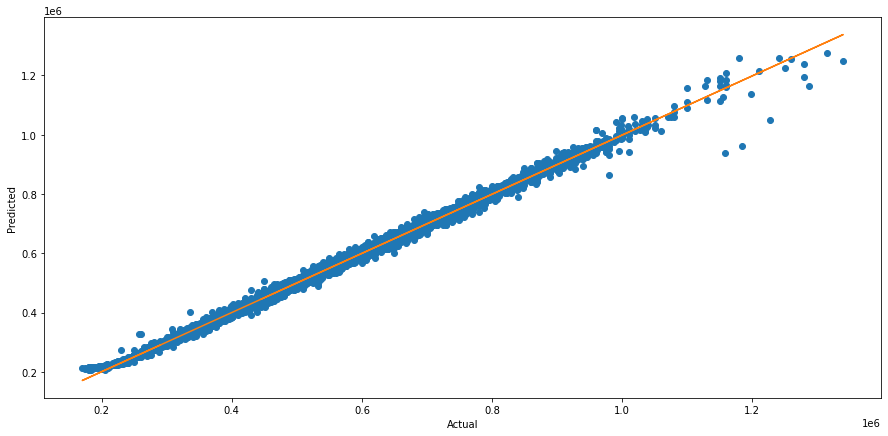

In [313]:
plt.plot(m_y_test, meta_pred, 'o')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# obtain m (slope) and b (intercept) of linear regression line
m, b = np.polyfit(m_y_test, meta_pred, 1)
plt.plot(m_y_test, m * m_y_test + b)

plt.show()

Compared to the individual FNN and LightGBM models, the data points appear to be much denser and tightly clustered around the regression line of fit. This pattern indicates that the predictions made by the meta-model are very closely aligned with the actual resale prices. The dense clustering of data points along the regression line suggests that the meta-model's predictions are highly accurate and consistently close to the true values. We can assume that the meta-model is very effective at estimating resale prices, and its predictions are consistently reliable. The regression line itself closely follows the diagonal line. This alignment indicates that the meta-model neither consistently overestimates nor underestimates the resale prices. Instead, it provides a balanced and highly accurate prediction that closely matches the actual prices. This is a strong indicator of the meta-model's predictive power and its ability to leverage the strengths of the base models to produce highly accurate results.

In [314]:
mae = mean_absolute_error(m_y_test, meta_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 5286.2432658543685


In [315]:
mse = mean_squared_error(m_y_test, meta_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 70595499.27751912


In [316]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 8402.112786526917


In [317]:
r2 = r2_score(m_y_test, meta_pred)
print(f'R-squared: {r2}')

R-squared: 0.9971117744910883


### Summary Table

In [319]:
fnn_eval = ['FNNs', 39996.3359, 2754847248.06463, 52486.63875754124, 0.886571740121508]
lgb_eval = ['LGBM', 5497.304378472426, 72971130.93199499, 8542.314143836844, 0.9969961352674557]
meta_eval = ['META', 5286.2432658543685, 70595499.27751912, 8402.112786526917, 0.9971117744910883]
eval_table = [fnn_eval, lgb_eval, meta_eval]

In [320]:
summary = pd.DataFrame(eval_table, columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2'])
summary

,Model,MAE,MSE,RMSE,R2
0,FNNs,39996.335900,2.754847e+09,52486.638758,0.886572
1,LGBM,5497.304378,7.297113e+07,8542.314144,0.996996
2,META,5286.243266,7.059550e+07,8402.112787,0.997112


The meta-model has the lowest MAE than both the FNN and LightGBM model, producing the most accurate predictions, on average, among the three models. Similarly, the model also has the lowest MSE and RMSE among the three models, indicating that its predictions are associated with smaller squared errors, making it the most accurate in this regard. This model also has an R2 value slightly higher than that of the LGBM model, approximately 0.997, implying that it performs exceptionally well in explaining the variance in resale prices. In summary, the meta-model outperforms both the FNN baseline model and the LightGBM model across all metrics. This suggests that the meta-model provides the most accurate and reliable predictions for resale housing prices in this specific context. It combines the strengths of the FNN and LGBM models to achieve a higher level of predictive accuracy.

### Ridge Regression with FNN

Ridge regression is a type of regularized linear regression technique that prevents overfitting. This is crucial as we have a large number of features, especially after we performed one-hot encoding of categorical features <sup>[38]</sup>. The technique will automatically identify and give less importance to irrelevant or less predictive features <sup>[39]</sup>. The algorithm is also effective at generalization performance, which means the model is likely to perform well on new, unseen data <sup>[40]</sup>. 

### Train-Test Split

In [322]:
from sklearn.linear_model import Ridge

In [321]:
df_copy.head()

,storey_range,floor_area_sqm,resale_price,remaining_lease,year,quarter,price_per_sqm,sch_interaction,mrt_interaction,BEDOK,...,Multi Generation,New Generation,Premium Apartment,Premium Apartment Loft,Premium Maisonette,Simplified,Standard,Terrace,Type S1,Type S2
0,8,60.0,255000.0,63,2015,1,4250.000000,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0
1,11,60.0,275000.0,63,2015,4,4583.333333,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0
2,5,69.0,310000.0,63,2016,2,4492.753623,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0
3,8,45.0,253000.0,63,2016,2,5622.222222,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0
4,5,61.0,290000.0,63,2016,4,4754.098361,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0


In [323]:
X = df_copy.drop('resale_price', axis=1).values
y = df_copy['resale_price'].values

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

Again, we have divided the dataset into a training set and testing set. The training set (`X_train` and `y_train`) will be used to train our Ridge regression model, allowing it to learn patterns and relationships within the data. The testing set (`X_test` and `y_test`) will be kept separate and used later to evaluate how well our trained model performs on new, unseen data.

### Build and Train Model

In [325]:
ridge_model = Ridge(alpha=1.0)

In [326]:
ridge_model.fit(X_train, y_train)

Ridge()

In [327]:
ridge_pred = ridge_model.predict(X_test)

We have successfully trained our regression model on the training data and used it to make predictions on the testing data. We will proceed to evaluate how well the model performs in estimating resale housing prices.

### Evaluate Model Performance

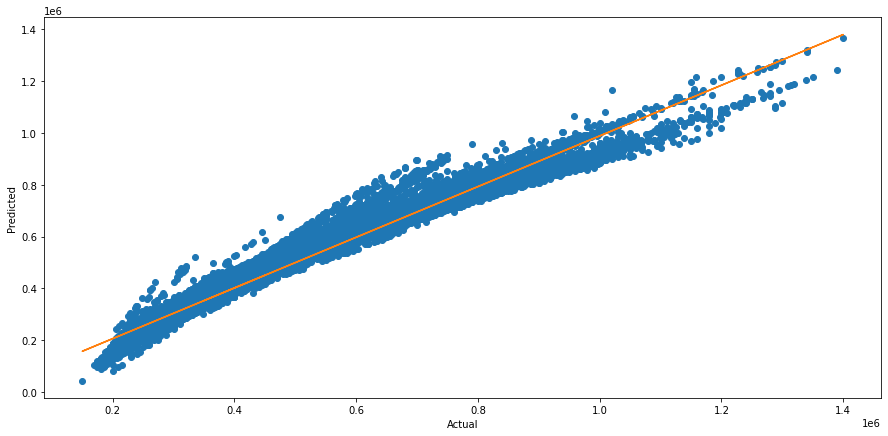

In [328]:
plt.plot(y_test, ridge_pred, 'o')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# obtain m (slope) and b (intercept) of linear regression line
m, b = np.polyfit(y_test, ridge_pred, 1)
plt.plot(y_test, m * y_test + b)

plt.show()

The scatter plot indicates that the data points are clustered together, which suggests that the model's predictions are relatively close to the actual resale prices. However, the asymmetry in the way the regression line cuts through the data points implies that the model may not be equally accurate across the entire range of resale prices. This could indicate that the model might be more accurate for certain price ranges while less accurate for others.

In [329]:
mae = mean_absolute_error(y_test, ridge_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 15891.458881424267


In [330]:
mse = mean_squared_error(y_test, ridge_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 579778530.41123


In [331]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 24078.590706501698


In [333]:
r2 = r2_score(y_test, ridge_pred)
print(f'R-squared: {r2}')

R-squared: 0.9761333522182662


In [334]:
ridge_eval = ['RIDGE', 15891.458881424267, 579778530.41123, 24078.590706501698, 0.9761333522182662]

In [335]:
base_eval = pd.DataFrame([fnn_eval, lgb_eval, ridge_eval], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2'])
base_eval

,Model,MAE,MSE,RMSE,R2
0,FNNs,39996.335900,2.754847e+09,52486.638758,0.886572
1,LGBM,5497.304378,7.297113e+07,8542.314144,0.996996
2,RIDGE,15891.458881,5.797785e+08,24078.590707,0.976133


Compared to our baseline model and the previous regression model, the ridge regression algorithm falls in between, with a moderate performance across all metrics. In general, this suggests that the algorithm did not perform as well as the LightGBM model. Our Ridge Regression model demonstrated a moderate level of predictive accuracy when estimating resale housing prices. The model has the capability of explaining approximately 97.61% of the variance in resale prices (based on R2). This shows that it has good explanatory power and can capture a significant portion of the underlying patterns and trends in the data. As it offers stability, the model still serves as a valuable component in hybrid deep learning models. We will build a separate meta-model to enhance and compare its prediction accuracy.

### Meta-Model

#### Prepare Data

In [346]:
df_copy.head()

,storey_range,floor_area_sqm,resale_price,remaining_lease,year,quarter,price_per_sqm,sch_interaction,mrt_interaction,BEDOK,...,Multi Generation,New Generation,Premium Apartment,Premium Apartment Loft,Premium Maisonette,Simplified,Standard,Terrace,Type S1,Type S2
0,8,60.0,255000.0,63,2015,1,4250.000000,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0
1,11,60.0,275000.0,63,2015,4,4583.333333,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0
2,5,69.0,310000.0,63,2016,2,4492.753623,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0
3,8,45.0,253000.0,63,2016,2,5622.222222,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0
4,5,61.0,290000.0,63,2016,4,4754.098361,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0


In [347]:
X = df_copy.drop('resale_price', axis=1).values
y = df_copy['resale_price'].values

In [348]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

#### Train-Test Split

In [349]:
print(len(y_pred))

49187


In [350]:
print(len(ridge_pred))

73780


In [351]:
# truncate ridge_pred to match the size of y_pred

ridge_pred_ = ridge_pred[:len(y_pred)]

In [352]:
meta_features = np.column_stack((y_pred, ridge_pred_))

In [354]:
m_X_train, m_X_test, m_y_train, m_y_test = train_test_split(meta_features, y_test, test_size=0.3, random_state=55)

We ensured that we have a consistent set of data to train and evaluate our meta-model. We will use the predictions from the FNN model and Ridge regression model as input features, and the actual target values as the target variable.

#### Build and Train Model

We will use linear regression to train and evaluate the performance of our meta-model. Linear regression is known as a common algorithm used to build meta-models, especially if we want a simple and interpretable model that combines the predictions of base models.

In [355]:
meta_model = LinearRegression()

In [356]:
meta_model.fit(meta_features, y_test)

LinearRegression()

In [357]:
meta_pred = meta_model.predict(m_X_test)

#### Evaluate Model Performance

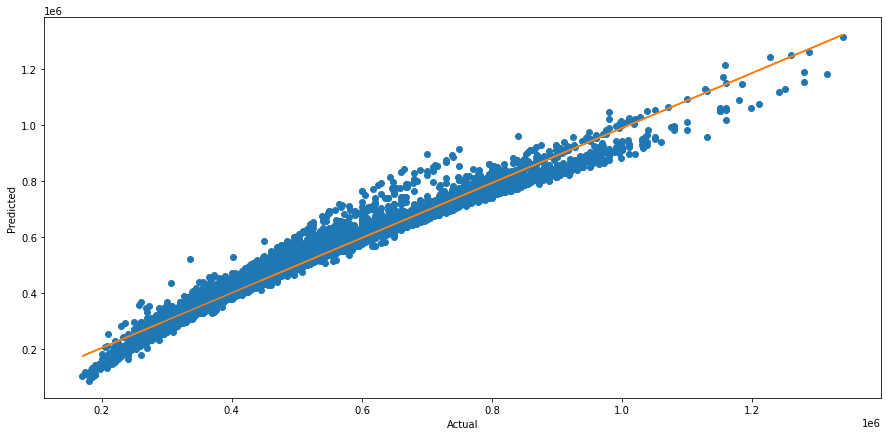

In [358]:
plt.plot(m_y_test, meta_pred, 'o')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# obtain m (slope) and b (intercept) of linear regression line
m, b = np.polyfit(m_y_test, meta_pred, 1)
plt.plot(m_y_test, m * m_y_test + b)

plt.show()

The scatterplot for the meta-model, which combines the predictions from the FNN and Ridge Regression models, has shown a slight improvement compared to the Ridge Regression model alone. In this scatterplot, the data points are noticeably more clustered together. This suggests that the predictions made by the meta-model are more consistent and closely aligned with the actual resale prices, indicating an improvement in predictive accuracy.

However, the regression line still appears to be asymmetrical. This means that the meta-model's predictions are not perfectly balanced in terms of overestimation and underestimation. Overall, the denser clustering of data points and the overall improvement in accuracy indicate that the meta-model is effective at providing more reliable predictions than the Ridge Regression model alone. It combined the strengths of both the FNN and Ridge Regression models to achieve a better level of predictive accuracy, even if there is a slight directional bias in its predictions. 

In [359]:
mae = mean_absolute_error(m_y_test, meta_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 15989.029693174094


In [360]:
mse = mean_squared_error(m_y_test, meta_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 604766393.9179037


In [361]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 24591.998575103724


In [362]:
r2 = r2_score(m_y_test, meta_pred)
print(f'R-squared: {r2}')

R-squared: 0.9752576050354184


### Summary Table

In [363]:
r_meta_eval = ['META_2', 15989.029693174094, 604766393.9179037, 24591.998575103724, 0.9752576050354184]

In [364]:
meta_summary = pd.DataFrame([meta_eval, r_meta_eval], columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2'])
meta_summary

,Model,MAE,MSE,RMSE,R2
0,META,5286.243266,7.059550e+07,8402.112787,0.997112
1,META_2,15989.029693,6.047664e+08,24591.998575,0.975258


Comparing the two meta-models, we can observe that the meta-model combining our FNN and LightGBM models provides more accurate predictions. This model was able to predict housing prices closer to the actual prices with smaller prediction errors and accounted for a larger percentage of the variance in resale prices, indicating better explanatory power. To gain a deeper understanding of the individual strengths and weaknesses of these base models, we have decided to perform k-fold cross-validation on the individual models within the meta-model. This will allow us to assess their performance more comprehensively and ensure that our final model is as robust and reliable as possible.

## k-Fold Cross Validation

K-fold cross-validation is a technique used to assess the performance and generalization ability of deep learning and machine learning models <sup>[41]</sup>. We will divide our dataset into K subsets of approximately equal size. This allows us to assess how consistent and stable their predictions are across different data partitions. Cross-validation helps us understand if the models' performance is consistent across various portions of the dataset. It checks whether their predictive power holds up across different subsets, which is crucial for reliable predictions on unseen data.

For each of the K iterations, we will evaluate the model's performance using standard evaluation metrics. This allows us to compute the average of the K performance scores to obtain an overall assessment of the model's performance. This average score is often considered a more reliable estimate of the model's generalization performance compared to using a single train-test split.

In [365]:
from sklearn.model_selection import KFold

### Train-Test Split

In [366]:
df_copy.head()

,storey_range,floor_area_sqm,resale_price,remaining_lease,year,quarter,price_per_sqm,sch_interaction,mrt_interaction,BEDOK,...,Multi Generation,New Generation,Premium Apartment,Premium Apartment Loft,Premium Maisonette,Simplified,Standard,Terrace,Type S1,Type S2
0,8,60.0,255000.0,63,2015,1,4250.000000,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0
1,11,60.0,275000.0,63,2015,4,4583.333333,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0
2,5,69.0,310000.0,63,2016,2,4492.753623,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0
3,8,45.0,253000.0,63,2016,2,5622.222222,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0
4,5,61.0,290000.0,63,2016,4,4754.098361,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0


In [367]:
X = df_copy.drop('resale_price', axis=1).values
y = df_copy['resale_price'].values

### Build and Train Model

In [368]:
# define number of folds

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

We have defined the number of folds for the K-fold cross-validation. Each fold represents a different subset of our data that will be used for training and testing our models. The data will be randomly shuffled before splitting, ensuring that each fold contains a representative sample of the data.

In [369]:
mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

The empty lists initialized above will store the various evaluation metrics for each fold of the cross-validation process. After performing cross-validation, we will calculate these metrics for each fold and then compute their averages to assess the overall performance of the models.

In [370]:
for train_idx, val_idx in k_fold.split(X, y):
    X_train, X_test = X[train_idx], X[val_idx]
    y_train, y_test = y[train_idx], y[val_idx]
    
    # normalize the data
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # train individual base models (feedforward neural networks)
    model = Sequential()
    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(units=1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

    model.fit(
        x=X_train, y=y_train, 
        epochs=25,
        batch_size=256,
        validation_data=(X_test, y_test)
    )
        
    # train individual base models (LightGBM)
    # configure dataset to specify the categorical columns
    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
    
    params = {
        'objective': 'regression',
        'metric': 'mse',
        'boosting_type': 'gbdt',
        'num_leaves': 31,
        'learning_rate': 0.05,
        'feature_fraction': 0.9
    }
    
    lgb_model = lgb.train(params, train_data, num_boost_round=100, valid_sets=[test_data])
    
    # generate predictions from base models for test data
    y_pred = (model.predict(x=X_test))
    lgb_pred = lgb_model.predict(X_test)
    
    # stack predictions to create meta-features for the test data
    meta_features = np.column_stack((y_pred, lgb_pred))

    # train the meta-model (e.g., linear regression) on the meta-features and actual prices
    meta_model = LinearRegression()
    meta_model.fit(meta_features, y_test)

    # make predictions on the test data
    meta_pred = meta_model.predict(meta_features)

    # calculate evaluation metrics for each fold
    fold_mae = mean_absolute_error(y_test, meta_pred)
    fold_mse = mean_squared_error(y_test, meta_pred)
    fold_rmse = np.sqrt(fold_mse)
    fold_r2 = r2_score(y_test, meta_pred)
    
    mae_scores.append(fold_mae)
    mse_scores.append(fold_mse)
    rmse_scores.append(fold_rmse)
    r2_scores.append(fold_r2)

Epoch 1/25
769/769 [==============================] - 5s 5ms/step - loss: 242522177536.0000 - mean_absolute_error: 467328.2188 - val_loss: 227220504576.0000 - val_mean_absolute_error: 450915.5938
Epoch 2/25
769/769 [==============================] - 4s 5ms/step - loss: 185801277440.0000 - mean_absolute_error: 401589.4688 - val_loss: 132669865984.0000 - val_mean_absolute_error: 332191.8750
Epoch 3/25
769/769 [==============================] - 4s 5ms/step - loss: 82603966464.0000 - mean_absolute_error: 241550.1875 - val_loss: 40534515712.0000 - val_mean_absolute_error: 151413.3125
Epoch 4/25
769/769 [==============================] - 4s 5ms/step - loss: 29089708032.0000 - mean_absolute_error: 125087.4219 - val_loss: 18450415616.0000 - val_mean_absolute_error: 98804.2812
Epoch 5/25
769/769 [==============================] - 3s 5ms/step - loss: 21116801024.0000 - mean_absolute_error: 109729.6797 - val_loss: 15164152832.0000 - val_mean_absolute_error: 91634.7188
Epoch 6/25
769/769 [========

Epoch 4/25
769/769 [==============================] - 4s 5ms/step - loss: 22716141568.0000 - mean_absolute_error: 111609.4609 - val_loss: 16222277632.0000 - val_mean_absolute_error: 94492.8203
Epoch 5/25
769/769 [==============================] - 4s 5ms/step - loss: 18656018432.0000 - mean_absolute_error: 103437.7656 - val_loss: 13512157184.0000 - val_mean_absolute_error: 86667.0312
Epoch 6/25
769/769 [==============================] - 3s 5ms/step - loss: 16199329792.0000 - mean_absolute_error: 96593.1328 - val_loss: 11266236416.0000 - val_mean_absolute_error: 78859.6250
Epoch 7/25
769/769 [==============================] - 3s 5ms/step - loss: 14073670656.0000 - mean_absolute_error: 89986.0234 - val_loss: 9310891008.0000 - val_mean_absolute_error: 71676.3594
Epoch 8/25
769/769 [==============================] - 3s 5ms/step - loss: 12288978944.0000 - mean_absolute_error: 84111.1016 - val_loss: 7676149760.0000 - val_mean_absolute_error: 65135.9023
Epoch 9/25
769/769 [====================

### Evaluate Model Performance

In [371]:
from statistics import mean, stdev

In [372]:
mae_scores

[3733.692752643617,
 3781.260676927906,
 3642.9306072539766,
 3634.6823091649535,
 3760.900991244493]

In [373]:
print(f'Mean: {mean(mae_scores)}, Stdev: {stdev(mae_scores)}')

Mean: 3710.6934674469894, Stdev: 67.82144761111853


In [374]:
mse_scores

[38070686.6682599,
 42589973.30981594,
 35181703.13163817,
 41629204.569559135,
 41054718.17212788]

In [375]:
print(f'Mean: {mean(mse_scores)}, Stdev: {stdev(mse_scores)}')

Mean: 39705257.1702802, Stdev: 3040500.2739264574


In [376]:
rmse_scores

[6170.144785032187,
 6526.099394723922,
 5931.416620980031,
 6452.069789575988,
 6407.395584176763]

In [377]:
print(f'Mean: {mean(rmse_scores)}, Stdev: {stdev(rmse_scores)}')

Mean: 6297.425234897778, Stdev: 244.16331919656452


In [378]:
r2_scores

[0.9984273608195197,
 0.9982729167542459,
 0.9985202323023742,
 0.9982591843898511,
 0.9983121980366747]

In [379]:
print(f'Mean: {mean(r2_scores)}, Stdev: {stdev(r2_scores)}')

Mean: 0.9983583784605331, Stdev: 0.0001120614010462626


After calculating the average of the evaluation metrics across all folds, we obtained a robust estimate of the model's overall performance. On average, the model's predictions deviated from the actual resale prices by approximately $3,710 (based on MAE). The RMSE, which measures the typical prediction error in the same units as the target variable, averaged around 6,297. This means that, on average, the model's predictions were typically off by about \\$6,297 from the actual prices.

The R2 value, which explains the proportion of variance in resale prices that the model captures, averaged an impressive 0.998. This indicates that our model accounted for approximately 99.8% of the variance in resale prices, showcasing its remarkable ability to capture and explain the underlying patterns in the data.

## Hyperparameter Tuning

Hyperparameter tuning is the process of finding the optimal hyperparameters for a machine learning or deep learning model. Hyperparameters are settings that are not learned from the data but are set prior to training the model. They can significantly impact a model's performance, and tuning them involves searching for the best combination of hyperparameters that result in the highest model performance on a given task.

Cross validation can be used to optimize the hyperparameters of our models by selecting the values that result in the best performance on the validation set. We can find a balance between model performance and computational efficiency. This improves the individual predictive accuracy for each model and makes our models more practical for real-world applications.

### Prepare Data

In [386]:
df_copy.head()

,storey_range,floor_area_sqm,resale_price,remaining_lease,year,quarter,price_per_sqm,sch_interaction,mrt_interaction,BEDOK,...,Multi Generation,New Generation,Premium Apartment,Premium Apartment Loft,Premium Maisonette,Simplified,Standard,Terrace,Type S1,Type S2
0,8,60.0,255000.0,63,2015,1,4250.000000,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0
1,11,60.0,275000.0,63,2015,4,4583.333333,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0
2,5,69.0,310000.0,63,2016,2,4492.753623,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0
3,8,45.0,253000.0,63,2016,2,5622.222222,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0
4,5,61.0,290000.0,63,2016,4,4754.098361,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0


In [387]:
X = df_copy.drop('resale_price', axis=1).values
y = df_copy['resale_price'].values

In [388]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

### Tuning for the FNN Model

Random search is commonly used in hyperparameter tuning to search for the optimal combination of hyperparameters for a machine learning or deep learning model. The technique randomly samples a predefined number of hyperparameter combinations from a specified search space. This randomness can lead to faster and more efficient hyperparameter optimization, especially when the search space is large and contains many hyperparameters.

In [389]:
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.optimizers import Adam

In [390]:
# code is inspired by [42][43][44]

def create_fnn(units_first_layer=64, units_second_layer=32, dropout_rate_first=0.2, dropout_rate_second=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(units=units_first_layer, activation='relu'))
    model.add(Dropout(rate=dropout_rate_first))
    model.add(Dense(units=units_second_layer, activation='relu'))
    model.add(Dropout(rate=dropout_rate_second))
    model.add(Dense(units=1, activation='linear'))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error'])
    
    return model

We have defined a function (`create_fnn`) that created a FNN model with specific architecture and hyperparameters. The function allows us to easily create FNN models with different configurations for hyperparameter tuning.

In [391]:
param_grid = {
    'units_first_layer': [32, 64, 128],
    'units_second_layer': [32, 64, 128],
    'dropout_rate_first': [0.2, 0.3, 0.4],
    'dropout_rate_second': [0.2, 0.3, 0.4],
    'learning_rate': [0.001, 0.01, 0.1],
}

We have specified hyperparameters that can be tuned for optimization. `units_first_layer` and `units_second_layer` determine the number of units in the first and second layers. `dropout_rate_first` and `dropout_rate_second` allow us to apply dropout regularization with rates of 0.2, 0.3, or 0.4 in the first and second layers. `learning_rate` controls the learning rate of the Adam optimizer from a range of 0.001, 0.01 or 0.1.

In [392]:
model = tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn=create_fnn, epochs=25, verbose=0)

C:\Users\auclr\AppData\Local\Temp/ipykernel_8272/3213904098.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn=create_fnn, epochs=25, verbose=0)


We have created a KerasRegressor model based on the FNN architecture defined in the `create_fnn` function. This model can be used with RandomizedSearchCV to find the best combination of hyperparameters.

In [393]:
# create the RandomizedSearchCV object

random_search = RandomizedSearchCV(
    model,
    param_distributions=param_grid,
    n_iter=10,
    scoring='neg_mean_squared_error', 
    cv=3,
    verbose=2,
    random_state=42,
)

We have created a RandomizedSearchCV object (`random_search`) that will be applied to the training data. It will perform a specified number of iterations, randomly sampling different combinations of hyperparameters and assessing their performance through cross-validation.

In [394]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END dropout_rate_first=0.2, dropout_rate_second=0.2, learning_rate=0.1, units_first_layer=128, units_second_layer=32; total time= 3.9min
[CV] END dropout_rate_first=0.2, dropout_rate_second=0.2, learning_rate=0.1, units_first_layer=128, units_second_layer=32; total time= 3.8min
[CV] END dropout_rate_first=0.2, dropout_rate_second=0.2, learning_rate=0.1, units_first_layer=128, units_second_layer=32; total time= 3.8min
[CV] END dropout_rate_first=0.2, dropout_rate_second=0.2, learning_rate=0.001, units_first_layer=128, units_second_layer=32; total time= 3.9min
[CV] END dropout_rate_first=0.2, dropout_rate_second=0.2, learning_rate=0.001, units_first_layer=128, units_second_layer=32; total time= 3.9min
[CV] END dropout_rate_first=0.2, dropout_rate_second=0.2, learning_rate=0.001, units_first_layer=128, units_second_layer=32; total time= 3.9min
[CV] END dropout_rate_first=0.3, dropout_rate_second=0.4, learning_rate=0.01, uni

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000013003DFB880>,
                   param_distributions={'dropout_rate_first': [0.2, 0.3, 0.4],
                                        'dropout_rate_second': [0.2, 0.3, 0.4],
                                        'learning_rate': [0.001, 0.01, 0.1],
                                        'units_first_layer': [32, 64, 128],
                                        'units_second_layer': [32, 64, 128]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [395]:
# get the best hyperparameters

best_params = random_search.best_params_
best_model = random_search.best_estimator_

In [396]:
print(f'Best Hyperparameters: {best_params}')

Best Hyperparameters: {'units_second_layer': 32, 'units_first_layer': 128, 'learning_rate': 0.001, 'dropout_rate_second': 0.2, 'dropout_rate_first': 0.2}


#### Evaluate Model Performance

In [397]:
test_predictions = best_model.predict(X_test)

In [425]:
# evaluate on the test set

test_mae = mean_absolute_error(y_test, test_predictions)
print(f'Test MAE: {test_mae}')

Test MAE: 23922.570258598193


In [426]:
test_mse = mean_squared_error(y_test, test_predictions)
print(f'Test MSE: {test_mse}')

Test MSE: 761367987.9085981


In [427]:
test_rmse = np.sqrt(test_mse)
print(f'Test RMSE: {test_rmse}')

Test RMSE: 27592.897417788477


In [480]:
summary

,Model,MAE,MSE,RMSE,R2
0,FNNs,39996.335900,2.754847e+09,52486.638758,0.886572
1,LGBM,5497.304378,7.297113e+07,8542.314144,0.996996
2,META,5286.243266,7.059550e+07,8402.112787,0.997112


The hyperparameter tuning process identified the best combination of hyperparameters for the FNN model. We can observe that the FNN model's predictive accuracy has significantly improved. Compared to the original metrics measurements of the FNN model alone, the tuned FNN model achieved a lower MAE of about \\$23,922.57. This indicates that the tuned model's predictions are, on average, closer to the actual resale prices, resulting in improved accuracy. On top of that, it has also reduced the MSE to approximately 7.61e+08. The significant reduction in MSE suggests that the tuned model's predictions have smaller squared errors compared to the original model, indicating better predictive performance. Similarly, the tuned FNN model reduced the RMSE to about 27,592.90. This implies that the tuned model's predictions have a smaller typical prediction error in the same units as the target variable. 

### Tuning for LightGBM Model

In [419]:
param_grid = {
    'num_leaves': [15, 31, 63, 127],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'feature_fraction': [0.6, 0.7, 0.8, 0.9],
    'boosting_type': ['gbdt'],
}

We defined a set of hyperparameters for the LightGBM to search through during the hyperparameter tuning. These hyperparameters include `num_leaves`, which determines the number of leaves in each tree, `learning_rate`, which controls the step size during training, and `feature_fraction`, which specifies the fraction of features to consider when building each tree.

In [420]:
lgb_regressor = lgb.LGBMRegressor(objective='regression', metric='mse')

We created an instance of the LGBMRegressor and set up the RandomizedSearchCV object. The RandomizedSearchCV object will fit to the training data, allowing it to explore different combinations of hyperparameters and evaluate their performance on the training data using cross-validation. Once the search is complete, the best combination of hyperparameters is identified, and the model is trained with these optimal settings.

In [421]:
random_search = RandomizedSearchCV(
    estimator=lgb_regressor,
    param_distributions=param_grid,
    n_iter=10,  
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [422]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010893 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1114
[LightGBM] [Info] Number of data points in the train set: 172151, number of used features: 57
[LightGBM] [Info] Start training from score 472342.757131


RandomizedSearchCV(cv=3,
                   estimator=LGBMRegressor(metric='mse',
                                           objective='regression'),
                   n_jobs=-1,
                   param_distributions={'boosting_type': ['gbdt'],
                                        'feature_fraction': [0.6, 0.7, 0.8,
                                                             0.9],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'num_leaves': [15, 31, 63, 127]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

#### Evaluate Model Performance

In [431]:
# train the test LightGBM model with the best hyperparameters

test_lgb_model = lgb.LGBMRegressor(**best_params)
test_lgb_model.fit(X_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007887 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1114
[LightGBM] [Info] Number of data points in the train set: 172151, number of used features: 57
[LightGBM] [Info] Start training from score 472342.757131


LGBMRegressor(feature_fraction=0.9, num_leaves=63)

In [432]:
lgb_pred = test_lgb_model.predict(X_test)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


In [434]:
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'num_leaves': 63, 'learning_rate': 0.1, 'feature_fraction': 0.9, 'boosting_type': 'gbdt'}


In [435]:
test_mse = -random_search.best_score_
print("Test MSE:", test_mse)

Test MSE: 22792387.517346185


To verify our parameter tuning, we trained the LightGBM (LGBM) model using the best hyperparameters identified through the hyperparameter tuning process. The hyperparameters represent the settings that result in the optimal performance of the LGBM model on our training data. After training the model with these optimal settings, we used it to make predictions on the testing data. 

The best hyperparameters obtained through the hyperparameter tuning process were also printed for reference. These hyperparameters represent the configuration that yielded the best results for our LGBM model in terms of minimizing MSE.

## Build the Final Model

After fine-tuning the hyperparameters for both the FNN and LightGBM models, we will individually train these models using the best-tuned settings. Once the individual models are optimized, we will create a meta-model that combines their predictions to further enhance predictive accuracy. This final ensemble approach leverages the strengths of both models to provide the most accurate resale housing price predictions. We will then evaluate the performance of these tuned models to gauge their effectiveness in estimating resale housing prices.

### Feedforward Neural Network (FNN)

#### Train-Test Split

In [401]:
df_copy.head()

,storey_range,floor_area_sqm,resale_price,remaining_lease,year,quarter,price_per_sqm,sch_interaction,mrt_interaction,BEDOK,...,Multi Generation,New Generation,Premium Apartment,Premium Apartment Loft,Premium Maisonette,Simplified,Standard,Terrace,Type S1,Type S2
0,8,60.0,255000.0,63,2015,1,4250.000000,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0
1,11,60.0,275000.0,63,2015,4,4583.333333,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0
2,5,69.0,310000.0,63,2016,2,4492.753623,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0
3,8,45.0,253000.0,63,2016,2,5622.222222,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0
4,5,61.0,290000.0,63,2016,4,4754.098361,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0


In [402]:
X = df_copy.drop('resale_price', axis=1).values
y = df_copy['resale_price'].values

In [403]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

#### Normalising the Data

In [404]:
X_train = scaler.fit_transform(X_train)

In [405]:
X_test = scaler.transform(X_test)

#### Build and Train Model

In [406]:
# initialise a sequential model
model = Sequential()

# add input layer and first hidden layer
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(rate=0.2))

# add hidden layers
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(rate=0.2))

# add output layer
model.add(Dense(units=1, activation='linear'))

# compile the model
opt = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_absolute_error'])

In [407]:
model.fit(
    x=X_train, y=y_train, 
    epochs=25,
    batch_size=256,
    validation_data=(X_test, y_test)
)

Epoch 1/25
673/673 [==============================] - 2s 3ms/step - loss: 240399138816.0000 - mean_absolute_error: 465089.2812 - val_loss: 220451340288.0000 - val_mean_absolute_error: 443371.0938
Epoch 2/25
673/673 [==============================] - 2s 3ms/step - loss: 165985943552.0000 - mean_absolute_error: 375242.0000 - val_loss: 102586490880.0000 - val_mean_absolute_error: 284089.8750
Epoch 3/25
673/673 [==============================] - 2s 3ms/step - loss: 56304517120.0000 - mean_absolute_error: 186715.9844 - val_loss: 25129179136.0000 - val_mean_absolute_error: 112010.5234
Epoch 4/25
673/673 [==============================] - 2s 3ms/step - loss: 22639943680.0000 - mean_absolute_error: 111831.2109 - val_loss: 16437131264.0000 - val_mean_absolute_error: 95131.4609
Epoch 5/25
673/673 [==============================] - 2s 3ms/step - loss: 18838839296.0000 - mean_absolute_error: 104358.3359 - val_loss: 13749892096.0000 - val_mean_absolute_error: 87141.0234
Epoch 6/25
673/673 [========

In [408]:
losses = pd.DataFrame(model.history.history)

In [409]:
y_pred = (model.predict(x=X_test))

2306/2306 [==============================] - 2s 754us/step


#### Model Performance

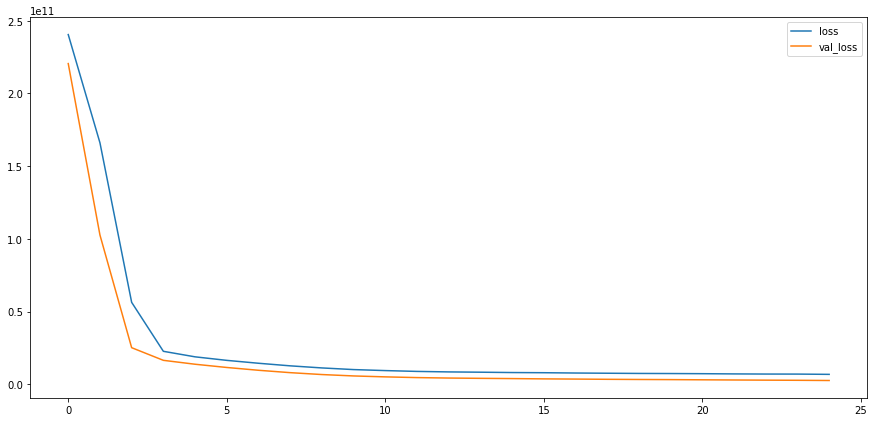

In [410]:
losses[['loss', 'val_loss']].plot()
plt.show()

In [412]:
pred_df = pd.DataFrame(data=y_test, columns=['y_test'])
pred_df['y_pred'] = y_pred
pred_df['error'] = pred_df['y_test'] - pred_df['y_pred']

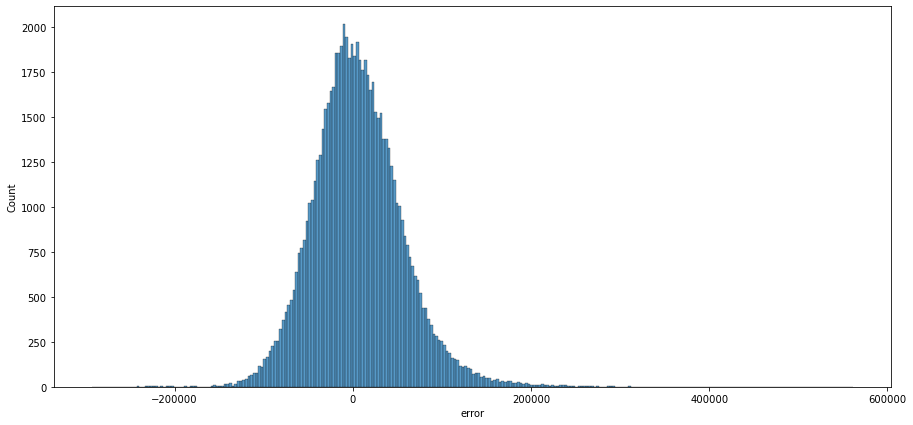

In [413]:
sns.histplot(pred_df['error'])
plt.show()

In [414]:
loss, mae = model.evaluate(X_test, y_test)

2306/2306 [==============================] - 2s 974us/step - loss: 2567280384.0000 - mean_absolute_error: 38585.9336


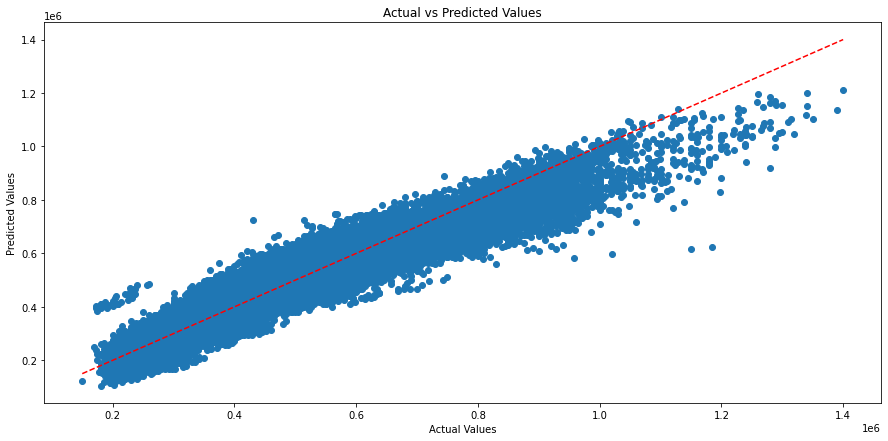

In [415]:
# plotting the actual vs predicted values
plt.scatter(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.show()

In [416]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 2567280829.6677375


In [417]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 50668.341493162545


In [418]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.8943175986958032


In [482]:
fnn_eval_tuned = ['FNN_tuned', 38585.9336, 2567280829.6677375, 50668.341493162545, 0.8943175986958032]

### LightGBM Model

#### Train-Test Split

In [436]:
df_lgb = df.copy()

In [437]:
categorical_columns = ['town', 'flat_type', 'flat_model']
for col in categorical_columns:
    df_lgb[col] = df_lgb[col].astype('category')

In [438]:
X = df_lgb.drop('resale_price', axis=1)
y = df_lgb['resale_price']

In [439]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

In [440]:
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_columns, free_raw_data=False)
test_data = lgb.Dataset(X_test, label=y_test, categorical_feature=categorical_columns, free_raw_data=False)

#### Build and Train Model

In [441]:
params = {
    'objective': 'regression',
    'metric': 'mse',
    'boosting_type': 'gbdt',
    'num_leaves': 63,
    'learning_rate': 0.1,
    'feature_fraction': 0.9
}

In [442]:
lgb_model = lgb.train(params, train_data, num_boost_round=100, valid_sets=[test_data])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1075
[LightGBM] [Info] Number of data points in the train set: 172151, number of used features: 11
[LightGBM] [Info] Start training from score 472342.757131


In [443]:
lgb_pred = lgb_model.predict(X_test)

#### Model Performance

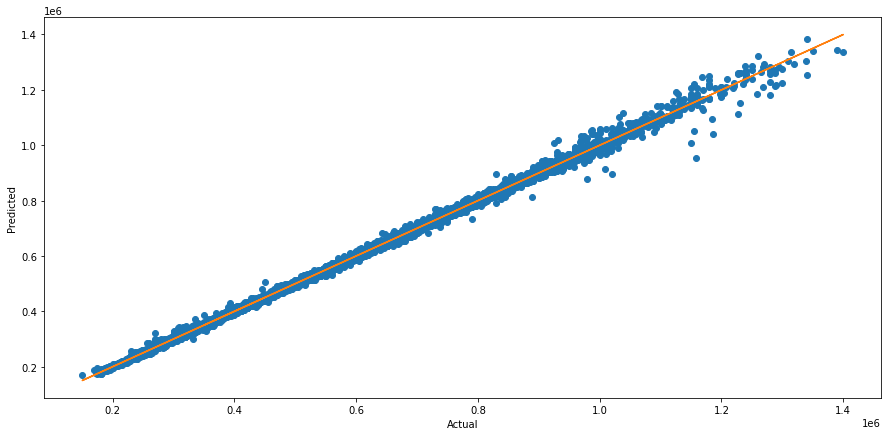

In [444]:
plt.plot(y_test, lgb_pred, 'o')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# obtain m (slope) and b (intercept) of linear regression line
m, b = np.polyfit(y_test, lgb_pred, 1)
plt.plot(y_test, m * y_test + b)

plt.show()

In [445]:
mae = mean_absolute_error(y_test, lgb_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 2374.9341180849638


In [446]:
mse = mean_squared_error(y_test, lgb_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 17478180.734013196


In [447]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 4180.691418176328


In [448]:
r2 = r2_score(y_test, lgb_pred)
print(f'R-squared: {r2}')

R-squared: 0.9992805087433156


In [485]:
lgb_eval_tuned = ['LGB_tuned', 2374.9341180849638, 17478180.734013196, 4180.691418176328, 0.9992805087433156]

### Meta-Model

#### Prepare Data

In [449]:
df_copy.head()

,storey_range,floor_area_sqm,resale_price,remaining_lease,year,quarter,price_per_sqm,sch_interaction,mrt_interaction,BEDOK,...,Multi Generation,New Generation,Premium Apartment,Premium Apartment Loft,Premium Maisonette,Simplified,Standard,Terrace,Type S1,Type S2
0,8,60.0,255000.0,63,2015,1,4250.000000,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0
1,11,60.0,275000.0,63,2015,4,4583.333333,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0
2,5,69.0,310000.0,63,2016,2,4492.753623,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0
3,8,45.0,253000.0,63,2016,2,5622.222222,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0
4,5,61.0,290000.0,63,2016,4,4754.098361,2.94,1.7,0,...,0,0,0,0,0,0,0,0,0,0


In [450]:
X = df_copy.drop('resale_price', axis=1).values
y = df_copy['resale_price'].values

In [451]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

#### Train-Test Split

In [459]:
meta_features = np.column_stack((y_pred, lgb_pred_))

In [461]:
meta_features_ = meta_features[:len(y_test)]

In [462]:
m_X_train, m_X_test, m_y_train, m_y_test = train_test_split(meta_features_, y_test, test_size=0.3, random_state=55)

#### Build and Train Model

In [463]:
meta_model = LinearRegression()

In [464]:
meta_model.fit(meta_features_, y_test)

LinearRegression()

In [465]:
meta_pred = meta_model.predict(m_X_test)

#### Model Performance

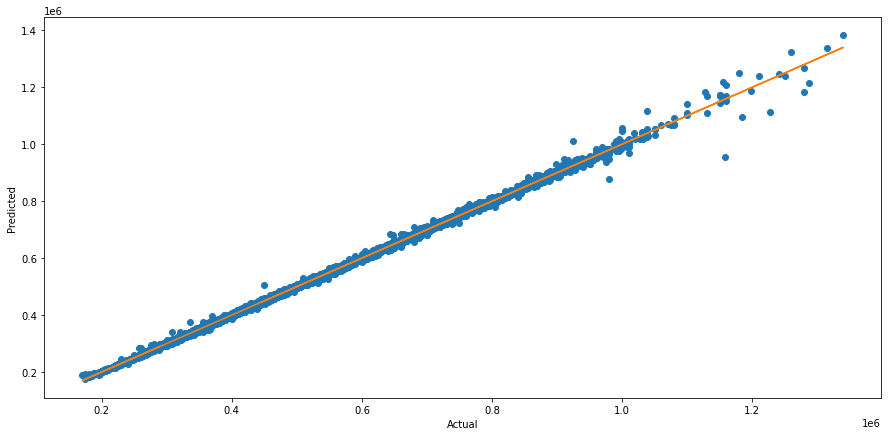

In [466]:
plt.plot(m_y_test, meta_pred, 'o')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# obtain m (slope) and b (intercept) of linear regression line
m, b = np.polyfit(m_y_test, meta_pred, 1)
plt.plot(m_y_test, m * m_y_test + b)

plt.show()

In [467]:
mae = mean_absolute_error(m_y_test, meta_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 2412.1250332060367


In [468]:
mse = mean_squared_error(m_y_test, meta_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 21717495.82934663


In [469]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 4660.203410726471


In [470]:
r2 = r2_score(m_y_test, meta_pred)
print(f'R-squared: {r2}')

R-squared: 0.9991114869065885


In [487]:
meta_eval_tuned = ['META_tuned', 2412.1250332060367, 21717495.82934663, 4660.203410726471, 0.9991114869065885]

### Evaluation and Conclusion

In [488]:
final_summary = pd.DataFrame([fnn_eval, fnn_eval_tuned, lgb_eval, lgb_eval_tuned, meta_eval, meta_eval_tuned],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2'])
final_summary

,Model,MAE,MSE,RMSE,R2
0,FNNs,39996.335900,2.754847e+09,52486.638758,0.886572
1,FNN_tuned,38585.933600,2.567281e+09,50668.341493,0.894318
2,LGBM,5497.304378,7.297113e+07,8542.314144,0.996996
3,LGB_tuned,2374.934118,1.747818e+07,4180.691418,0.999281
4,META,5286.243266,7.059550e+07,8402.112787,0.997112
5,META_tuned,2412.125033,2.171750e+07,4660.203411,0.999111


In the final comparison and evaluation of our meta-model, we have achieved remarkable results. Our final deep learning model exhibited superior predictive accuracy with an MAE of approximately 2,412, indicating that, on average, it deviates from actual resale prices by only this amount. The RMSE, which measures the typical prediction error, is approximately 4,660, implying that predictions typically vary by this amount from the actual prices. Moreover, the R2 score, which explains the variance captured by the model, stands at an impressive 0.999, signifying an exceptional ability to capture underlying patterns. 

Our project's primary aim was to successfully predict housing prices of resale flats in Singapore, aiding both buyers and sellers in making informed decisions. We have achieved this aim, combining the strengths of various models, providing highly accurate and reliable predictions. Buyers can use it to assess fair resale prices, and sellers can make competitive pricing decisions, ultimately contributing to a more transparent and efficient housing market in Singapore. This achievement demonstrates the power of data-driven models in solving real-world problems and enhancing decision-making in the real estate sector.

## References

[1] Housing and Development Board. (n.d.). About Us. Retrieved from
https://www.hdb.gov.sg/cs/infoweb/about-us 

[2] Low, Y. (2023, January 5). Look Ahead 2023: Fewer BTO flats eligible for resale among property
trends to watch; experts urge HDB upgraders to be cautious. Today Online. Retrieved from
https://www.todayonline.com/singapore/look-ahead-2023-bto-flats-resale-home-prices-2083416

[3] Abdullah, A. Z. (2021, September 20). Focus: What's pushing HDB resale prices higher? Channel
NewsAsia. Retrieved from https://www.channelnewsasia.com/singapore/focus-what-pushing-hdbresale-prices-higher-2029296#:~:text=%E2%80%9CThere's%20a%20strong%20demand%20for,and

[4] Housing and Development Board. (2023, July 14). Resale Flat Prices. GovTech Singapore.
Retrieved from https://data.gov.sg/dataset/resale-flat-prices

[5] GovTech Singapore. (n.d.). Data.gov.sg. Retrieved from https://www.tech.gov.sg/products-andservices/data-gov-sg/

[6] OneMap. (2023). OneMap API: Singapore's Geospatial Web Service. Retrieved from
https://www.onemap.sg/docs/

[7] Lim, C. C. (2022, December). CM3005 Data Science: Resale Flat Price Predictions [Coursework 1
submission]. University of London. Retrieved from https://www.coursera.org/learn/uol-cm3005-datascience/assignment-submission/80BPQ/coursework-1-submission (Personal Past Work)

[8] Wikipedia. (n.d.). List of primary schools in Singapore. Retrieved from https://en.wikipedia.org/wiki/List_of_primary_schools_in_Singapore 

[9] Dipartimento di Matematica e Informatica. (n.d.). Small-world networks. Retrieved from http://users.dimi.uniud.it/~massimo.franceschet/teaching/datascience/network/geodesic.html#:~:text=A%20shortest%20path%2C%20or%20geodesic,geodesic%20distance%20or%20shortest%20distance

[10] ArcGIS Developers. (n.d.). Developer Glossary: geodetic measurement. Retrieved from https://developers.arcgis.com/documentation/glossary/geodetic-measurement/#:~:text=A%20geodetic%20measurement%20is%20any,the%20earth%20to%20provide%20measurements

[11] Saturn Cloud. (2023, June 19). How to Form Tuple Column from Two Columns in Pandas. Retrieved from https://saturncloud.io/blog/how-to-form-tuple-column-from-two-columns-in-pandas/#:~:text=To%20form%20a%20tuple%20column%20from%20the%20two%20columns%20A,each%20of%20the%20input%20sequences

[12] abhilash. (n.d.). How to calculate distance using the haversine formula. Educative. Retrieved from https://www.educative.io/answers/how-to-calculate-distance-using-the-haversine-formula

[13] DataMall. (n.d.). Train Station Codes and Chinese Names. Retrieved from https://datamall.lta.gov.sg/content/datamall/en/static-data.html#Public%20Transport

[14] DataMall. (n.d.). Homepage. Retrieved from https://datamall.lta.gov.sg/content/datamall/en.html

[15] Alliance. (n.d.). Volatility in Real Estate. Retrieved from https://alliancecgc.com/education/volatility-in-real-estate/#:~:text=Conversely%2C%20high%20volatility%20is%20more,has%20a%20much%20lower%20floor

[16] Trenton M. (2023, May 8). How to rotate seaborn barplot x-axis tick labels. Stackoverflow. Retrieved from https://stackoverflow.com/questions/61368851/how-to-rotate-seaborn-barplot-x-axis-tick-labels

[17] Land Transport Authority. (2018, May 25). Upgrading of Sengkang MRT and LRT Stations for More Comfortable Journeys. Retrieved from https://www.lta.gov.sg/content/ltagov/en/newsroom/2018/5/2/upgrading-of-sengkang-mrt-and-lrt-stations-for-more-comfortable-journeys.html

[18] datavizpyr. (2020, February 20). Data Viz with Python and R. Retrieved from https://datavizpyr.com/how-to-manually-order-boxplot-in-seaborn/

[19] McKinney, J. (n.d.). Feedforward Neural Networks. Brilliant. Retrieved from https://brilliant.org/wiki/feedforward-neural-networks/

[20] Pranshu, S. (2023, August 23). Basic Introduction to Feed-Forward Network in Deep Learning. Analytics Vidhya. Retrieved from https://www.analyticsvidhya.com/blog/2022/03/basic-introduction-to-feed-forward-network-in-deep-learning/

[21] Saturn Cloud. (2023, June 13). What is TensorFlow One Hot Encoder. Retrieved from https://saturncloud.io/blog/what-is-tensorflow-one-hot-encoder/#:~:text=One%20hot%20encoding%20solves%20both,ideal%20for%20machine%20learning%20algorithms

[22] Roshan, J. V. (2022, April 04). Optimal ratio for data splitting. Wiley Online Library. Retrieved from https://onlinelibrary.wiley.com/doi/full/10.1002/sam.11583. doi:https://doi.org/10.1002/sam.11583

[23] likebupt, PeterCLu, v-chmccl. (2021, April 11). Normalize Data component. Microsoft Azure. Retrieved from https://learn.microsoft.com/en-us/azure/machine-learning/component-reference/normalize-data?view=azureml-api-2

[24] Galpaccru. (2022, June 22). Do we normalise the dataset before or after performing one hot encoding? Stackoverflow. Retrieved from https://stats.stackexchange.com/questions/473401/do-we-normalise-the-dataset-before-or-after-performing-one-hot-encoding

[25] DeepAI. (n.d.). Hidden Layer. Retrieved from https://deepai.org/machine-learning-glossary-and-terms/hidden-layer-machine-learning#:~:text=In%20neural%20networks%2C%20a%20hidden,inputs%20entered%20into%20the%20network

[26] Frost, J. (n.d.). How To Interpret R-squared in Regression Analysis. Statistics By Jim. Retrieved from https://statisticsbyjim.com/regression/interpret-r-squared-regression/

[27] George, V. J. (2019, October 03). Useful Plots to Diagnose your Neural Network. Medium. Retrieved from https://towardsdatascience.com/useful-plots-to-diagnose-your-neural-network-521907fa2f45

[28] Dr. Snoopy. (2019, June 19). Is it a good model in the making with validation loss remaining lower than train curve, more or less constant gap as both are decreasing? Stackoverflow. Retrieved from https://stackoverflow.com/questions/56663175/is-it-a-good-model-in-the-making-with-validation-loss-remaining-lower-than-train

[29] Seif, G. (2019, May 21). Understanding the 3 most common loss functions for Machine Learning Regression. Medium. Retrieved from https://towardsdatascience.com/understanding-the-3-most-common-loss-functions-for-machine-learning-regression-23e0ef3e14d3

[30] Frost, J. (n.d.). Root Mean Square Error (RMSE). Statistics By Jim. Retrieved from https://statisticsbyjim.com/regression/root-mean-square-error-rmse/

[31] Frost, J. (n.d.). How To Interpret R-squared in Regression Analysis. Statistics By Jim. Retrieved from https://statisticsbyjim.com/regression/interpret-r-squared-regression/

[32] Brownlee, J. (2020, November 25). How to Develop a Light Gradient Boosted Machine (LightGBM) Ensemble. Machine Learning Mastery. Retrieved from https://machinelearningmastery.com/light-gradient-boosted-machine-lightgbm-ensemble/

[33] Mondal, A. (2023, August 17). Complete guide on how to Use LightGBM in Python. Analytics Vidhya. Retrieved from https://www.analyticsvidhya.com/blog/2021/08/complete-guide-on-how-to-use-lightgbm-in-python/

[34] LightGBM. (n.d.). Categorical Feature Support. Retrieved from https://lightgbm.readthedocs.io/en/v3.3.2/Advanced-Topics.html

[35] Pandey, V. (2023, June 11). Ensemble Methods in Practice: Combining the Strengths of Multiple Models and Making Decisions. LinkedIn. Retrieved from https://www.linkedin.com/pulse/ensemble-methods-practice-combining-strengths-multiple-pandey/

[36] Hartmann, T. (2019, July 09). Meta-Modelling Meta-Learning. Medium. Retrieved from https://medium.com/datathings/meta-modelling-meta-learning-34734cd7451b

[37] Soni, B. (2023, May 01). Stacking to Improve Model Performance: A Comprehensive Guide on Ensemble Learning in Python. Medium. Retrieved from https://medium.com/@brijesh_soni/stacking-to-improve-model-performance-a-comprehensive-guide-on-ensemble-learning-in-python-9ed53c93ce28

[38] Saturn Cloud. (2023, July 06). Linear Regression with sklearn using categorical variables. Retrieved from https://saturncloud.io/blog/linear-regression-with-sklearn-using-categorical-variables/#:~:text=To%20use%20categorical%20variables%20in,label%20encoding%2C%20and%20binary%20encoding

[39] Manwani, R. (2021, September 15). Lasso and Ridge Regularization – A Rescuer From Overfitting. Analytics Vidhya. Retrieved from https://www.analyticsvidhya.com/blog/2021/09/lasso-and-ridge-regularization-a-rescuer-from-overfitting/

[40] ajaymehta. (2023, July 18). Mastering Regularization Techniques: Enhancing Model Performance and Generalization. Medium. Retrieved from https://medium.com/@dancerworld60/mastering-regularization-techniques-enhancing-model-performance-and-generalization-5dd0fb3737dd

[41] Arya, N. (2022, July 11). Why Use k-fold Cross Validation? KDnuggets. Retrieved from https://www.kdnuggets.com/2022/07/kfold-cross-validation.html#:~:text=If%20we%20were%20using%20accuracy,used%20in%20the%20test%20phase

[42] Brownlee, J. (2020, September 14). Hyperparameter Optimization With Random Search and Grid Search. Machine Learning Mastery. Retrieved from https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/

[43] Rendyk. (2021, May 26). Tuning the Hyperparameters and Layers of Neural Network Deep Learning. Analytics Vidhya. Retrieved from https://www.analyticsvidhya.com/blog/2021/05/tuning-the-hyperparameters-and-layers-of-neural-network-deep-learning/

[44] Nair, A. (2021, October 25). Improve Your Hyperparameter Tuning Experience With The Random Search. Medium. Retrieved from https://towardsdatascience.com/improve-your-hyperparameter-tuning-experience-with-the-random-search-2c05d789175f